**1. Importing libraries**

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import optlib.optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 21
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib notebook

**2. Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [2]:
xraypath = '/Users/olgaridzel/Research/Bruce/PHYSDAT/sf/'

***FITTING PART***

**DNA**

In [3]:
# A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
# gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
# omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]

# A = [4.946, 20.194, 55.306, 30.608, 42.568, 26.358, 53.914, 49.603, 24.178, 42.152, 15.363, 28.376, 9.072]
# gamma = [1.388, 1.544, 2.31, 2.538, 3.694, 4.212, 7.409, 9.314, 8.155, 86.548, 6.728, 11.875, 7.722]
# omega = [6.845, 8.569, 9.912, 11.694, 13.524, 15.987, 18.686, 22.955, 27.917, 36.823, 32.637, 37.962, 49.586]

A = [5.267, 19.254, 55.173, 30.936, 42.762, 26.485, 54.132, 49.592, 24.327, 41.607, 15.343, 28.54, 9.221]
gamma = [1.369, 1.562, 2.358, 2.591, 3.712, 4.193, 7.468, 9.434, 8.284, 85.683, 6.754, 12.059, 7.762]
omega = [6.782, 8.563, 9.889, 11.662, 13.496, 15.987, 18.725, 22.994, 27.961, 34.974, 32.701, 38.111, 49.756]

M = (39 * 12.01 + 13 * 14.007 + 24 * 15.999 + 4 * 30.974 + 49 * 1.01) / (39 + 13 + 24 + 4 + 49) # Molar weight
rho = 1.35 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
dna_drude.static_refractive_index = 1.58
dna_drude.electron_density = 0.292
dna_drude.Z = 4.9
dna_drude.use_henke_for_ne = False
dna_drude.use_KK_constraint = True
dna_drude.use_kk_relation = False

fsum = dna_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(dna_drude.Z))

kksum = dna_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.79392977492378
Z = 4.9
KKSum = 1.0371837580935153


<IPython.core.display.Javascript object>


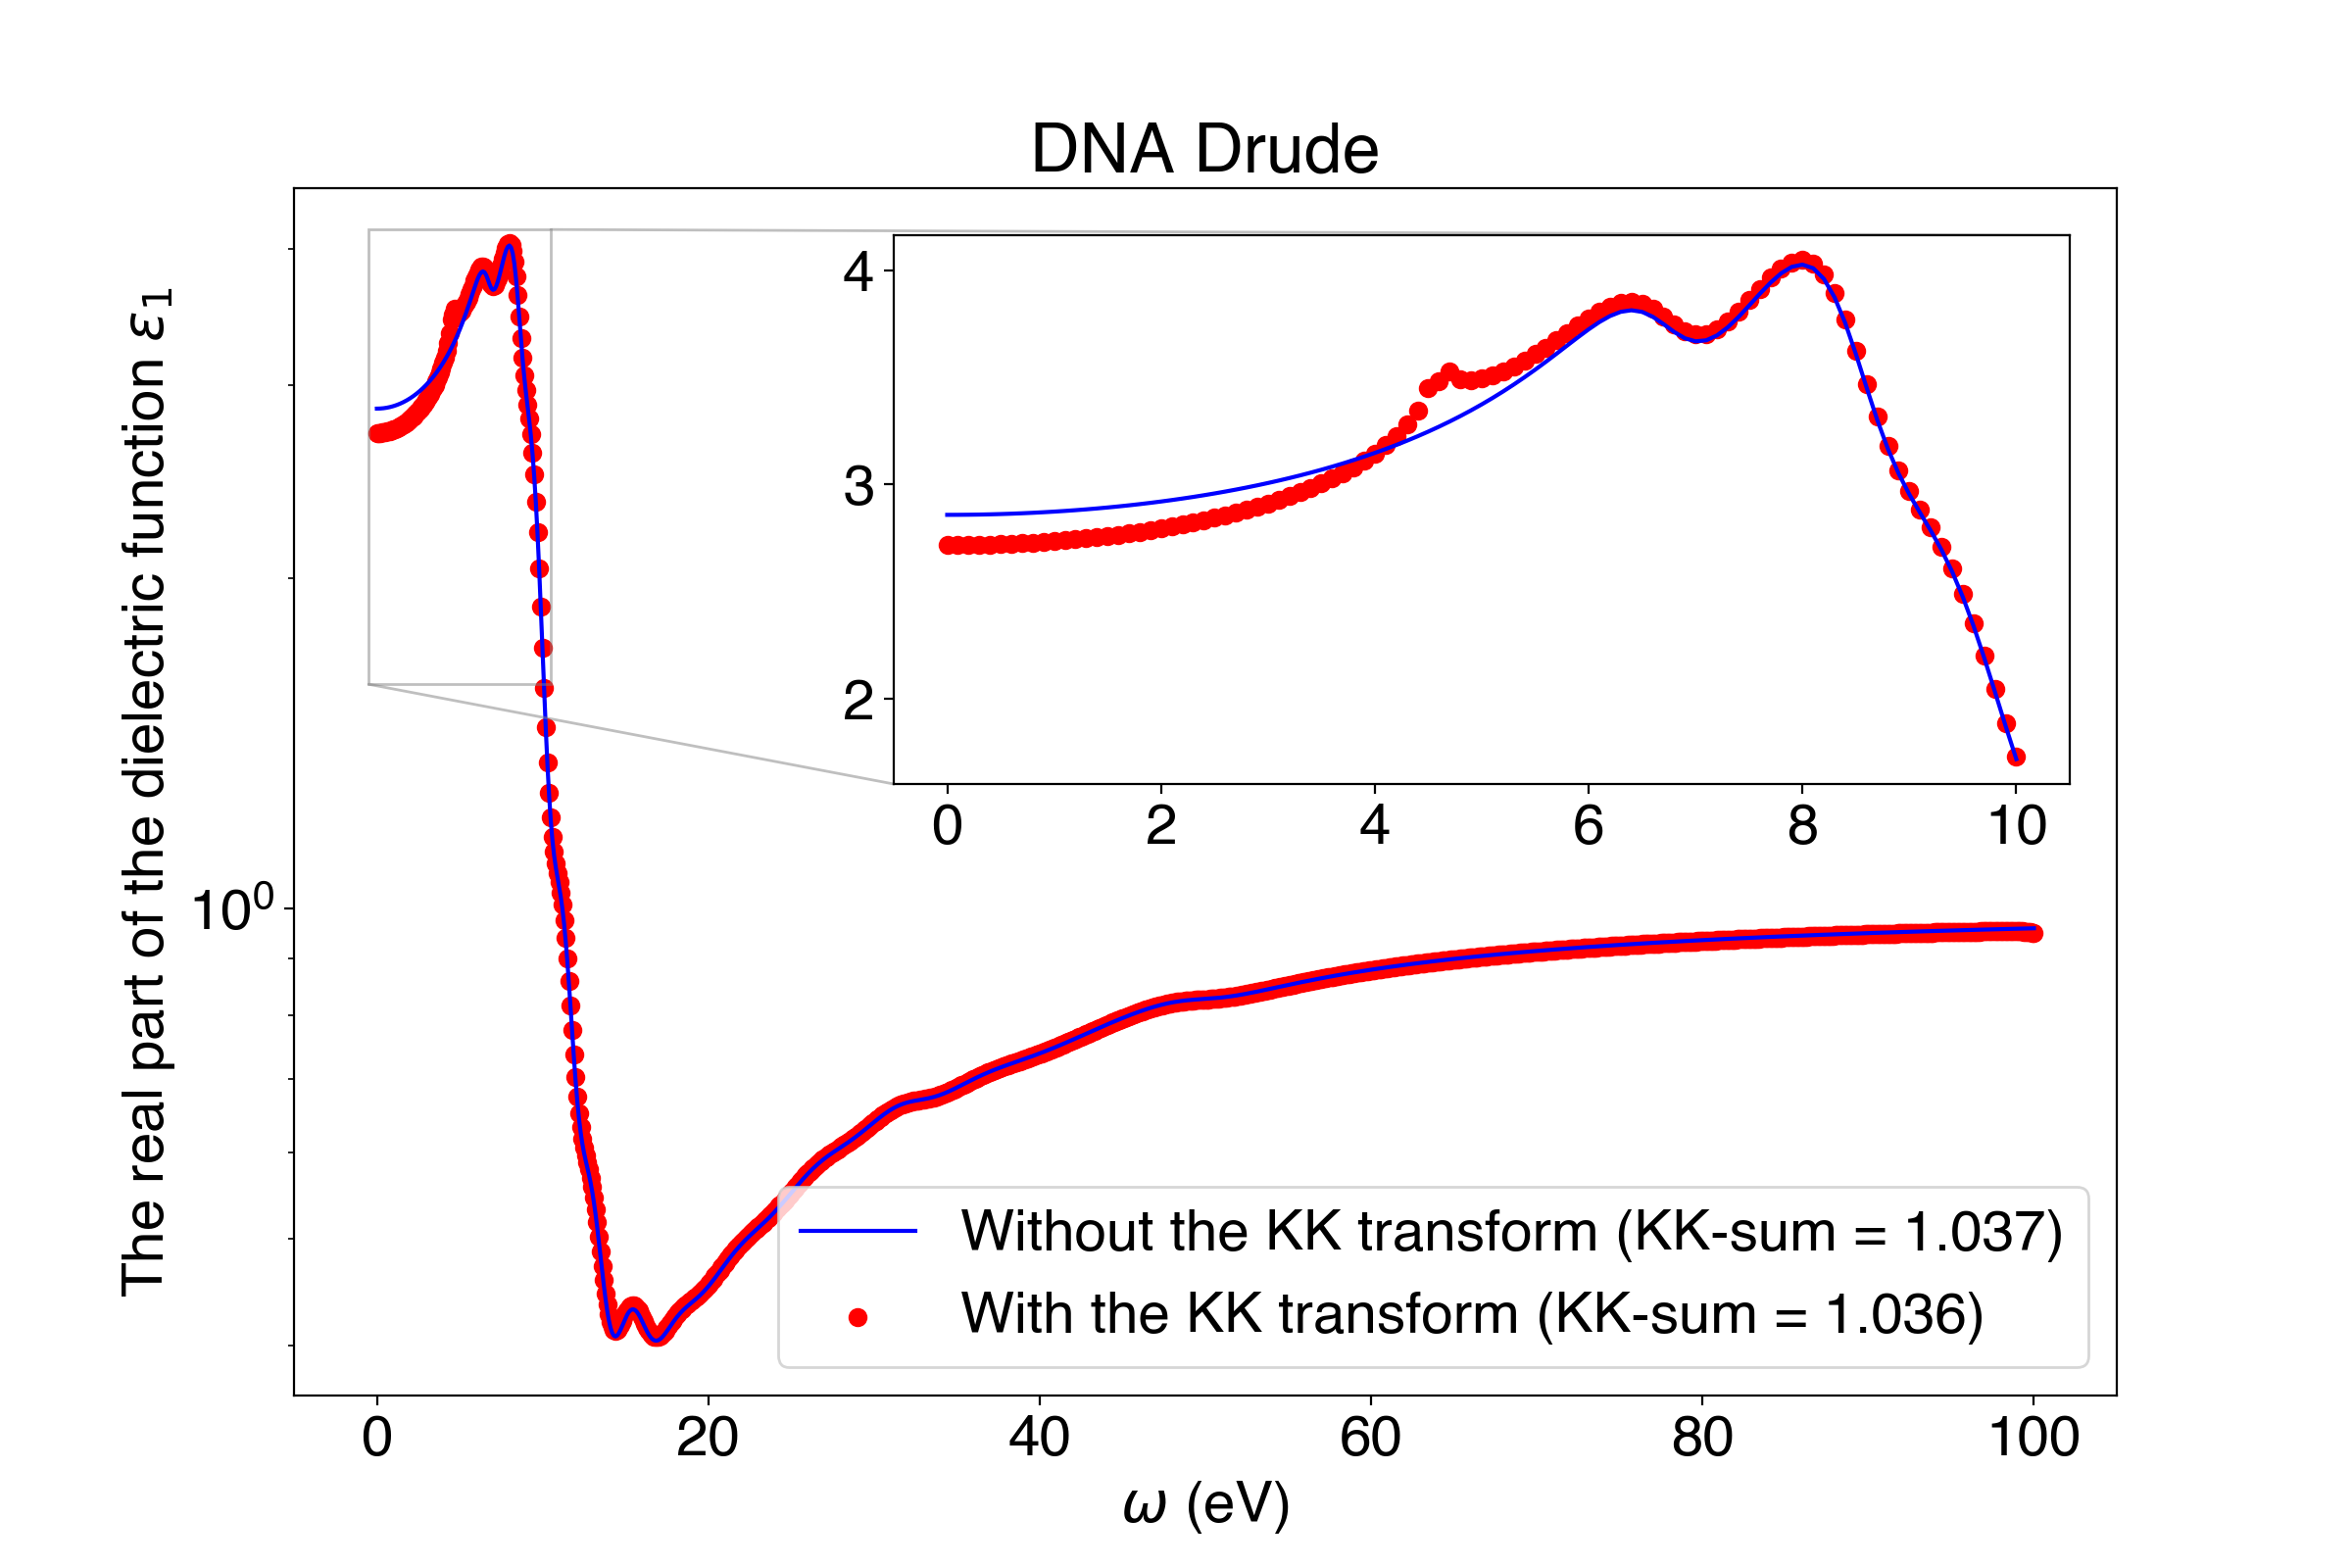

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 4.79392977492378
KKSum = 1.0371837580935153

With the Kramers-Kronig transfer after the zeroing procedure:
FSum = 4.793050489587463
KKSum = 1.035748673127596


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
fig, ax = plt.subplots(figsize=[12,8])

osc = dna_drude
x_limit = 10

osc.use_kk_relation = False
osc.calculateDielectricFunction()
ind_zoom = osc.eloss <= x_limit
x_zoom_no_kk = osc.eloss[ind_zoom]
y_zoom_no_kk = osc.epsilon.real[ind_zoom]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the KK transform (KK-sum = {round(kk_sum_no_kk, 3)})', c='blue')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[ind_zoom]
y_zoom_kk = osc.epsilon.real[ind_zoom]
kk_sum_kk = osc.evaluateKKsum()
plt.scatter(osc.eloss, osc.epsilon.real, label=f'With the KK transform (KK-sum = {round(kk_sum_kk, 3)})', c='red')


print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk, c='blue')
axes.scatter(x_zoom_kk, y_zoom_kk, c='red')
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}_{osc.oscillators.model}.eps', dpi=600)

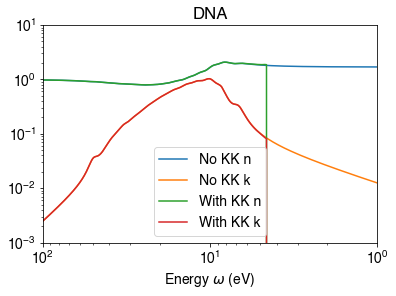

In [14]:
plt.figure()

dna_drude.Eg = 0
dna_drude.calculateDielectricFunction()
dna_drude.calculateOpticalConstants_()
plt.plot(dna_drude.eloss, dna_drude.refractive_index, label='No KK n')
plt.plot(dna_drude.eloss, dna_drude.extinction_coefficient, label='No KK k')

dna_drude.Eg = 4.5
dna_drude.calculateDielectricFunction()
dna_drude.calculateOpticalConstants_()
plt.plot(dna_drude.eloss, dna_drude.refractive_index, label='With KK n')
plt.plot(dna_drude.eloss, dna_drude.extinction_coefficient, label='With KK k')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy $\omega$ (eV)')
plt.xlim(100, 1)
plt.ylim(0.001, 10)
plt.title(f'{dna_drude.name}')

plt.legend()
plt.show()

Start optimisation
FSum = 4.797449729460651
Z = 4.9
KKSum = 1.0381011069355979
A = [5.29, 19.298, 55.345, 31.063, 43.018, 26.595, 54.211, 49.536, 24.289, 40.644, 15.33, 28.717, 9.305]
gamma = [1.369, 1.584, 2.378, 2.602, 3.721, 4.203, 7.509, 9.497, 8.353, 85.114, 6.812, 12.213, 7.85]
omega = [6.758, 8.565, 9.874, 11.641, 13.486, 15.995, 18.748, 23.015, 27.968, 34.81, 32.707, 38.098, 49.778]
osc.A = [5.29 19.298 55.345 31.063 43.018 26.595 54.211 49.536 24.289 40.644 15.33 28.717 9.305];
osc.G = [1.369 1.584 2.378 2.602 3.721 4.203 7.509 9.497 8.353 85.114 6.812 12.213 7.85];
osc.Om = [6.758 8.565 9.874 11.641 13.486 15.995 18.748 23.015 27.968 34.81 32.707 38.098 49.778];


<IPython.core.display.Javascript object>


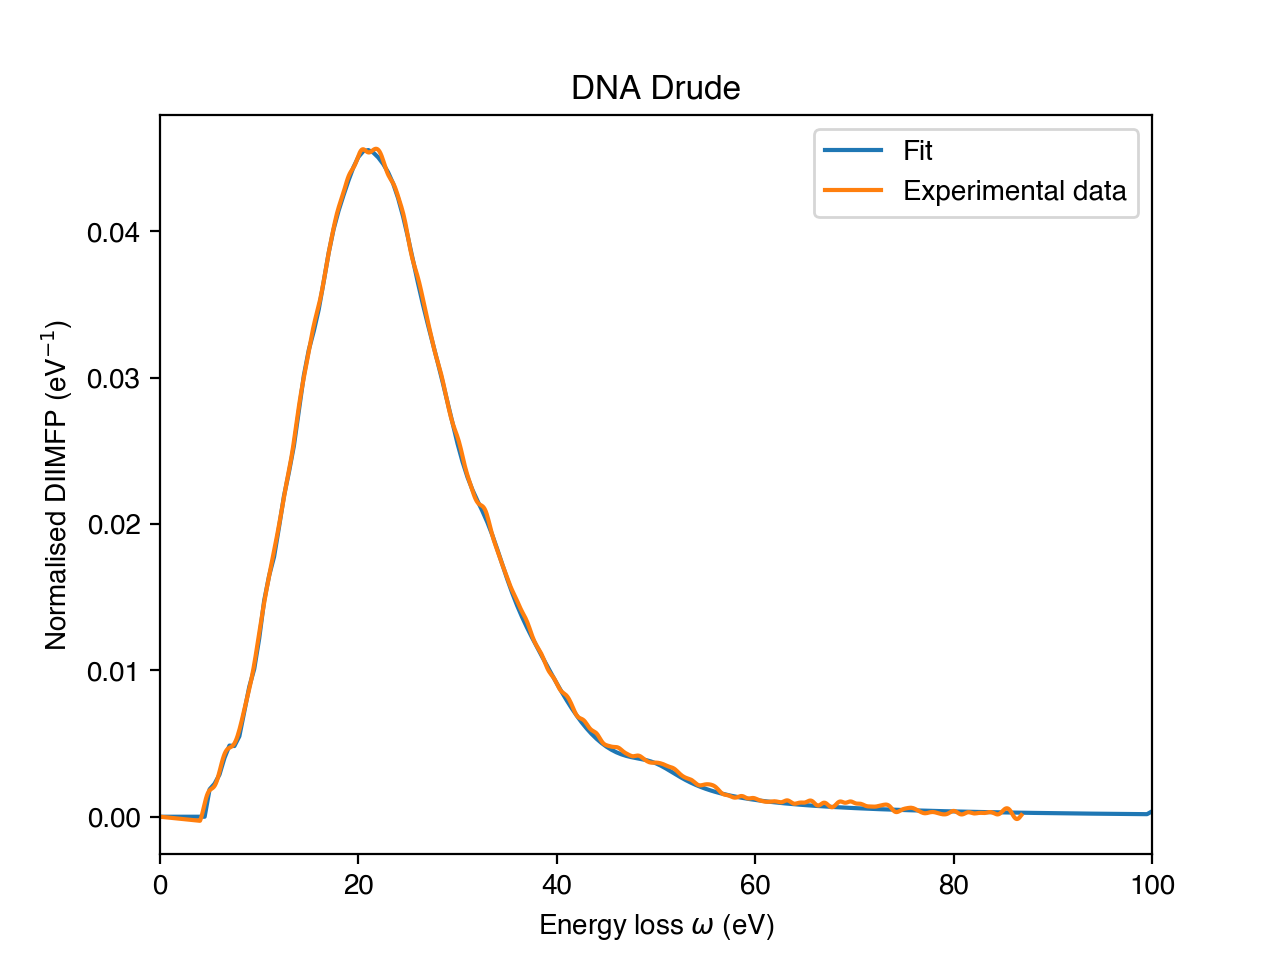

In [29]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(dna_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [5]:
# As in the manuscript
# A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
# gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
# omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]

# Without any zeroing
# A = [0.044, 0.04, 0.095, 0.041, 0.044, 0.058, 0.052, 0.062, 0.063, 0.08, 0.019]
# gamma = [3.807, 4.626, 5.639, 4.711, 4.745, 4.554, 5.646, 10.565, 14.858, 16.956, 70.238]
# omega = [12.957, 15.246, 20.942, 18.915, 23.325, 17.03, 25.993, 30.364, 23.871, 34.013, 58.818]

A = [0.037, 0.032, 0.084, 0.027, 0.044, 0.038, 0.055, 0.039, 0.043, 0.103, 0.075, 0.008, 0.016]
gamma = [3.417, 4.497, 5.324, 7.224, 3.607, 4.187, 3.717, 6.4, 16.063, 12.012, 12.722, 99.269, 90.085]
omega = [12.723, 15.509, 16.593, 20.754, 21.501, 24.612, 19.01, 23.189, 38.159, 28.376, 29.922, 44.798, 52.438]

M = (39 * 12.01 + 13 * 14.007 + 24 * 15.999 + 4 * 30.974 + 49 * 1.01) / (39 + 13 + 24 + 4 + 49) # Molar weight
rho = 1.35 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_dl = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_dl.Eg = 4.5
dna_dl.width_of_the_valence_band = 0.5
dna_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
dna_dl.static_refractive_index = 1.58
dna_dl.electron_density = 0.292
dna_dl.Z = 4.9
dna_dl.use_KK_constraint = True
dna_dl.use_kk_relation = False

fsum = dna_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(dna_dl.Z))

kksum = dna_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.644160556464786
Z = 4.9
KKSum = 0.9757058314143646


<IPython.core.display.Javascript object>


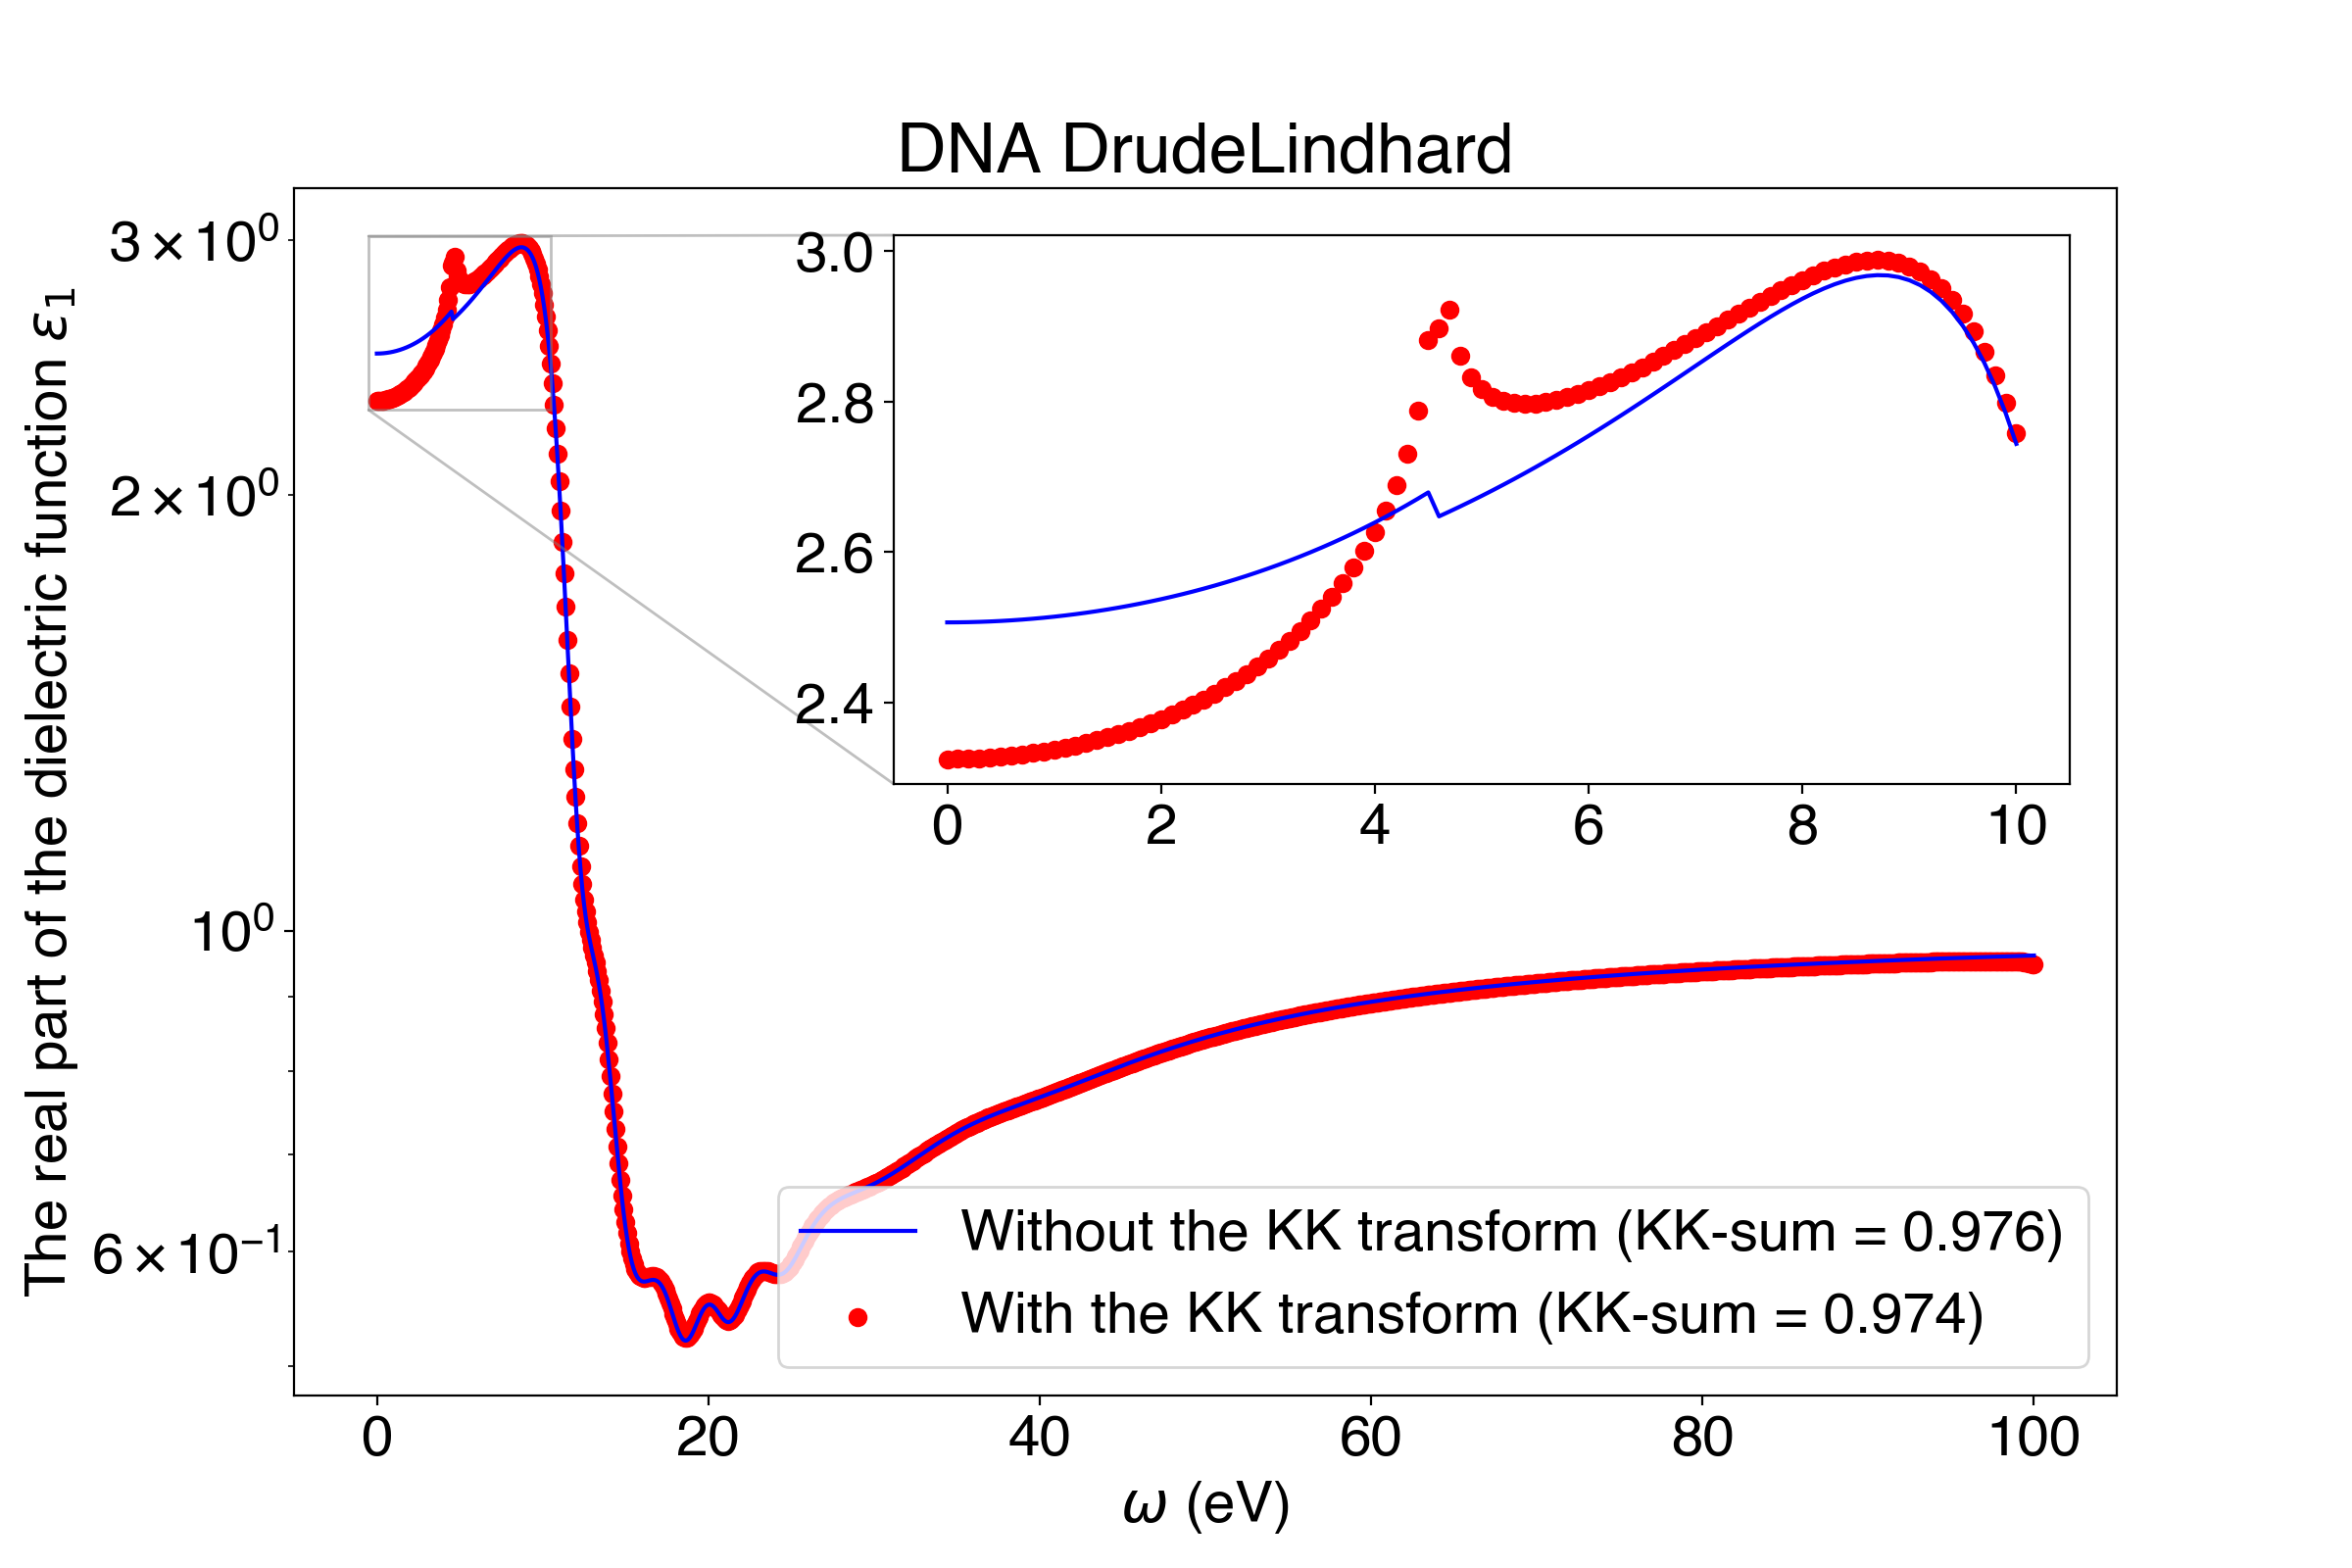

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 4.644160556464786
KKSum = 0.9757058314143646

With the Kramers-Kronig transfer after the zeroing procedure:
FSum = 4.646162196925602
KKSum = 0.9737450742369748


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
fig, ax = plt.subplots(figsize=[12,8])

osc = dna_dl
x_limit = 10

osc.use_kk_relation = False
osc.calculateDielectricFunction()
ind_zoom = osc.eloss <= x_limit
x_zoom_no_kk = osc.eloss[ind_zoom]
y_zoom_no_kk = osc.epsilon.real[ind_zoom]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the KK transform (KK-sum = {round(kk_sum_no_kk, 3)})', c='blue')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[ind_zoom]
y_zoom_kk = osc.epsilon.real[ind_zoom]
kk_sum_kk = osc.evaluateKKsum()
plt.scatter(osc.eloss, osc.epsilon.real, label=f'With the KK transform (KK-sum = {round(kk_sum_kk, 3)})', c='red')


print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk, c='blue')
axes.scatter(x_zoom_kk, y_zoom_kk, c='red')
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}_{osc.oscillators.model}.eps', dpi=600)

In [30]:
fd = pd.read_csv('../diimfp/dna_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(dna_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

Start optimisation


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


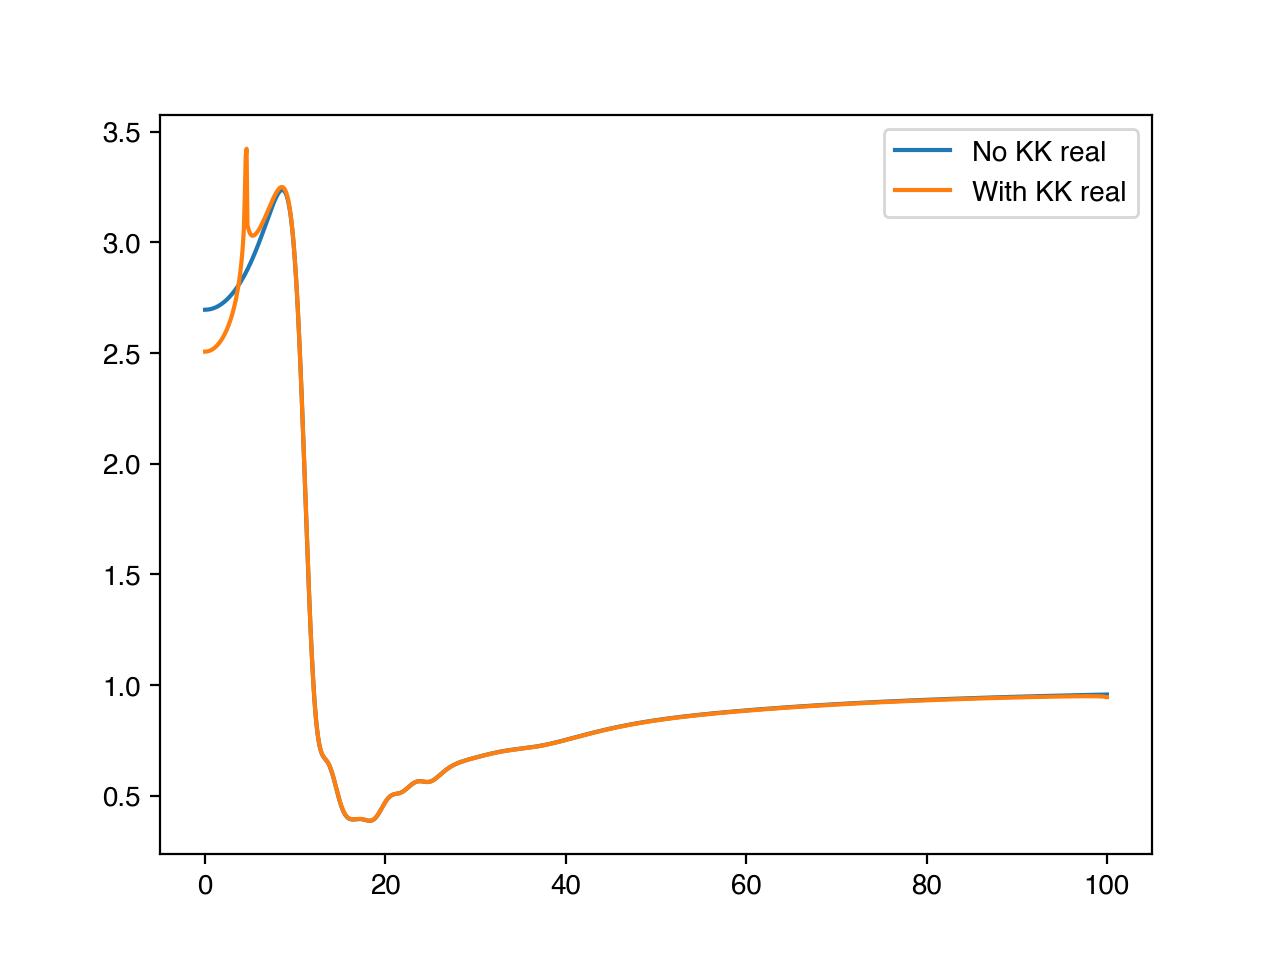

FSum = 4.82531833637868
Z = 4.9
KKSum = 1.0312247073111034

FSum = 4.823728284500352
Z = 4.9
KKSum = 1.004354142426262


In [23]:
plt.figure()

dna_dl.Eg = 0
dna_dl.calculateDielectricFunction()
plt.plot(dna_dl.eloss, dna_dl.epsilon.real, label='No KK real')

print('FSum = {}'.format(dna_dl.evaluateFsum()))
print('Z = {}'.format(dna_dl.Z))
print('KKSum = {}'.format(dna_dl.evaluateKKsum()))
print()

dna_dl.Eg = 4.5
dna_dl.calculateDielectricFunction()
plt.plot(dna_dl.eloss, dna_dl.epsilon.real, label='With KK real')
# plt.plot(dna_dl.eloss, dna_dl.epsilon.imag, label='With KK imag')

print('FSum = {}'.format(dna_dl.evaluateFsum()))
print('Z = {}'.format(dna_dl.Z))
print('KKSum = {}'.format(dna_dl.evaluateKKsum()))

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


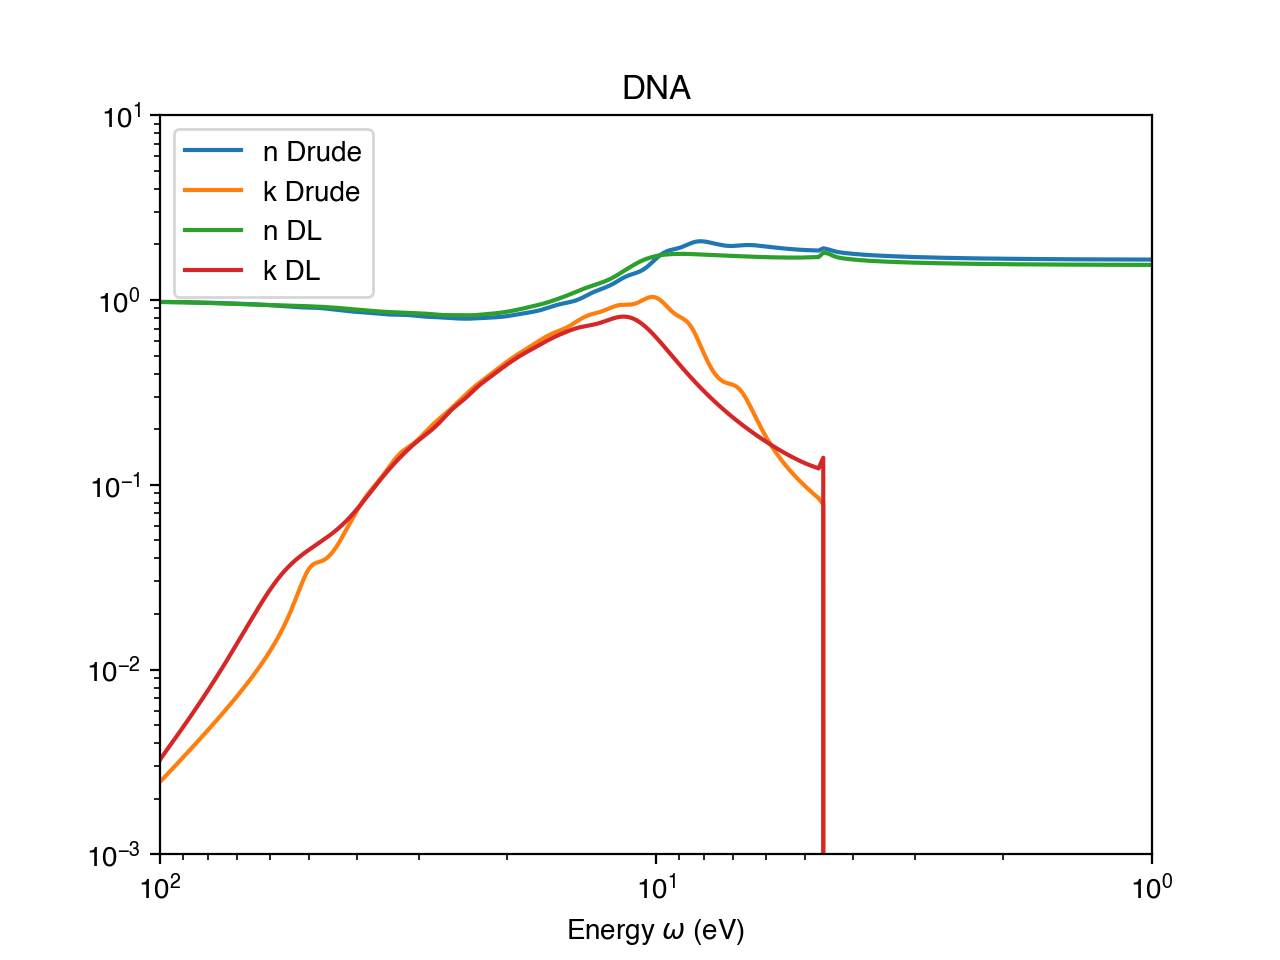

In [10]:
plt.figure()

dna_drude.calculateOpticalConstants_()
plt.plot(dna_drude.eloss, dna_drude.refractive_index, label='n Drude')
plt.plot(dna_drude.eloss, dna_drude.extinction_coefficient, label='k Drude')

dna_dl.calculateOpticalConstants_()
plt.plot(dna_dl.eloss, dna_dl.refractive_index, label='n DL')
plt.plot(dna_dl.eloss, dna_dl.extinction_coefficient, label='k DL')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy $\omega$ (eV)')
plt.xlim(100, 1)
plt.ylim(0.001, 10)
plt.title(f'{dna_dl.name}')
plt.legend()
plt.show()

plt.savefig("dna_optical_constants.png", dpi=600)

**Irganox**

In [7]:
# As in the manuscript
# A = [4.19,16.58,32.18,55.48,35.05,9.03,21.51,25.32,29.22,11.87,34.75,30.35,30.16,30.86,16.16]
# gamma = [0.7,2.3,3.3,4.1,4.2,3.2,5.3,6.2,8.0,14.5,11.5,13.7,14.3,16.5,14.0]
# omega = [6.2,9.6,11.4,13.6,16.2,18.3,19.7,22.0,25.4,30.0,30.6,38.0,46.6,56.7,72.9]

# Without zeroing
# A = [4.667, 16.59, 31.492, 58.43, 37.051, 8.94, 21.39, 24.572, 29.22, 12.774, 35.013, 29.573, 30.212, 28.056, 15.357]
# gamma = [0.68, 1.934, 2.833, 3.897, 4.113, 3.117, 5.017, 5.866, 7.663, 14.555, 11.254, 13.36, 13.861, 16.395, 23.818]
# omega = [6.182, 9.544, 11.319, 13.551, 16.179, 18.301, 19.717, 21.973, 25.445, 30.383, 30.607, 38.028, 46.611, 56.809, 72.715]

A = [4.902, 16.275, 31.551, 58.15, 37.036, 8.862, 21.332, 24.783, 29.246, 12.668, 34.702, 28.918, 30.692, 28.956, 15.259]
gamma = [0.661, 1.966, 2.906, 3.942, 4.096, 3.118, 5.011, 5.867, 7.638, 14.043, 11.494, 13.297, 14.055, 16.682, 21.755]
omega = [6.145, 9.524, 11.325, 13.555, 16.192, 18.336, 19.735, 22.006, 25.531, 30.309, 30.743, 37.968, 46.557, 56.757, 72.479]

M = (73 * 12.01 + 12 * 15.999 + 108 * 1.01) / (73 + 12 +108) # Molar weight
rho = 1.15 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [73,12,108])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

irganox_drude = opt.Material('Irganox', oscillators, composition, eloss, q, xraypath)
irganox_drude.Eg = 5.4
irganox_drude.width_of_the_valence_band = 10
irganox_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
irganox_drude.static_refractive_index = 1.535
irganox_drude.electron_density = 0.278
irganox_drude.Z = 3.3
irganox_drude.use_henke_for_ne = False
irganox_drude.use_KK_constraint = True
irganox_drude.use_KK_relation = False

fsum = irganox_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(irganox_drude.Z))

kksum = irganox_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.2659700838076136
Z = 3.3
KKSum = 0.9700677006515134


<IPython.core.display.Javascript object>


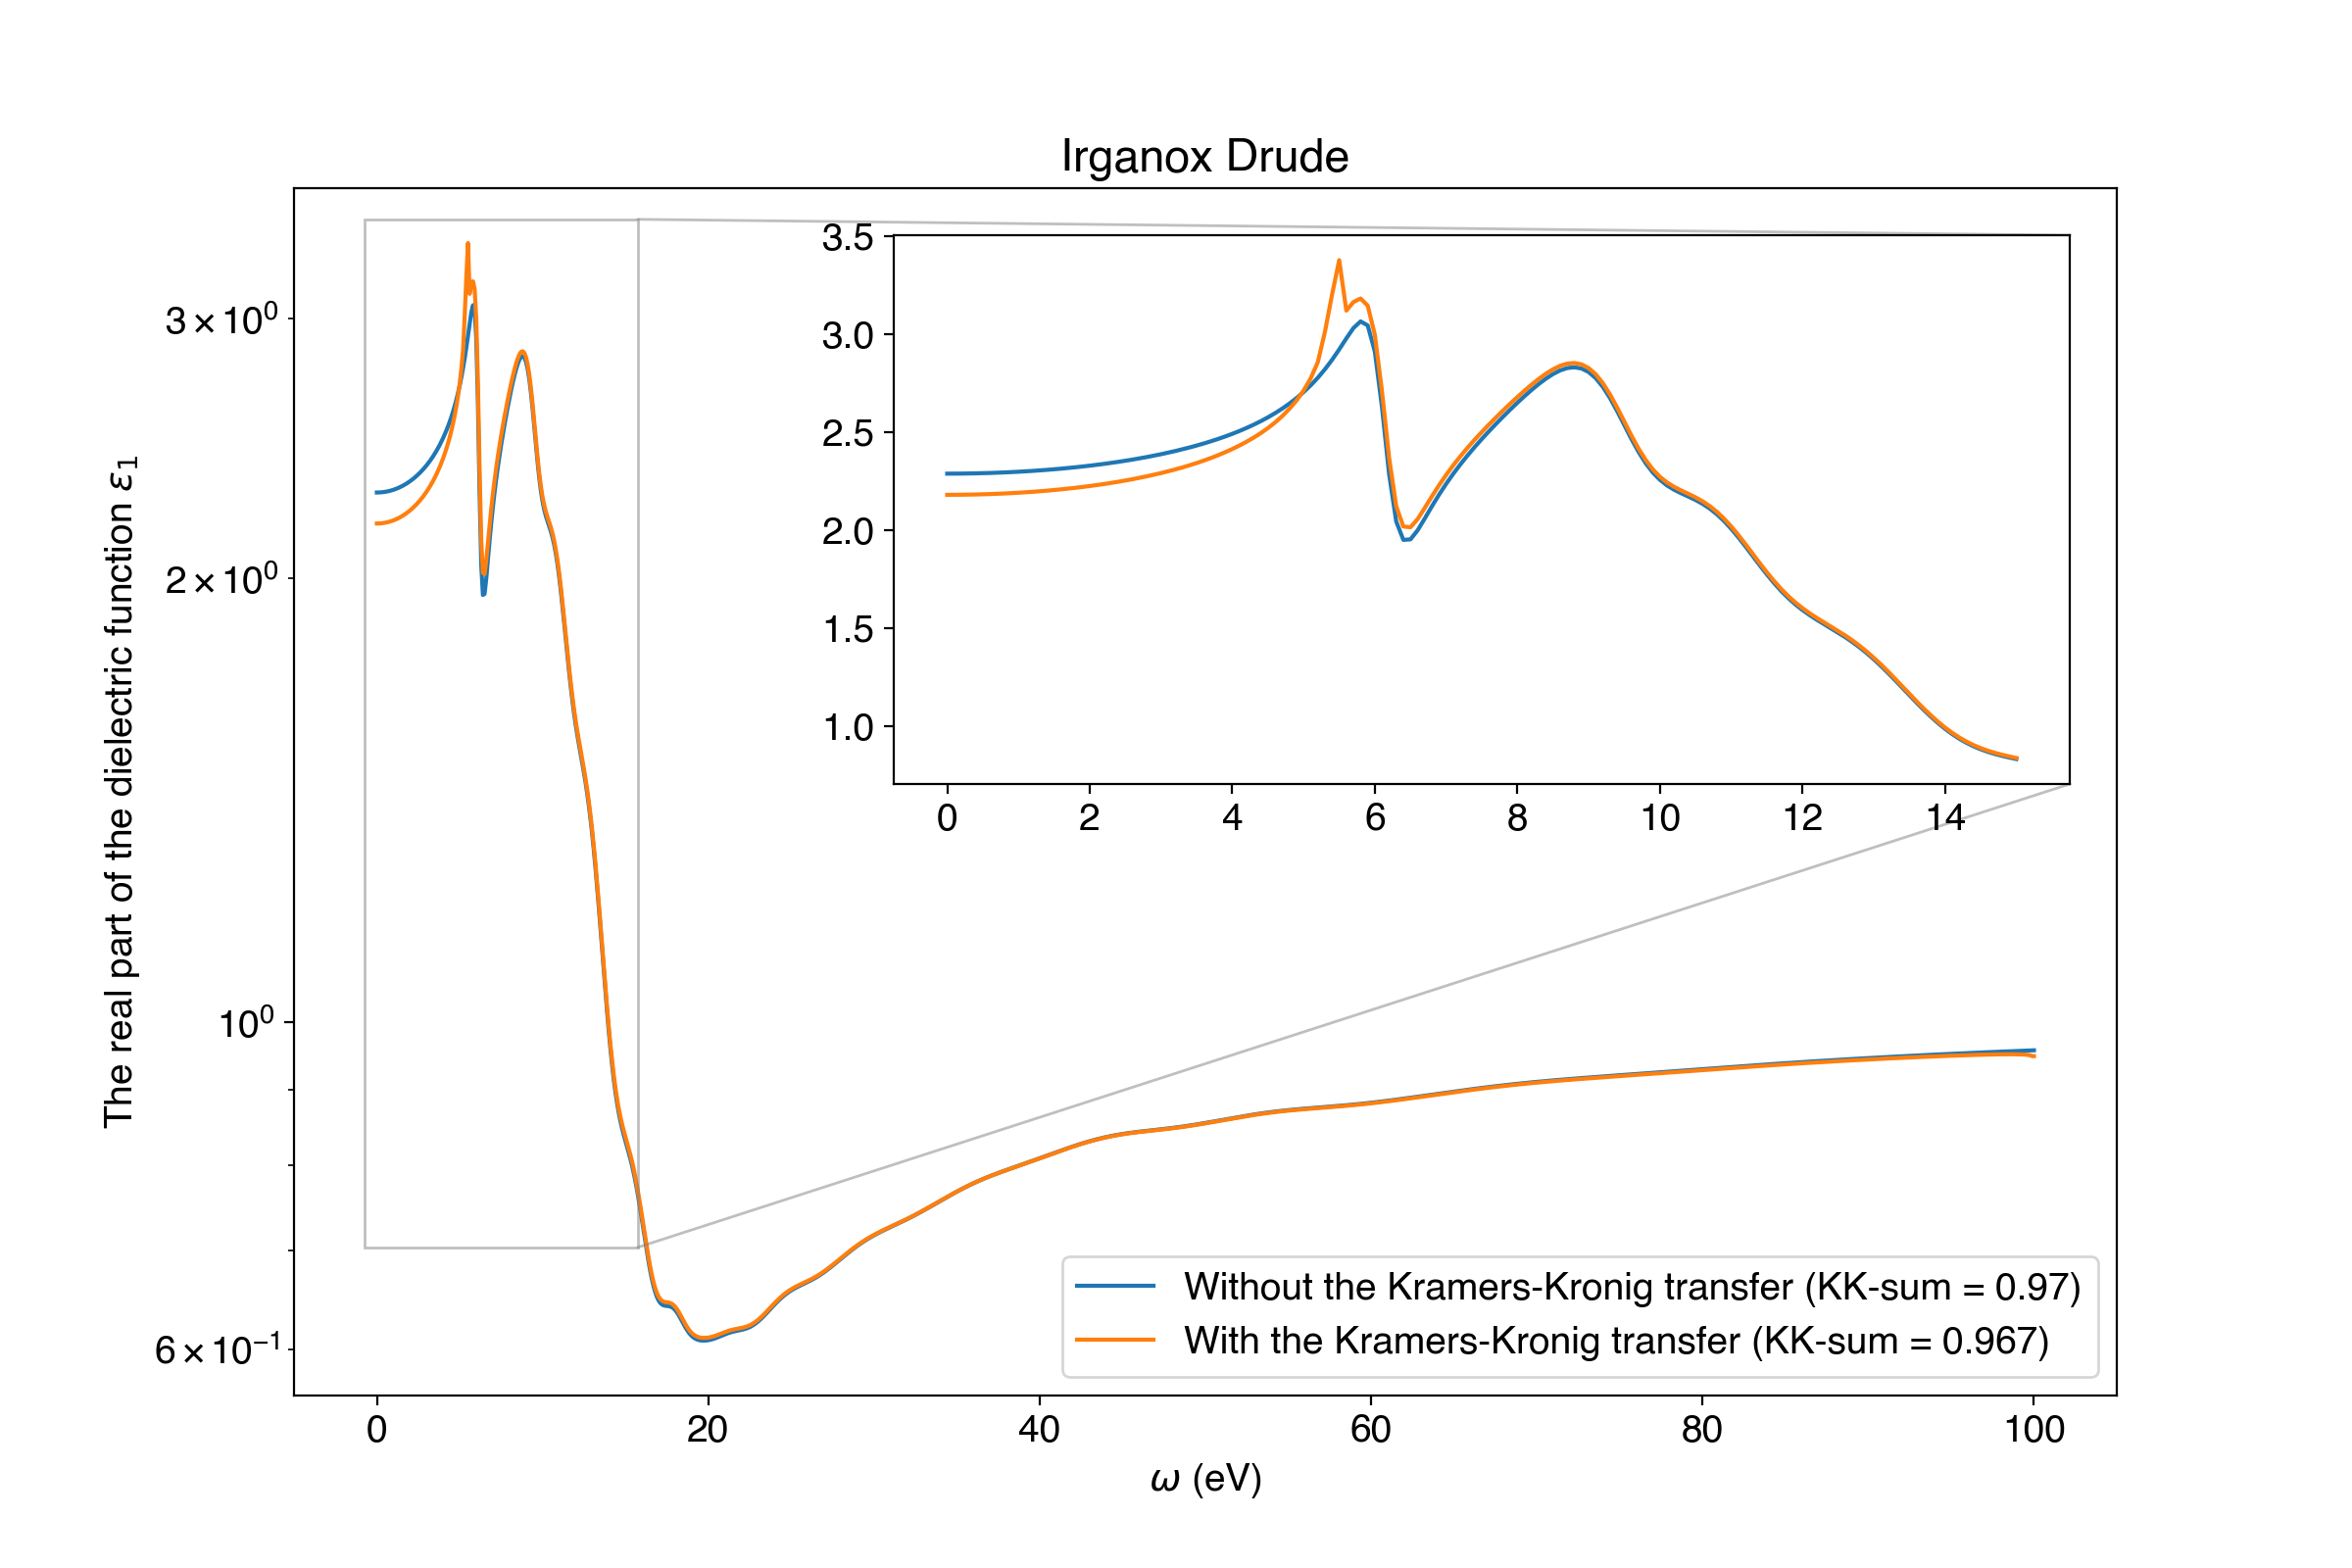

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 3.2659700838076136
KKSum = 0.9700677006515134

Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
With the Kramers-Kronig transfer after the zeroing procedure:
Using the KK-transfer
FSum = 3.2637447365882877
KKSum = 0.9671635470510941


In [8]:
fig, ax = plt.subplots(figsize=[12,8])

osc = irganox_drude
x_limit = 15

osc.use_kk_relation = False
osc.calculateDielectricFunction()
x_zoom_no_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_no_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the Kramers-Kronig transfer (KK-sum = {round(kk_sum_no_kk, 3)})')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'With the Kramers-Kronig transfer (KK-sum = {round(kk_sum_kk, 3)})')

print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk)
axes.plot(x_zoom_kk, y_zoom_kk)
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}.png', dpi=600)

Start optimisation
FSum = 3.267958888185887
Z = 3.3
KKSum = 0.970330803993257
A = [4.827, 16.221, 31.494, 58.085, 37.06, 8.872, 21.313, 24.68, 29.087, 12.737, 34.889, 28.984, 30.774, 29.036, 15.271]
gamma = [0.63, 2.02, 2.927, 3.938, 4.112, 3.107, 4.993, 5.883, 7.712, 13.995, 11.406, 13.265, 14.25, 16.617, 19.588]
omega = [6.137, 9.531, 11.298, 13.532, 16.156, 18.285, 19.695, 21.969, 25.419, 30.363, 30.534, 37.889, 46.42, 56.365, 72.052]
osc.A = [4.827 16.221 31.494 58.085 37.06 8.872 21.313 24.68 29.087 12.737 34.889 28.984 30.774 29.036 15.271];
osc.G = [0.63 2.02 2.927 3.938 4.112 3.107 4.993 5.883 7.712 13.995 11.406 13.265 14.25 16.617 19.588];
osc.Om = [6.137 9.531 11.298 13.532 16.156 18.285 19.695 21.969 25.419 30.363 30.534 37.889 46.42 56.365 72.052];


<IPython.core.display.Javascript object>


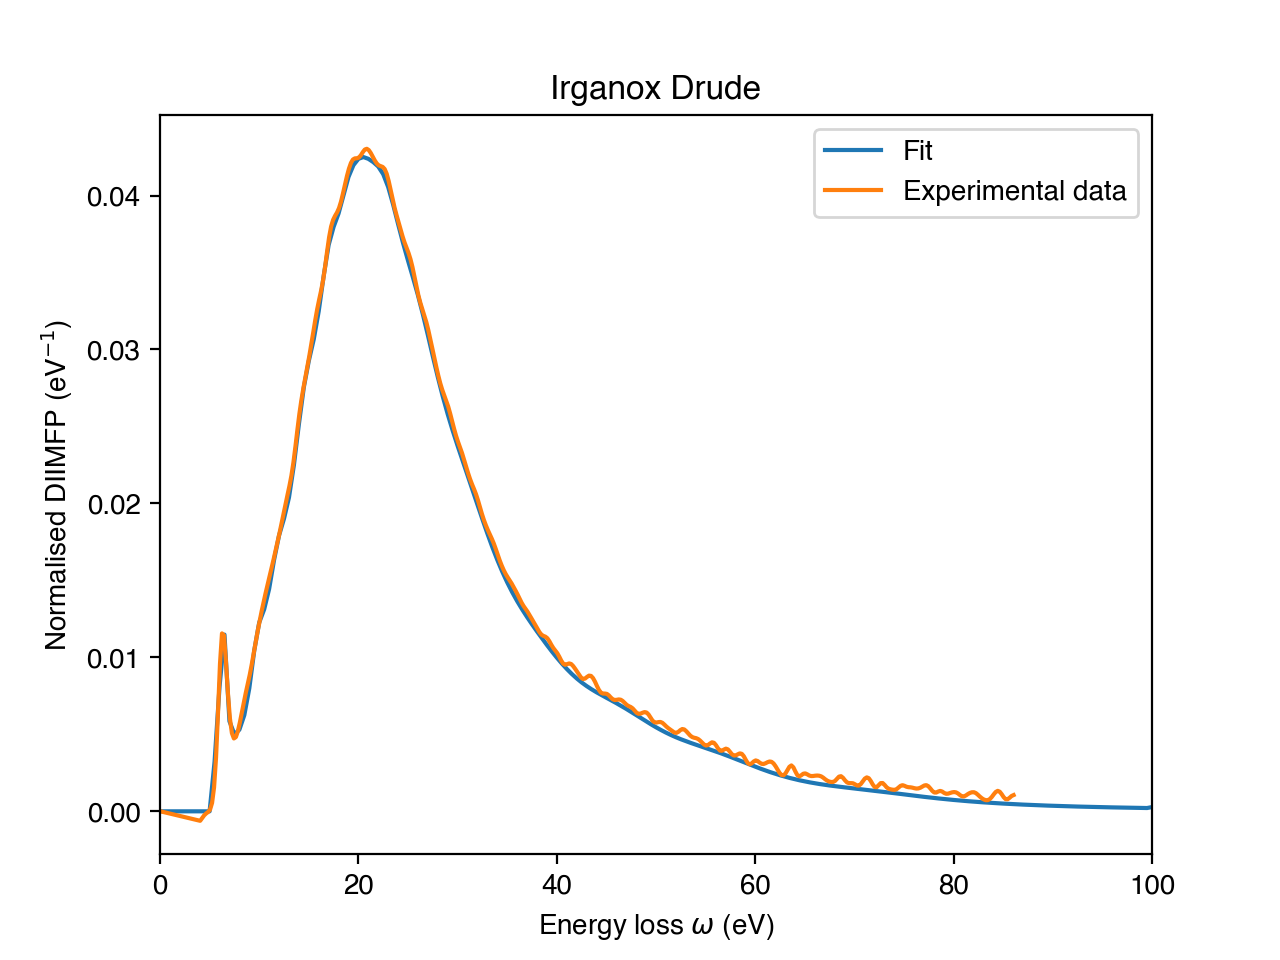

In [9]:
fd = pd.read_csv('../diimfp/irganox_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(irganox_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [34]:
# A = [0.013, 0.024, 0.022, 0.034, 0.041, 0.027, 0.039, 0.036, 0.029, 0.052, 0.011, 0.027, 0.028, 0.032, 0.034, 0.039, 0.026, 0.009]
# gamma = [0.62, 2.75, 2.38, 2.91, 3.33, 2.23, 2.68, 3.01, 3.13, 3.95, 2.79, 3.99, 5.79, 7.61, 16.11, 32.31, 23.78, 99.65]
# omega = [6.36, 10.4, 12.42, 14.49, 16, 17.34, 18.96, 20.47, 21.81, 23.44, 25.11, 26.6, 28.72, 31.73, 35.99, 41.09, 48.01, 57.08]

# without zeroing
# A = [0.013, 0.024, 0.029, 0.035, 0.044, 0.03, 0.058, 0.043, 0.075, 0.062, 0.037, 0.057, 0.023, 0.026, 0.019]
# gamma = [0.511, 2.481, 2.701, 2.638, 3.082, 3.544, 3.203, 3.146, 4.689, 5.731, 7.032, 18.638, 26.579, 27.136, 99.978]
# omega = [6.38, 12.943, 10.833, 14.815, 17.403, 16.401, 19.374, 21.348, 23.631, 26.858, 31.113, 35.888, 42.553, 48.058, 56.081]

# with zeroing
A = [0.014, 0.026, 0.028, 0.035, 0.043, 0.03, 0.057, 0.043, 0.076, 0.062, 0.036, 0.059, 0.04, 0.026]
gamma = [0.68, 2.481, 2.795, 2.643, 3.118, 3.516, 3.257, 3.211, 4.879, 5.891, 7.039, 18.281, 30.005, 28.457]
omega = [6.347, 12.791, 10.658, 14.778, 17.372, 16.354, 19.314, 21.284, 23.542, 26.693, 30.872, 35.326, 42.145, 50.619]

M = (73 * 12.01 + 12 * 15.999 + 108 * 1.01) / (73 + 12 +108) # Molar weight
rho = 1.15 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [73,12,108])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

irganox_dl = opt.Material('Irganox', oscillators, composition, eloss, q, xraypath)
irganox_dl.Eg = 5.4
irganox_dl.width_of_the_valence_band = 10
irganox_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
irganox_dl.static_refractive_index = 1.535
irganox_dl.electron_density = 0.278
irganox_dl.Z = 3.3
irganox_dl.use_henke_for_ne = False
irganox_dl.use_KK_constraint = False
irganox_dl.use_KK_relation = False

fsum = irganox_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(irganox_dl.Z))

kksum = irganox_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.2889580414802904
Z = 3.3
KKSum = 0.9736146868727894


Start optimisation
FSum = 3.306470771889163
Z = 3.3
KKSum = 0.9750795008404282
A = [0.014, 0.026, 0.028, 0.035, 0.043, 0.03, 0.057, 0.043, 0.076, 0.062, 0.036, 0.059, 0.04, 0.026]
gamma = [0.478, 2.481, 2.795, 2.643, 3.118, 3.516, 3.257, 3.211, 4.879, 5.891, 7.039, 18.281, 30.005, 28.457]
omega = [6.347, 12.791, 10.658, 14.778, 17.372, 16.354, 19.314, 21.284, 23.542, 26.693, 30.872, 35.326, 42.145, 50.619]
osc.A = [0.014 0.026 0.028 0.035 0.043 0.03 0.057 0.043 0.076 0.062 0.036 0.059 0.04 0.026];
osc.G = [0.478 2.481 2.795 2.643 3.118 3.516 3.257 3.211 4.879 5.891 7.039 18.281 30.005 28.457];
osc.Om = [6.347 12.791 10.658 14.778 17.372 16.354 19.314 21.284 23.542 26.693 30.872 35.326 42.145 50.619];


<IPython.core.display.Javascript object>


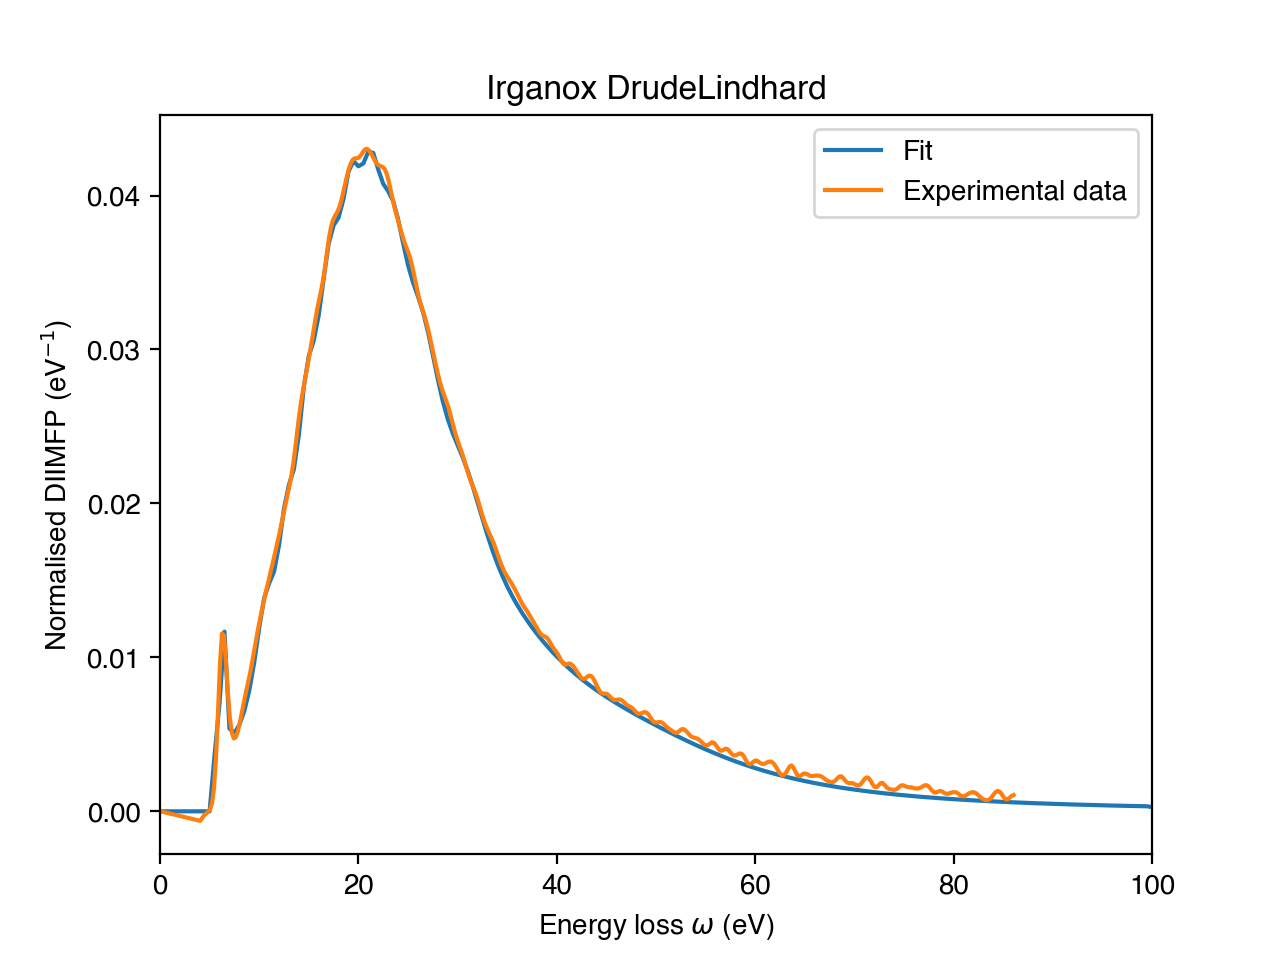

In [35]:
fd = pd.read_csv('../diimfp/irganox_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(irganox_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-14)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


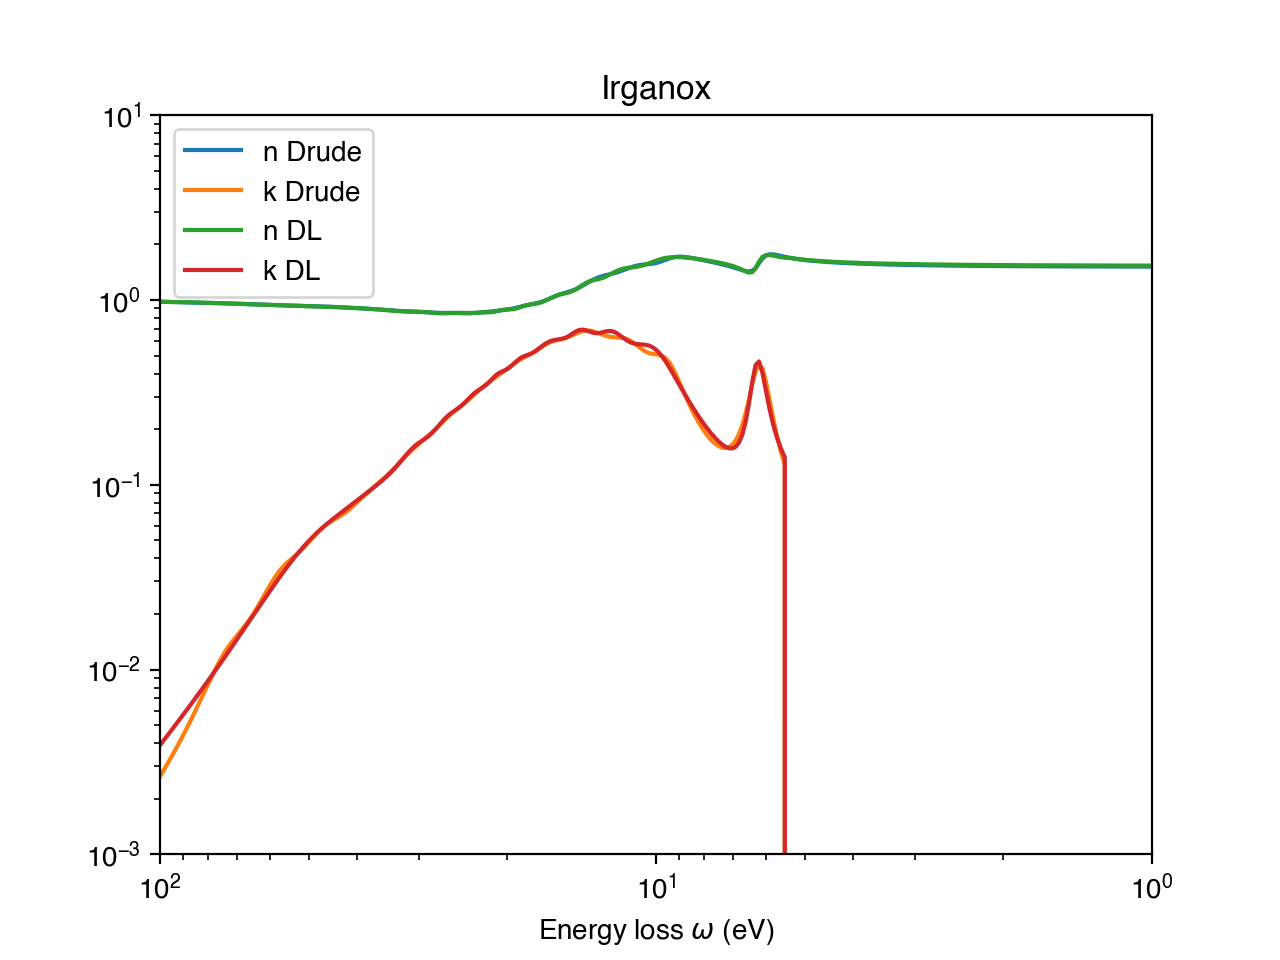

In [36]:
irganox_drude.calculateOpticalConstants()

plt.figure()
plt.plot(irganox_drude.eloss,irganox_drude.refractive_index,label='n Drude')
plt.plot(irganox_drude.eloss,irganox_drude.extinction_coefficient,label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{irganox_drude.name}')

irganox_dl.calculateOpticalConstants_()
plt.plot(irganox_dl.eloss,irganox_dl.refractive_index,label='n DL')
plt.plot(irganox_dl.eloss,irganox_dl.extinction_coefficient,label='k DL')

plt.legend()
plt.show()

irganox_drude.writeOpticalData()

**Kapton**

In [9]:
# A = [30.3300, 9.3000, 23.8700, 42.6400, 42.3600, 35.4100, 71.0900, 38.1300, 31.0700, 32.3500, 30.4500, 27.7000, 10.89]
# gamma = [1.9000, 1.5000, 2.5000, 3.5000, 5.0, 6.3000, 10.1000, 10.2000, 11.6000, 15.2000, 17.7000, 14.1000, 8.7000]
# omega = [5.5000, 8.7000, 10.1000, 11.8000, 14.2000, 16.7000, 20.1000, 25.3000, 31.4000, 38.2000, 47.5000, 57.0, 66.1000]

A = [32.274, 9.111, 25.632, 43.681, 45.324, 35.467, 70.066, 36.436, 31.192, 31.446, 29.914, 25.131, 10.397]
gamma = [1.759, 1.367, 2.471, 3.425, 5.028, 6.249, 9.938, 9.813, 11.541, 15.14, 16.929, 12.441, 7.613]
omega = [5.486, 8.621, 9.914, 11.63, 14.053, 16.632, 20.074, 25.297, 31.201, 37.52, 46.15, 56.034, 65.018]

M = (22 * 12.01 + 2 * 14.007 + 5 * 15.999 + 10 * 1.01) / (22 + 2 + 5 + 10) # Molar weight
rho = 1.42 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','h'], [22,2,5,10])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

kapton_drude = opt.Material('Kapton', oscillators, composition, eloss, q, xraypath)
kapton_drude.Eg = 4.2
kapton_drude.width_of_the_valence_band = 10
kapton_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
kapton_drude.static_refractive_index = 1.754
kapton_drude.electron_density = 0.309
kapton_drude.Z = 5
kapton_drude.use_henke_for_ne = False
kapton_drude.use_KK_constraint = False
kapton_drude.use_KK_relation = False

fsum = kapton_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(kapton_drude.Z))

kksum = kapton_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 5.0042493345434895
Z = 5
KKSum = 1.0106965188287524


<IPython.core.display.Javascript object>


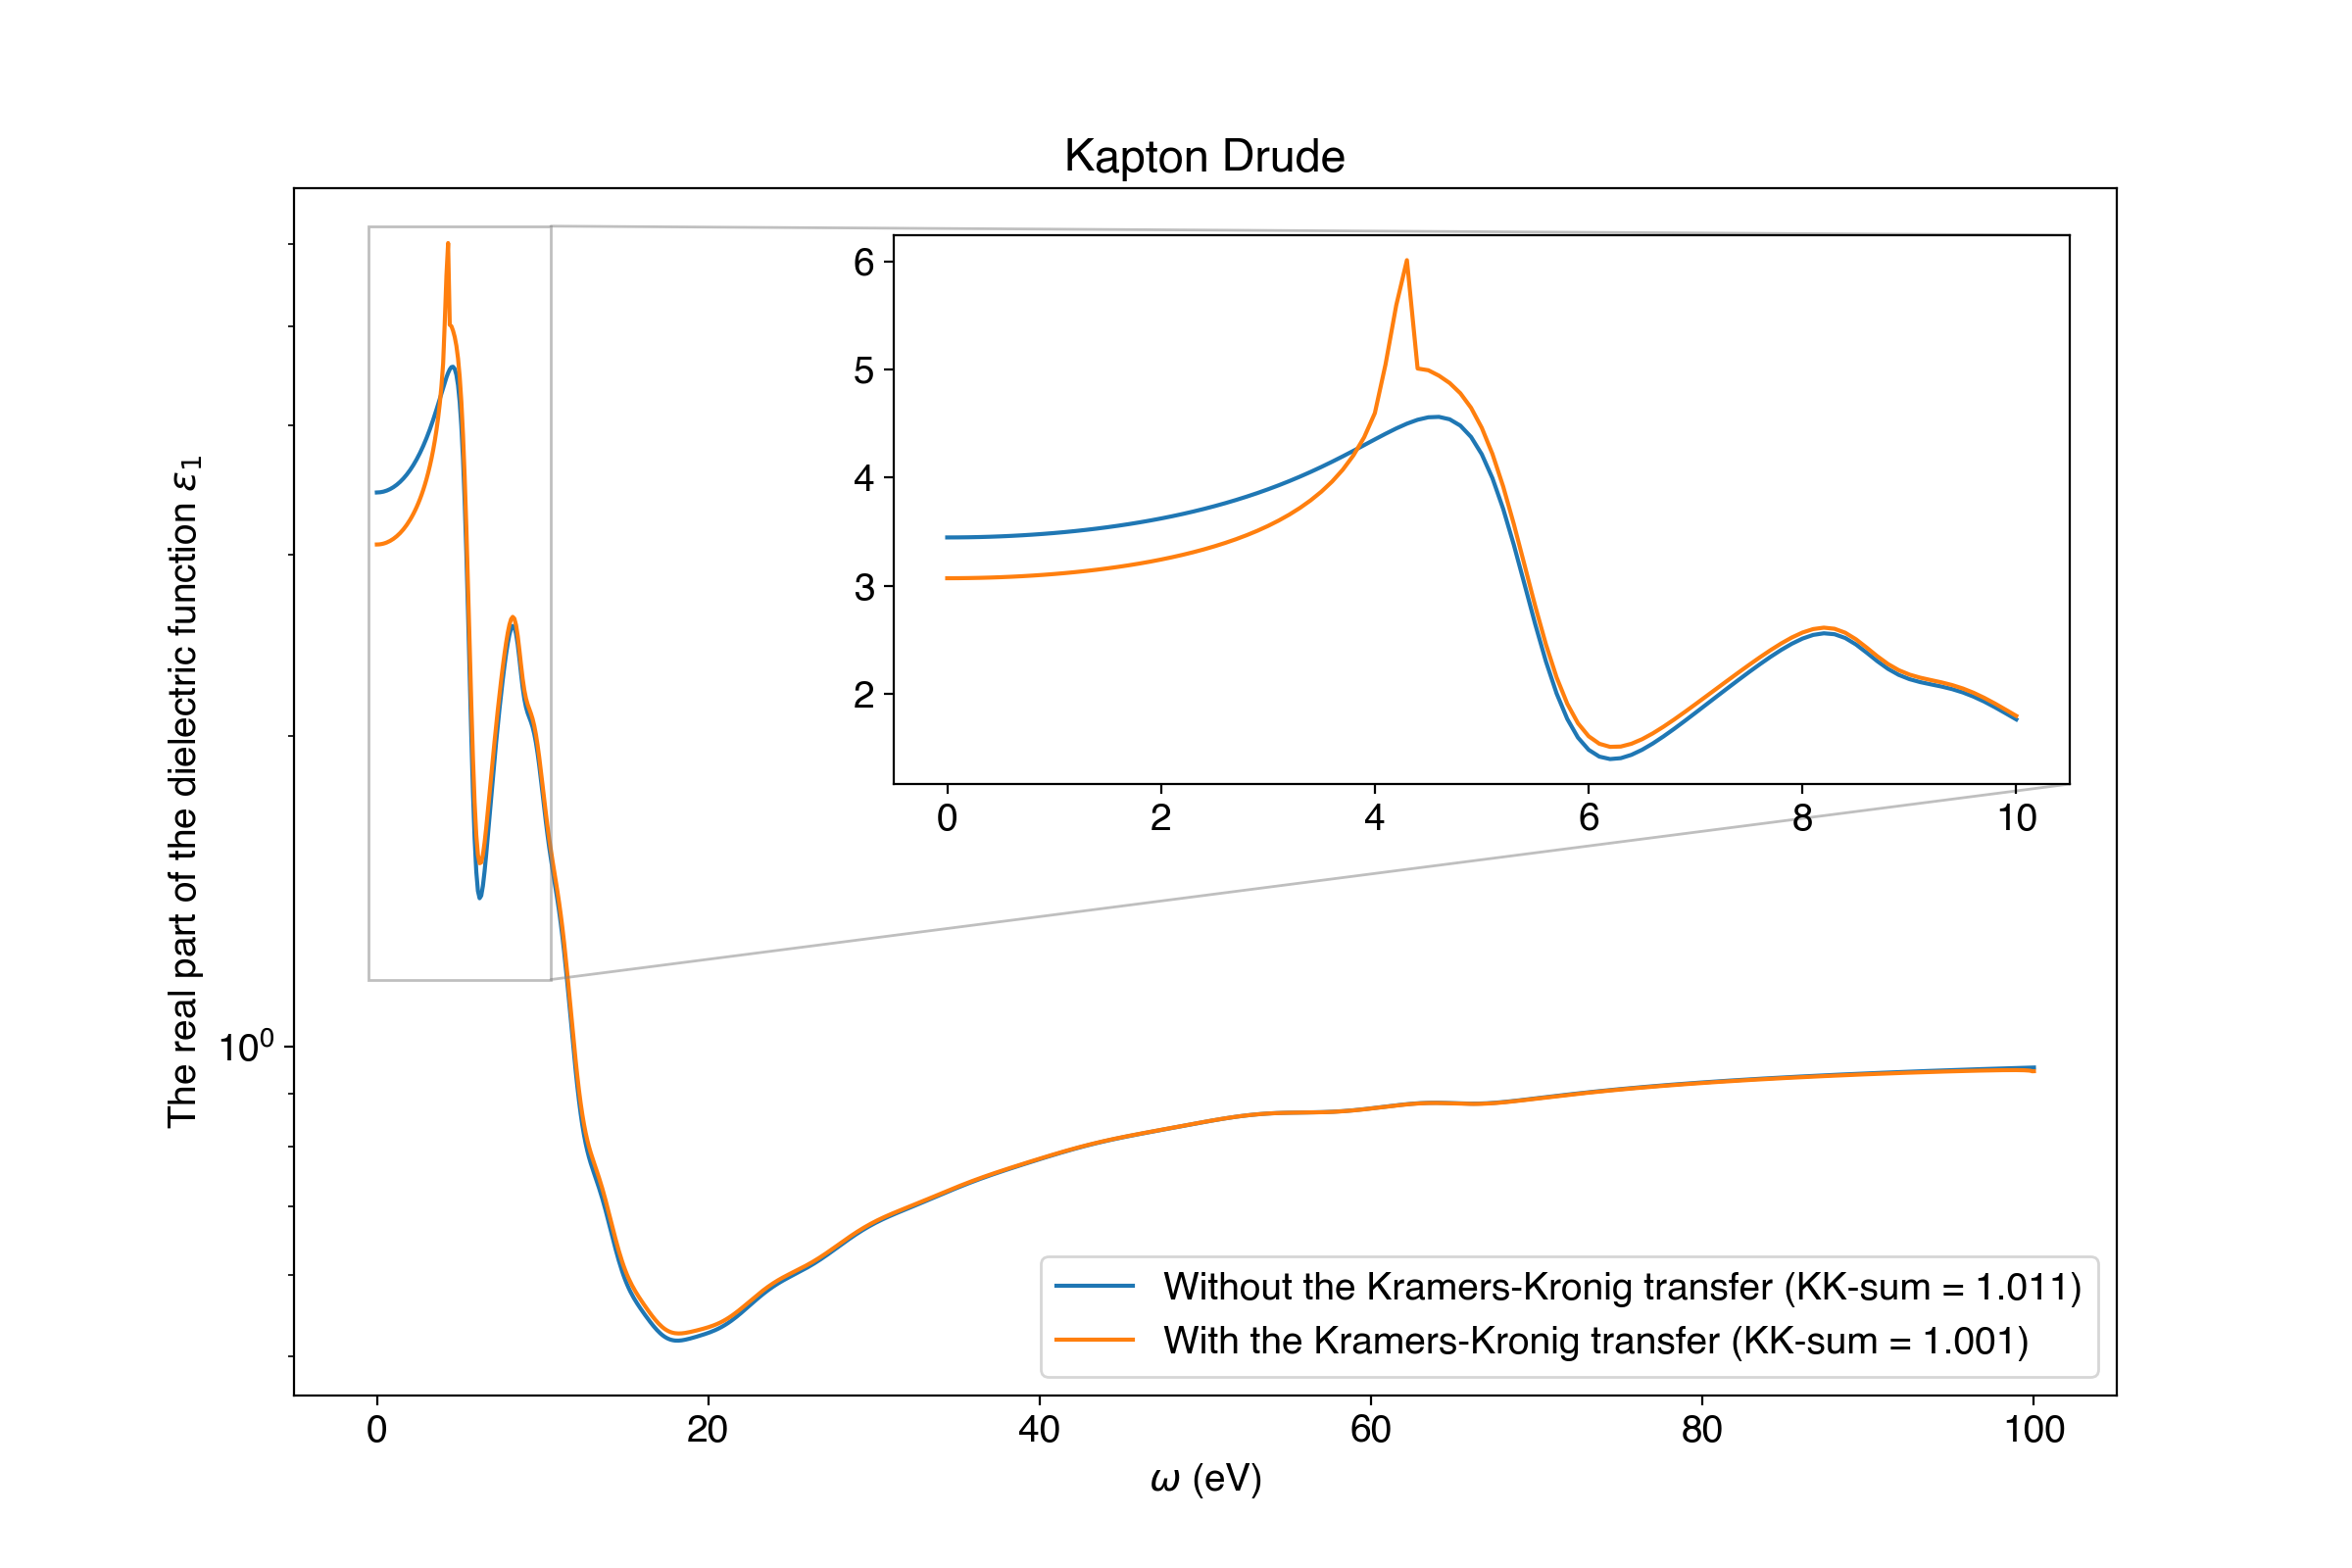

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 5.0042493345434895
KKSum = 1.0106965188287524

Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
With the Kramers-Kronig transfer after the zeroing procedure:
Using the KK-transfer
FSum = 4.987969188856693
KKSum = 1.0014545793389091


In [10]:
fig, ax = plt.subplots(figsize=[12,8])

osc = kapton_drude
x_limit = 10

osc.use_kk_relation = False
osc.calculateDielectricFunction()
x_zoom_no_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_no_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the Kramers-Kronig transfer (KK-sum = {round(kk_sum_no_kk, 3)})')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'With the Kramers-Kronig transfer (KK-sum = {round(kk_sum_kk, 3)})')

print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk)
axes.plot(x_zoom_kk, y_zoom_kk)
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}.png', dpi=600)

Start optimisation
FSum = 5.004259068412983
Z = 5
KKSum = 1.010705281789141
A = [32.274, 9.111, 25.632, 43.681, 45.324, 35.467, 70.066, 36.436, 31.192, 31.446, 29.914, 25.131, 10.397]
gamma = [1.759, 1.367, 2.471, 3.425, 5.028, 6.249, 9.938, 9.813, 11.541, 15.14, 16.929, 12.441, 7.613]
omega = [5.486, 8.621, 9.914, 11.63, 14.053, 16.632, 20.074, 25.297, 31.201, 37.52, 46.15, 56.034, 65.018]
osc.A = [32.274 9.111 25.632 43.681 45.324 35.467 70.066 36.436 31.192 31.446 29.914 25.131 10.397];
osc.G = [1.759 1.367 2.471 3.425 5.028 6.249 9.938 9.813 11.541 15.14 16.929 12.441 7.613];
osc.Om = [5.486 8.621 9.914 11.63 14.053 16.632 20.074 25.297 31.201 37.52 46.15 56.034 65.018];


<IPython.core.display.Javascript object>


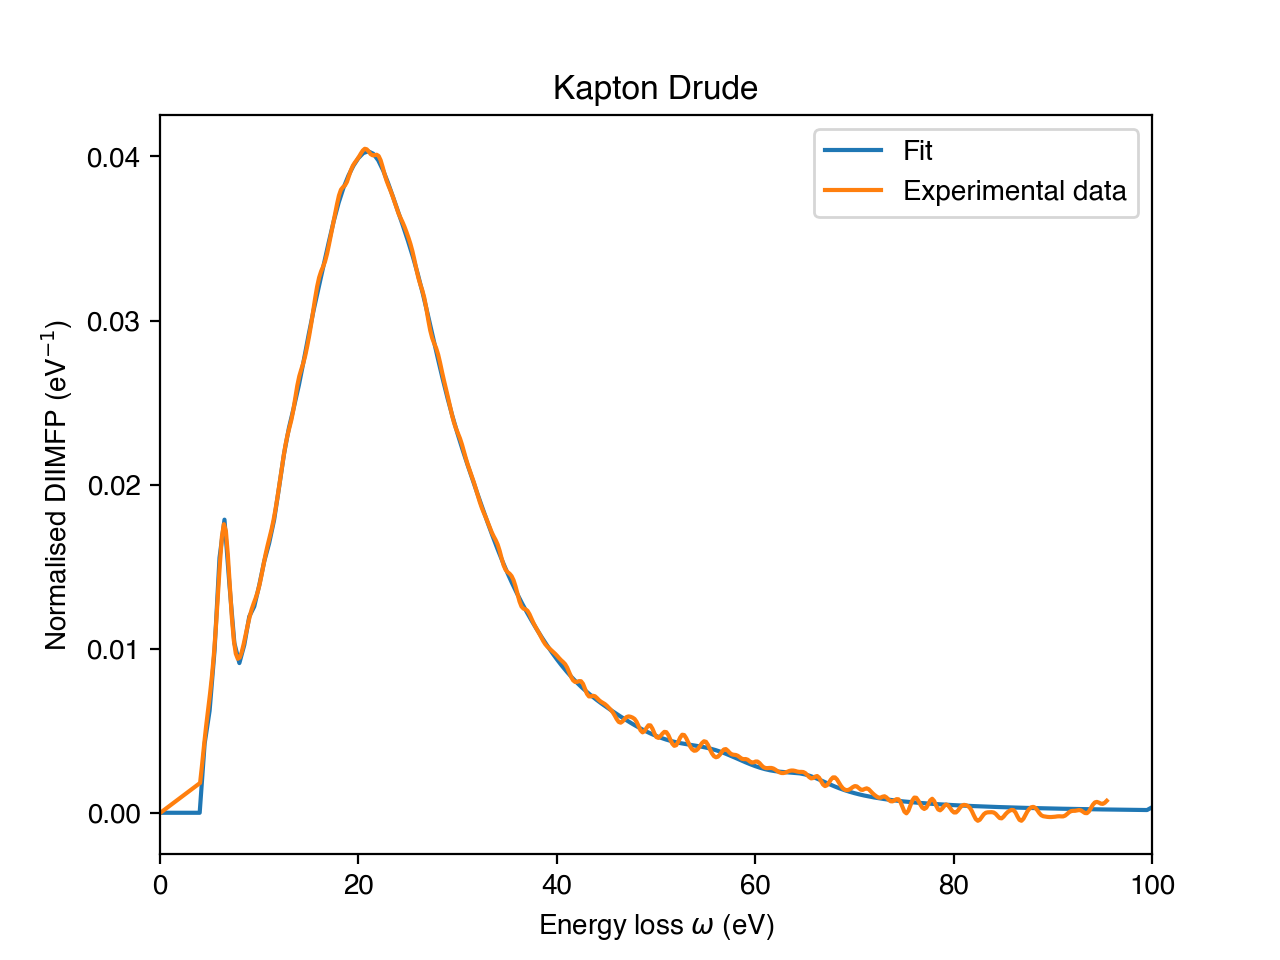

In [38]:
fd = pd.read_csv('../diimfp/kapton_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(kapton_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [42]:
#A = [0.06, 0.017, 0.021, 0.05, 0.026, 0.062, 0.048, 0.035, 0.045, 0.031, 0.059, 0.031, 0.041, 0.004, 0.063, 0.024, 0.026, 0.01, 0.027]
#gamma = [1.66, 4.65, 3.3, 3.67, 2.84, 3.53, 3.12, 3.1, 3.97, 4.43, 6.01, 5.65, 6.7, 6.87, 10.9, 15.87, 13.52, 59.05, 22.89]
#omega = [6.44, 9.87, 10.34, 12.71, 14.26, 16.13, 18.09, 19.75, 21.32, 22.54, 24.33, 25.61, 27.97, 28.57, 32.36, 32.96, 40.32, 40.91, 55.29]

# A = [0.048, 0.018, 0.041, 0.02, 0.081, 0.045, 0.052, 0.119, 0.122, 0.038, 0.042, 0.028, 0.021]
# gamma = [1.326, 3.526, 3.593, 2.554, 4.479, 3.745, 4.53, 7.703, 11.122, 12.459, 98.707, 36.772, 28.252]
# omega = [6.44, 10.135, 12.451, 14.225, 16.549, 18.862, 21.043, 23.84, 28.261, 35.181, 36.657, 43.673, 49.898]

# with zeroing
A = [0.049, 0.036, 0.042, 0.02, 0.093, 0.045, 0.047, 0.114, 0.145, 0.036, 0.025, 0.021]
gamma = [1.313, 5.345, 3.732, 2.852, 4.724, 3.975, 4.801, 8.996, 12.028, 13.034, 38.271, 23.605]
omega = [6.398, 10.408, 12.754, 14.484, 16.963, 19.503, 21.736, 24.06, 28.204, 36.04, 46.39, 51.72]

M = (22 * 12.01 + 2 * 14.007 + 5 * 15.999 + 10 * 1.01) / (22 + 2 + 5 + 10) # Molar weight
rho = 1.42 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','h'], [22,2,5,10])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

kapton_dl = opt.Material('Kapton', oscillators, composition, eloss, q, xraypath)
kapton_dl.Eg = 4.2
kapton_dl.width_of_the_valence_band = 10
kapton_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
kapton_dl.static_refractive_index = 1.754
kapton_dl.electron_density = 0.309
kapton_dl.Z = 5
kapton_dl.use_henke_for_ne = False
kapton_dl.use_KK_constraint = False
kapton_dl.use_KK_relation = False

fsum = kapton_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(kapton_dl.Z))

kksum = kapton_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 4.629877229261642
Z = 5
KKSum = 0.9308054258309633


Start optimisation
FSum = 4.818340985330595
Z = 5
KKSum = 0.9652389974540183
A = [0.049, 0.036, 0.042, 0.02, 0.093, 0.045, 0.047, 0.114, 0.145, 0.036, 0.025, 0.021]
gamma = [1.313, 5.345, 3.732, 2.852, 4.724, 3.975, 4.801, 8.996, 12.028, 13.034, 38.271, 23.605]
omega = [6.398, 10.408, 12.754, 14.484, 16.963, 19.503, 21.736, 24.06, 28.204, 36.04, 46.39, 51.72]
osc.A = [0.049 0.036 0.042 0.02 0.093 0.045 0.047 0.114 0.145 0.036 0.025 0.021];
osc.G = [1.313 5.345 3.732 2.852 4.724 3.975 4.801 8.996 12.028 13.034 38.271 23.605];
osc.Om = [6.398 10.408 12.754 14.484 16.963 19.503 21.736 24.06 28.204 36.04 46.39 51.72];


<IPython.core.display.Javascript object>


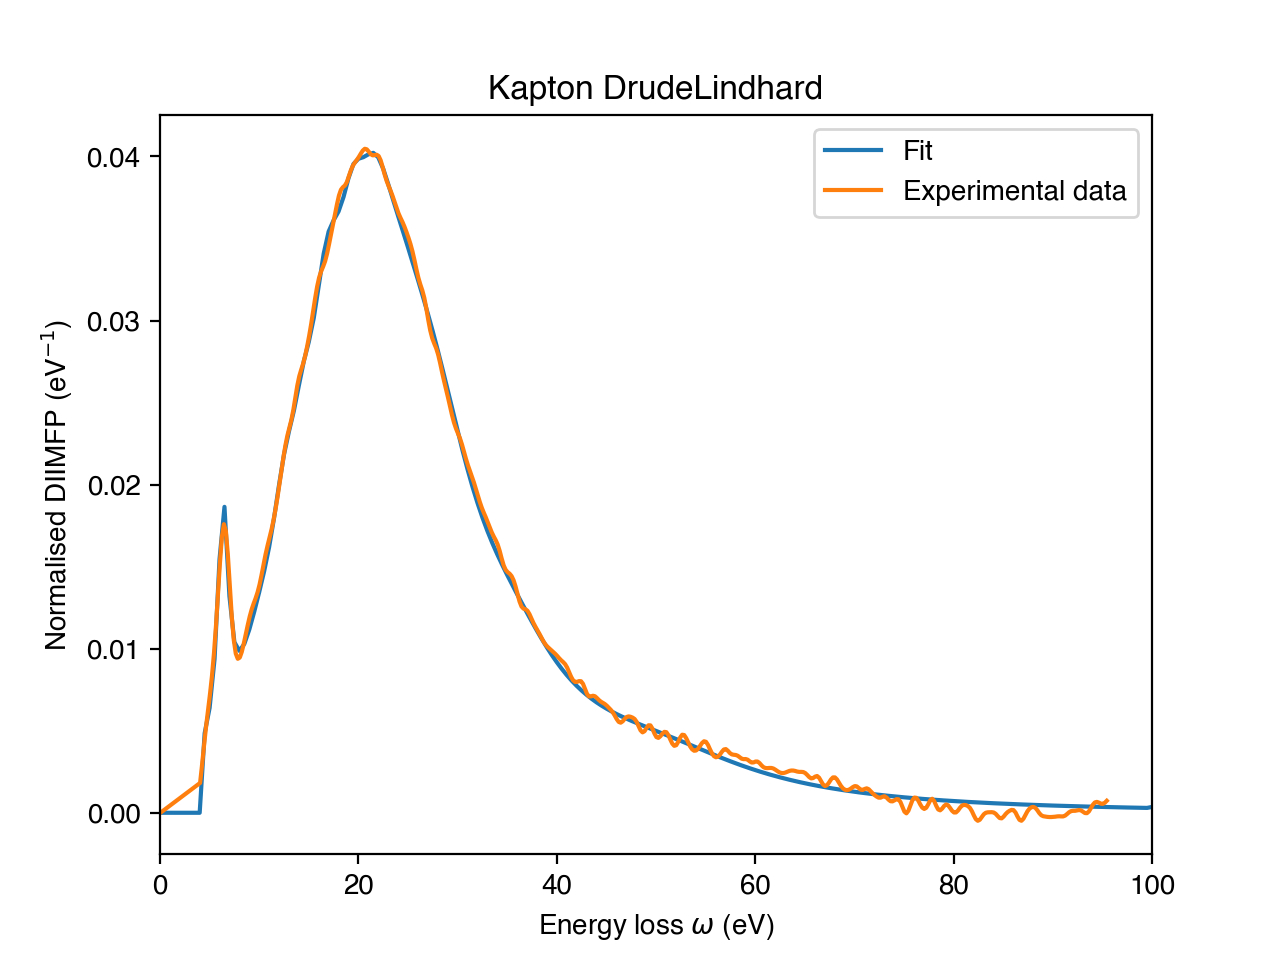

In [43]:
fd = pd.read_csv('../diimfp/kapton_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(kapton_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


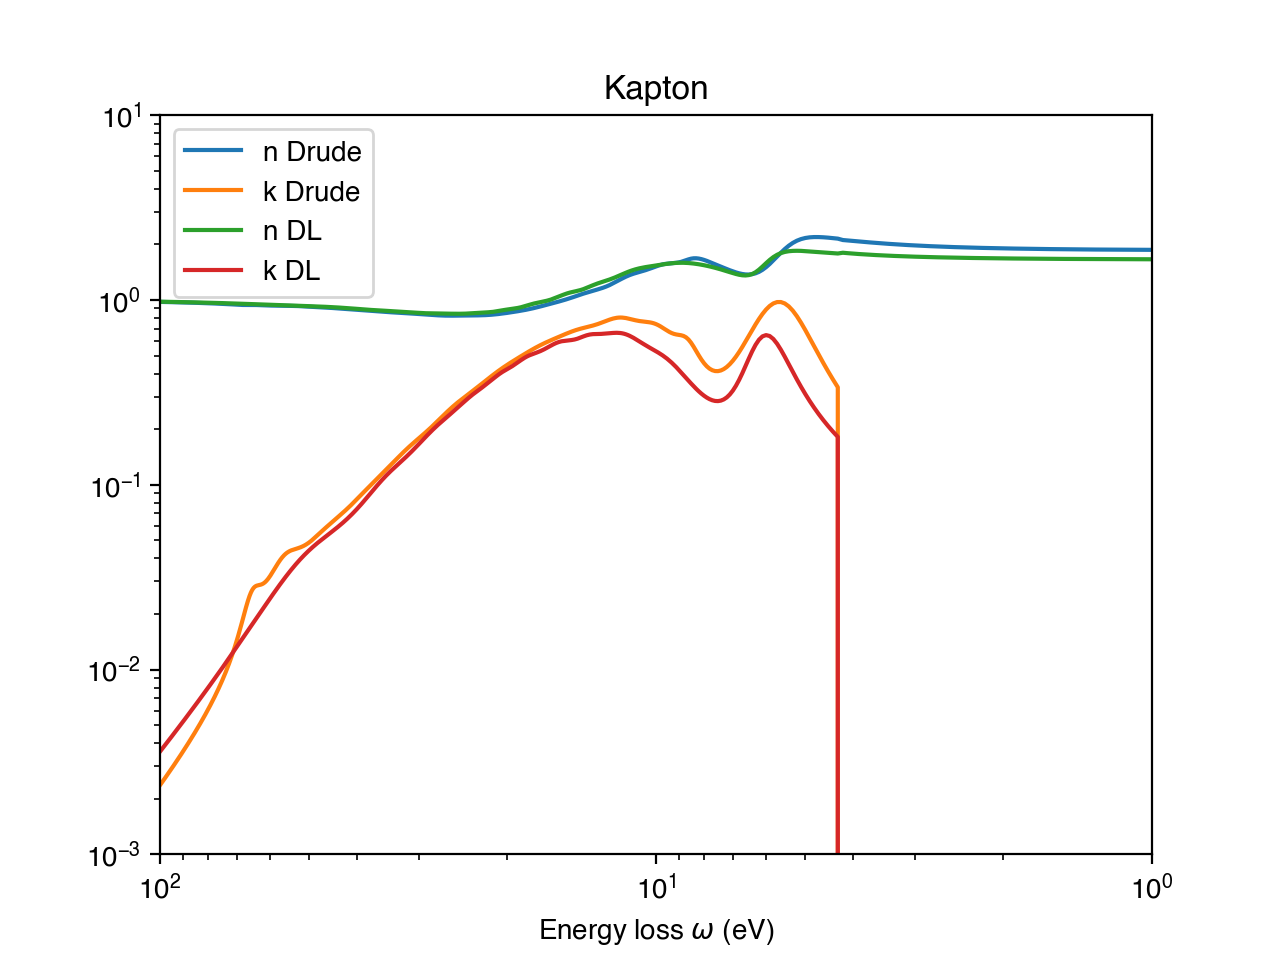

In [44]:
kapton_drude.calculateOpticalConstants()

plt.figure()
plt.plot(kapton_drude.eloss,kapton_drude.refractive_index,label='n Drude')
plt.plot(kapton_drude.eloss,kapton_drude.extinction_coefficient,label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{kapton_drude.name}')

kapton_dl.calculateOpticalConstants_()
plt.plot(kapton_dl.eloss,kapton_dl.refractive_index,label='n DL')
plt.plot(kapton_dl.eloss,kapton_dl.extinction_coefficient,label='k DL')

plt.legend()
plt.show()

kapton_drude.writeOpticalData()

**PE**

In [4]:
# A = [30.9649, 33.8626, 33.8368, 29.324 , 26.0666, 27.1075, 27.4519, 10.9467, 12.1362, 18.0936, 20.9278, 34.1272, 20.536,  8.4471]
# gamma = [0.6, 1.5, 2.6, 2.9, 3.6, 11.9, 4.4, 3.4, 3.9, 6.7, 12.1, 14.3, 16.8, 89.7]
# omega = [7.9, 8.4, 9.7, 10.9, 12.5, 14.8, 14.9, 17.3, 19.5, 22.2, 26.0, 26.1, 31.2, 72.0]

# A = [46.756, 32.41, 32.744, 30.936, 22.237, 26.408, 27.192, 10.514, 12.4, 18.2, 19.23, 34.227, 20.43]
# gamma = [0.543, 1.324, 2.303, 2.902, 3.413, 11.551, 4.273, 3.307, 3.801, 6.477, 11.59, 13.44, 15.978]
# omega = [7.8, 8.247, 9.754, 11.033, 12.617, 15.735, 14.889, 17.253, 19.519, 22.273, 26.339, 26.062, 31.873]

# with zeroing
A = [69.183, 32.895, 30.7, 20.147, 44.706, 24.669, 10.21, 11.984, 18.077, 18.354, 31.748, 21.02]
gamma = [1.187, 2.729, 2.843, 3.231, 12.622, 4.265, 3.425, 3.955, 6.929, 13.721, 15.093, 17.652]
omega = [7.939, 9.491, 10.779, 12.408, 14.365, 14.797, 17.22, 19.558, 22.501, 27.105, 26.519, 28.381]

M = (2 * 12.01 + 4 * 1.01) / (2 + 4) # Molar weight
rho = 0.94 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [2,4]) # well defined quantity
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pe_drude = opt.Material('PE', oscillators, composition, eloss, q, xraypath)
pe_drude.Eg = 7.5
pe_drude.width_of_the_valence_band = 10
pe_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
pe_drude.static_refractive_index = 1.519
pe_drude.electron_density = 0.242
pe_drude.Z = 2.7
pe_drude.use_henke_for_ne = False
pe_drude.use_KK_constraint = True
pe_drude.use_KK_relation = True

fsum = pe_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pe_drude.Z))

kksum = pe_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 2.602264340738612
Z = 2.7
KKSum = 1.1099287650762355


<IPython.core.display.Javascript object>


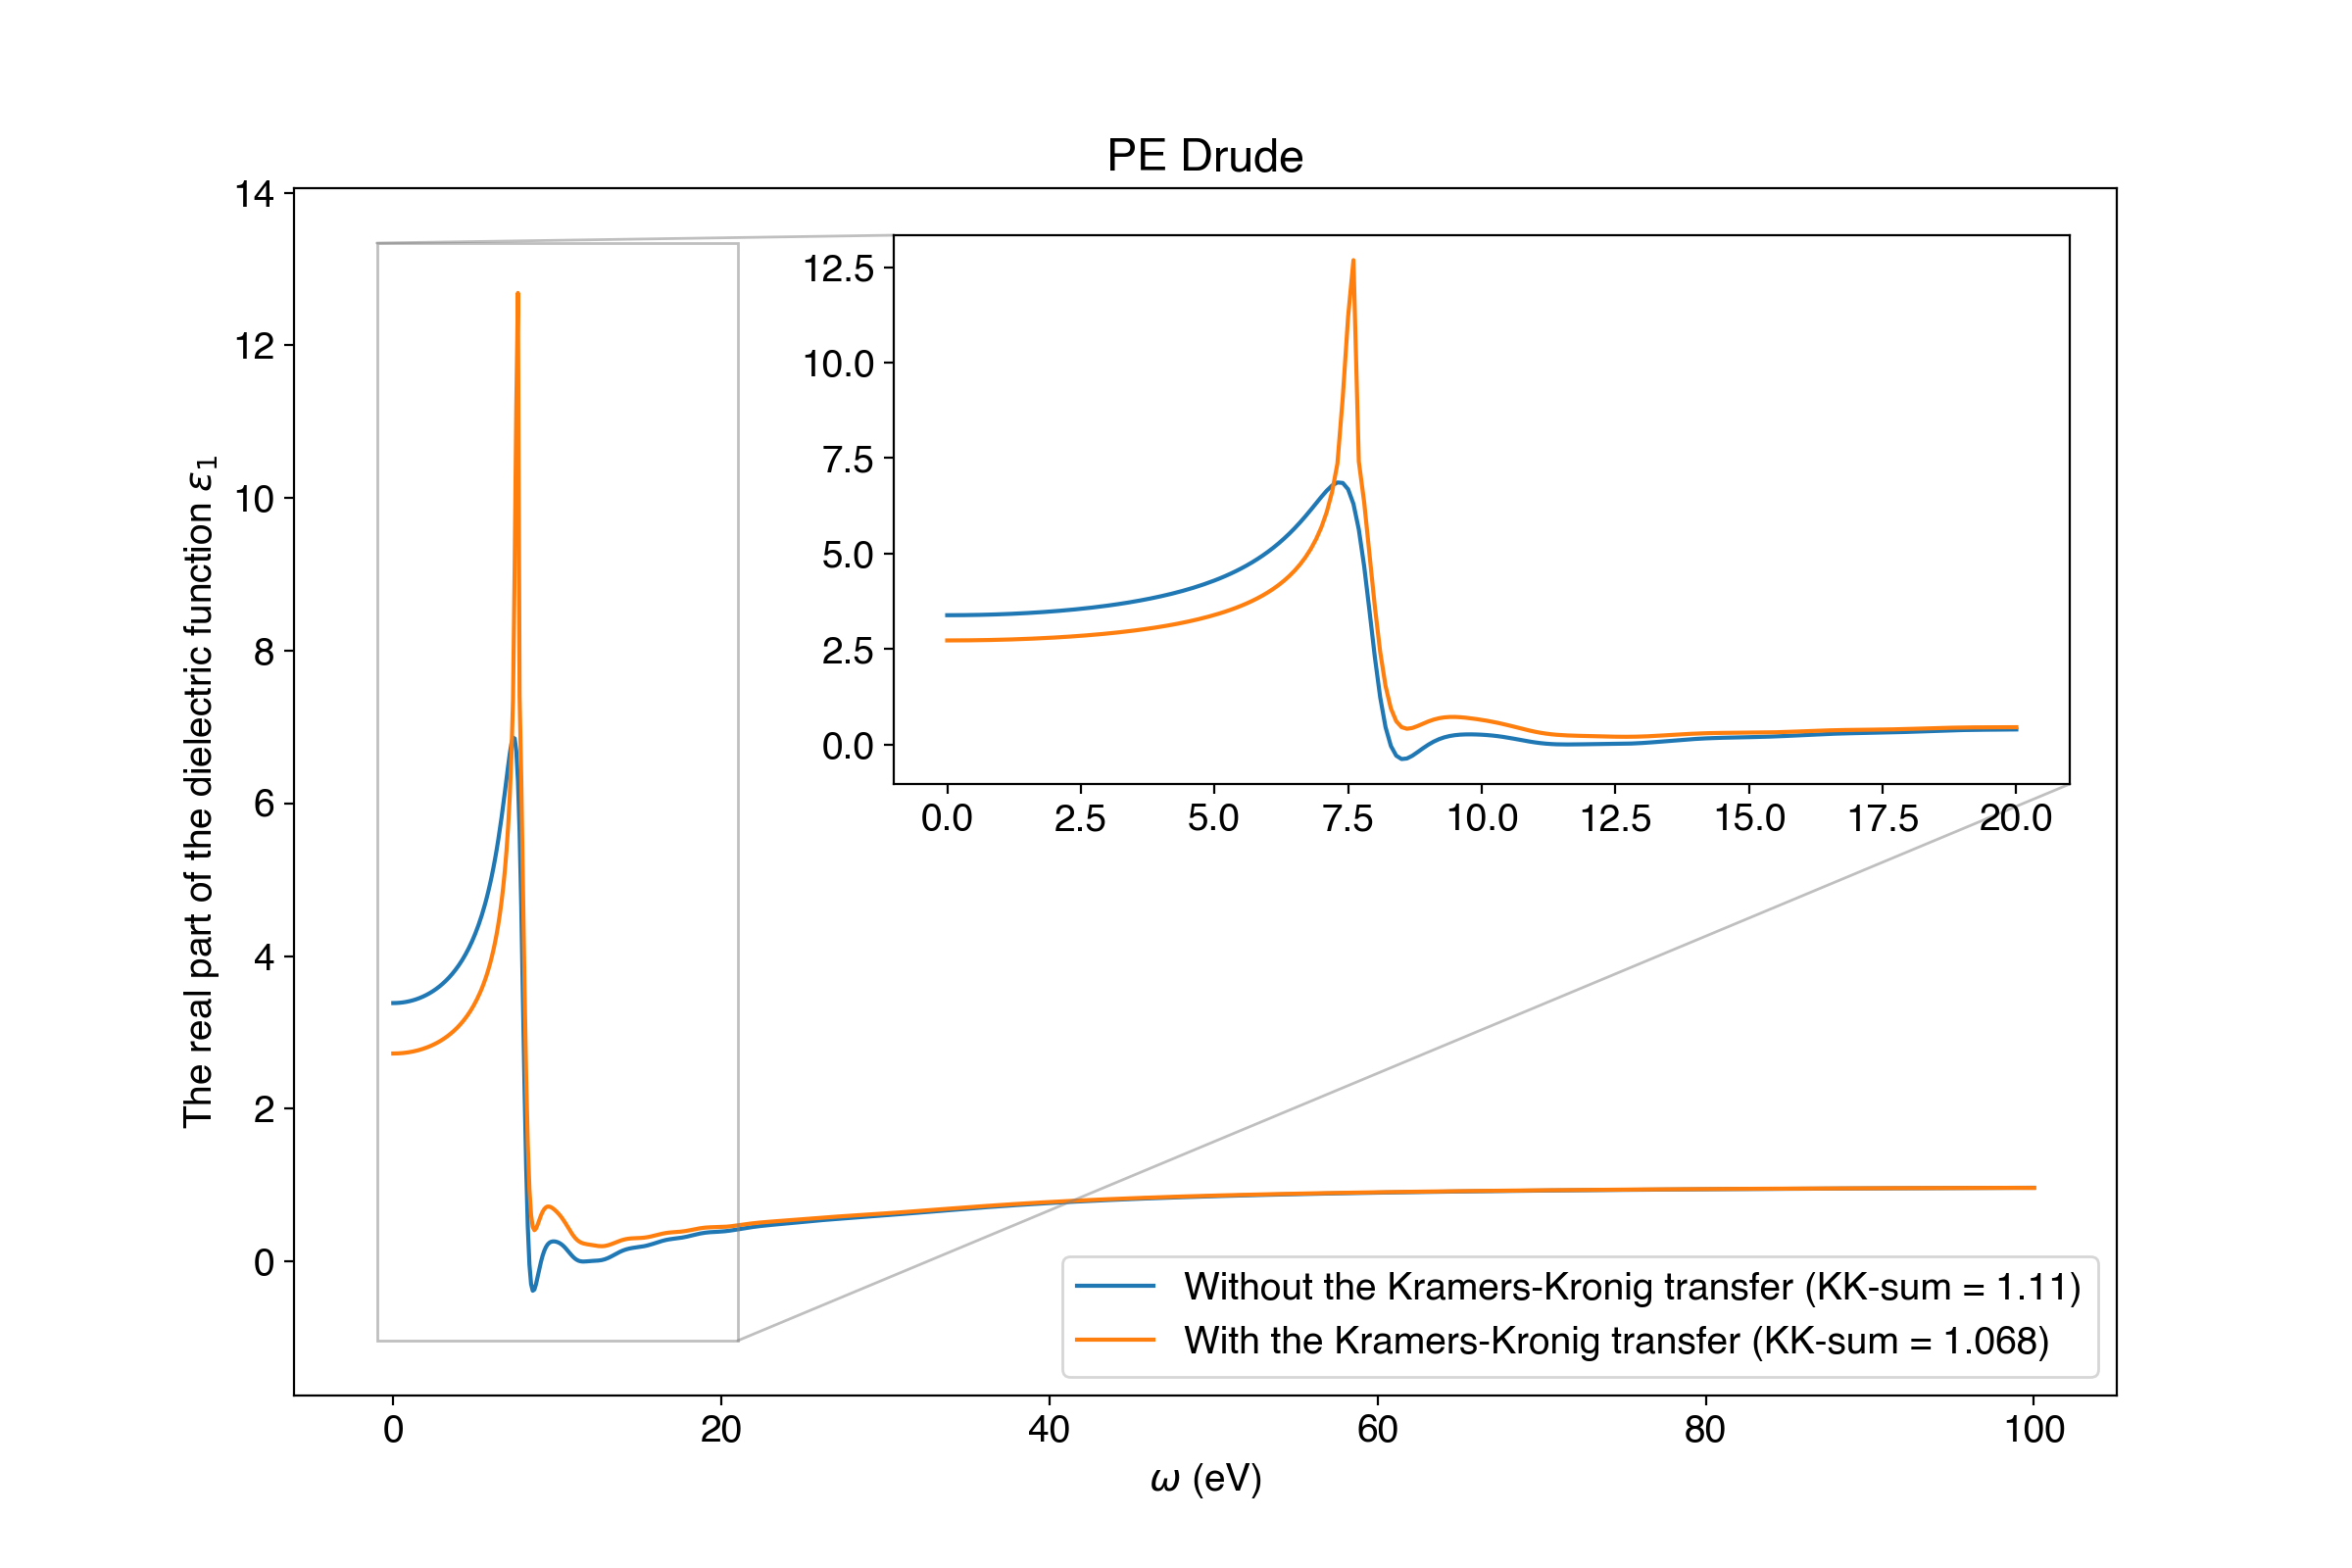

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 2.602264340738612
KKSum = 1.1099287650762355

Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
With the Kramers-Kronig transfer after the zeroing procedure:
Using the KK-transfer
FSum = 2.480269818933488
KKSum = 1.0675557427268294


In [12]:
fig, ax = plt.subplots(figsize=[12,8])

osc = pe_drude
x_limit = 20

osc.use_kk_relation = False
osc.calculateDielectricFunction()
x_zoom_no_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_no_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the Kramers-Kronig transfer (KK-sum = {round(kk_sum_no_kk, 3)})')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'With the Kramers-Kronig transfer (KK-sum = {round(kk_sum_kk, 3)})')

print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
# plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk)
axes.plot(x_zoom_kk, y_zoom_kk)
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}.png', dpi=600)

Start optimisation
FSum = 2.602605941101206
Z = 2.7
KKSum = 1.1102358914174026
A = [69.337, 32.919, 30.646, 20.166, 44.605, 24.703, 10.209, 11.989, 18.106, 18.312, 31.696, 21.003]
gamma = [1.179, 2.729, 2.841, 3.231, 12.604, 4.269, 3.42, 3.943, 6.912, 13.748, 15.056, 17.481]
omega = [7.937, 9.497, 10.777, 12.41, 14.364, 14.799, 17.222, 19.56, 22.507, 27.101, 26.482, 28.497]
osc.A = [69.337 32.919 30.646 20.166 44.605 24.703 10.209 11.989 18.106 18.312 31.696 21.003];
osc.G = [1.179 2.729 2.841 3.231 12.604 4.269 3.42 3.943 6.912 13.748 15.056 17.481];
osc.Om = [7.937 9.497 10.777 12.41 14.364 14.799 17.222 19.56 22.507 27.101 26.482 28.497];


<IPython.core.display.Javascript object>


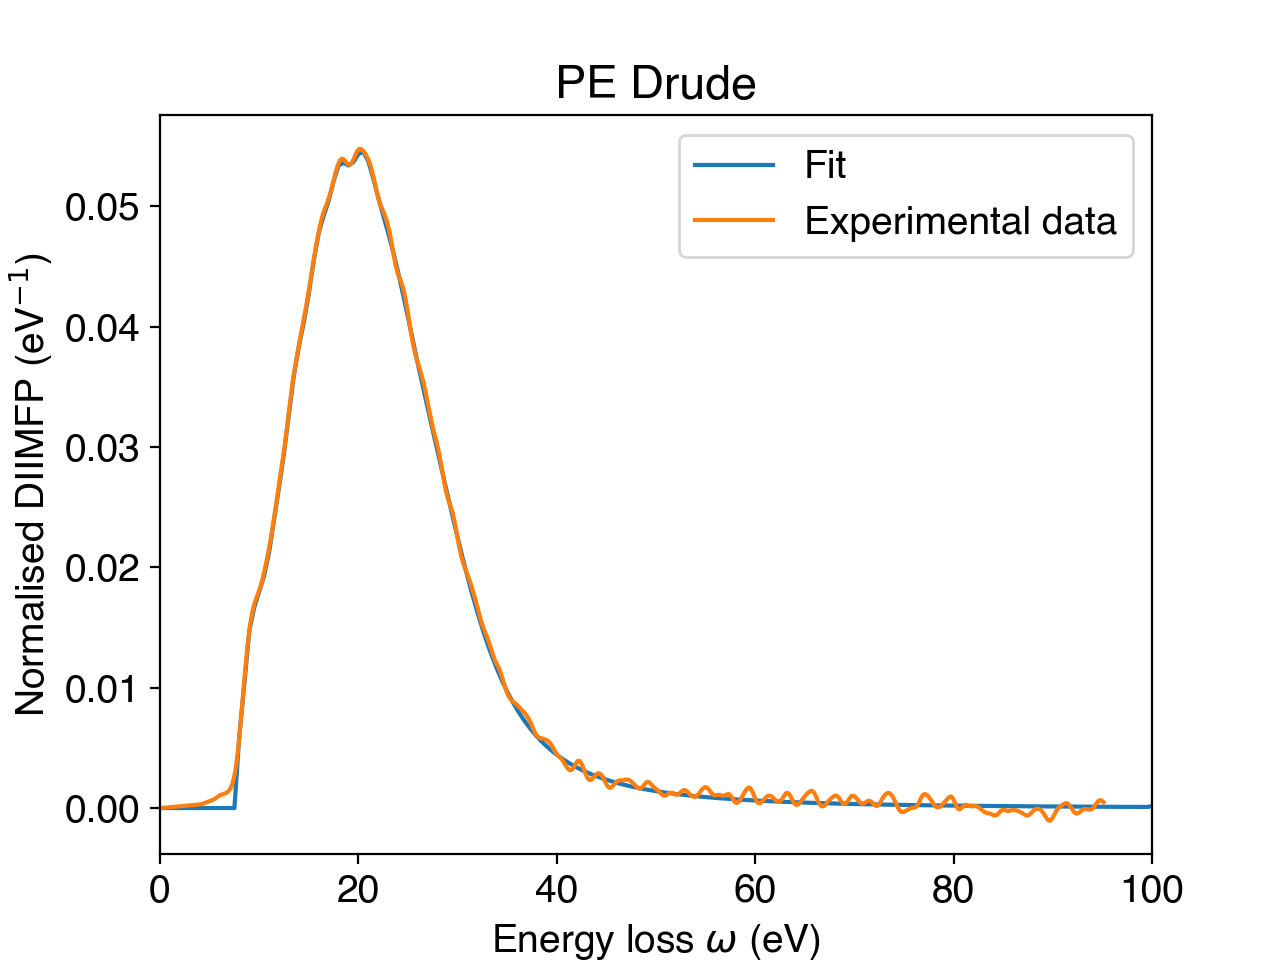

In [5]:
fd = pd.read_csv('../diimfp/pe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pe_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [155]:
A =  [0.018, 0.099, 0.124, 0.092, 0.109, 0.097, 0.077, 0.114]
gamma =  [1.62, 4.4, 4.46, 3.89, 4.43, 5.46, 7.03, 12.42]
omega = [9.79, 13.07, 15.79, 18.09, 20.57, 23.22, 26.31, 29.92]

# A = [0.131, 0.052, 0.055, 0.044, 0.018, 0.045, 0.052, 0.051, 0.033, 0.021, 0.025, 0.014, 0.012, 0.005, 0.008]
# gamma = [6.517, 4.344, 9.531, 7.108, 5.985, 4.822, 6.883, 7.198, 6.46, 24.55, 27.206, 73.652, 50.617, 77.801, 83.321]
# omega = [14.824, 17.623, 20.685, 19.691, 31.184, 20.814, 27.169, 23.638, 23.833, 24.256, 20.466, 28.388, 27.72, 33.707, 41.732]

M = (2 * 12.01 + 4 * 1.01) / (2 + 4) # Molar weight
rho = 0.94 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
# oscillators = opt.Oscillators('DLL', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pe_dl = opt.Material('PE', oscillators, composition, eloss, q, xraypath)
pe_dl.Eg = 7.5
pe_dl.width_of_the_valence_band = 6
pe_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
pe_dl.static_refractive_index = 1.519
pe_dl.electron_density = 0.2421
pe_dl.Z = 2.667
pe_dl.use_henke_for_ne = False
pe_dl.use_KK_constraint = True
pe_dl.use_KK_relation = False

fsum = pe_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pe_dl.Z))

kksum = pe_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 2.5907826542381596
Z = 2.667
KKSum = 1.1041693130578645


Start optimisation
FSum = 2.5601130059279225
Z = 2.667
KKSum = 0.9634722055234481
A = [0.015, 0.086, 0.075, 0.081, 0.083, 0.089, 0.064, 0.074]
gamma = [1.572, 4.123, 4.326, 3.814, 4.124, 5.17, 7.018, 17.203]
omega = [10.049, 14.596, 16.808, 18.741, 21.327, 24.375, 28.199, 40.576]
osc.A = [0.015 0.086 0.075 0.081 0.083 0.089 0.064 0.074];
osc.G = [1.572 4.123 4.326 3.814 4.124 5.17 7.018 17.203];
osc.Om = [10.049 14.596 16.808 18.741 21.327 24.375 28.199 40.576];


<IPython.core.display.Javascript object>


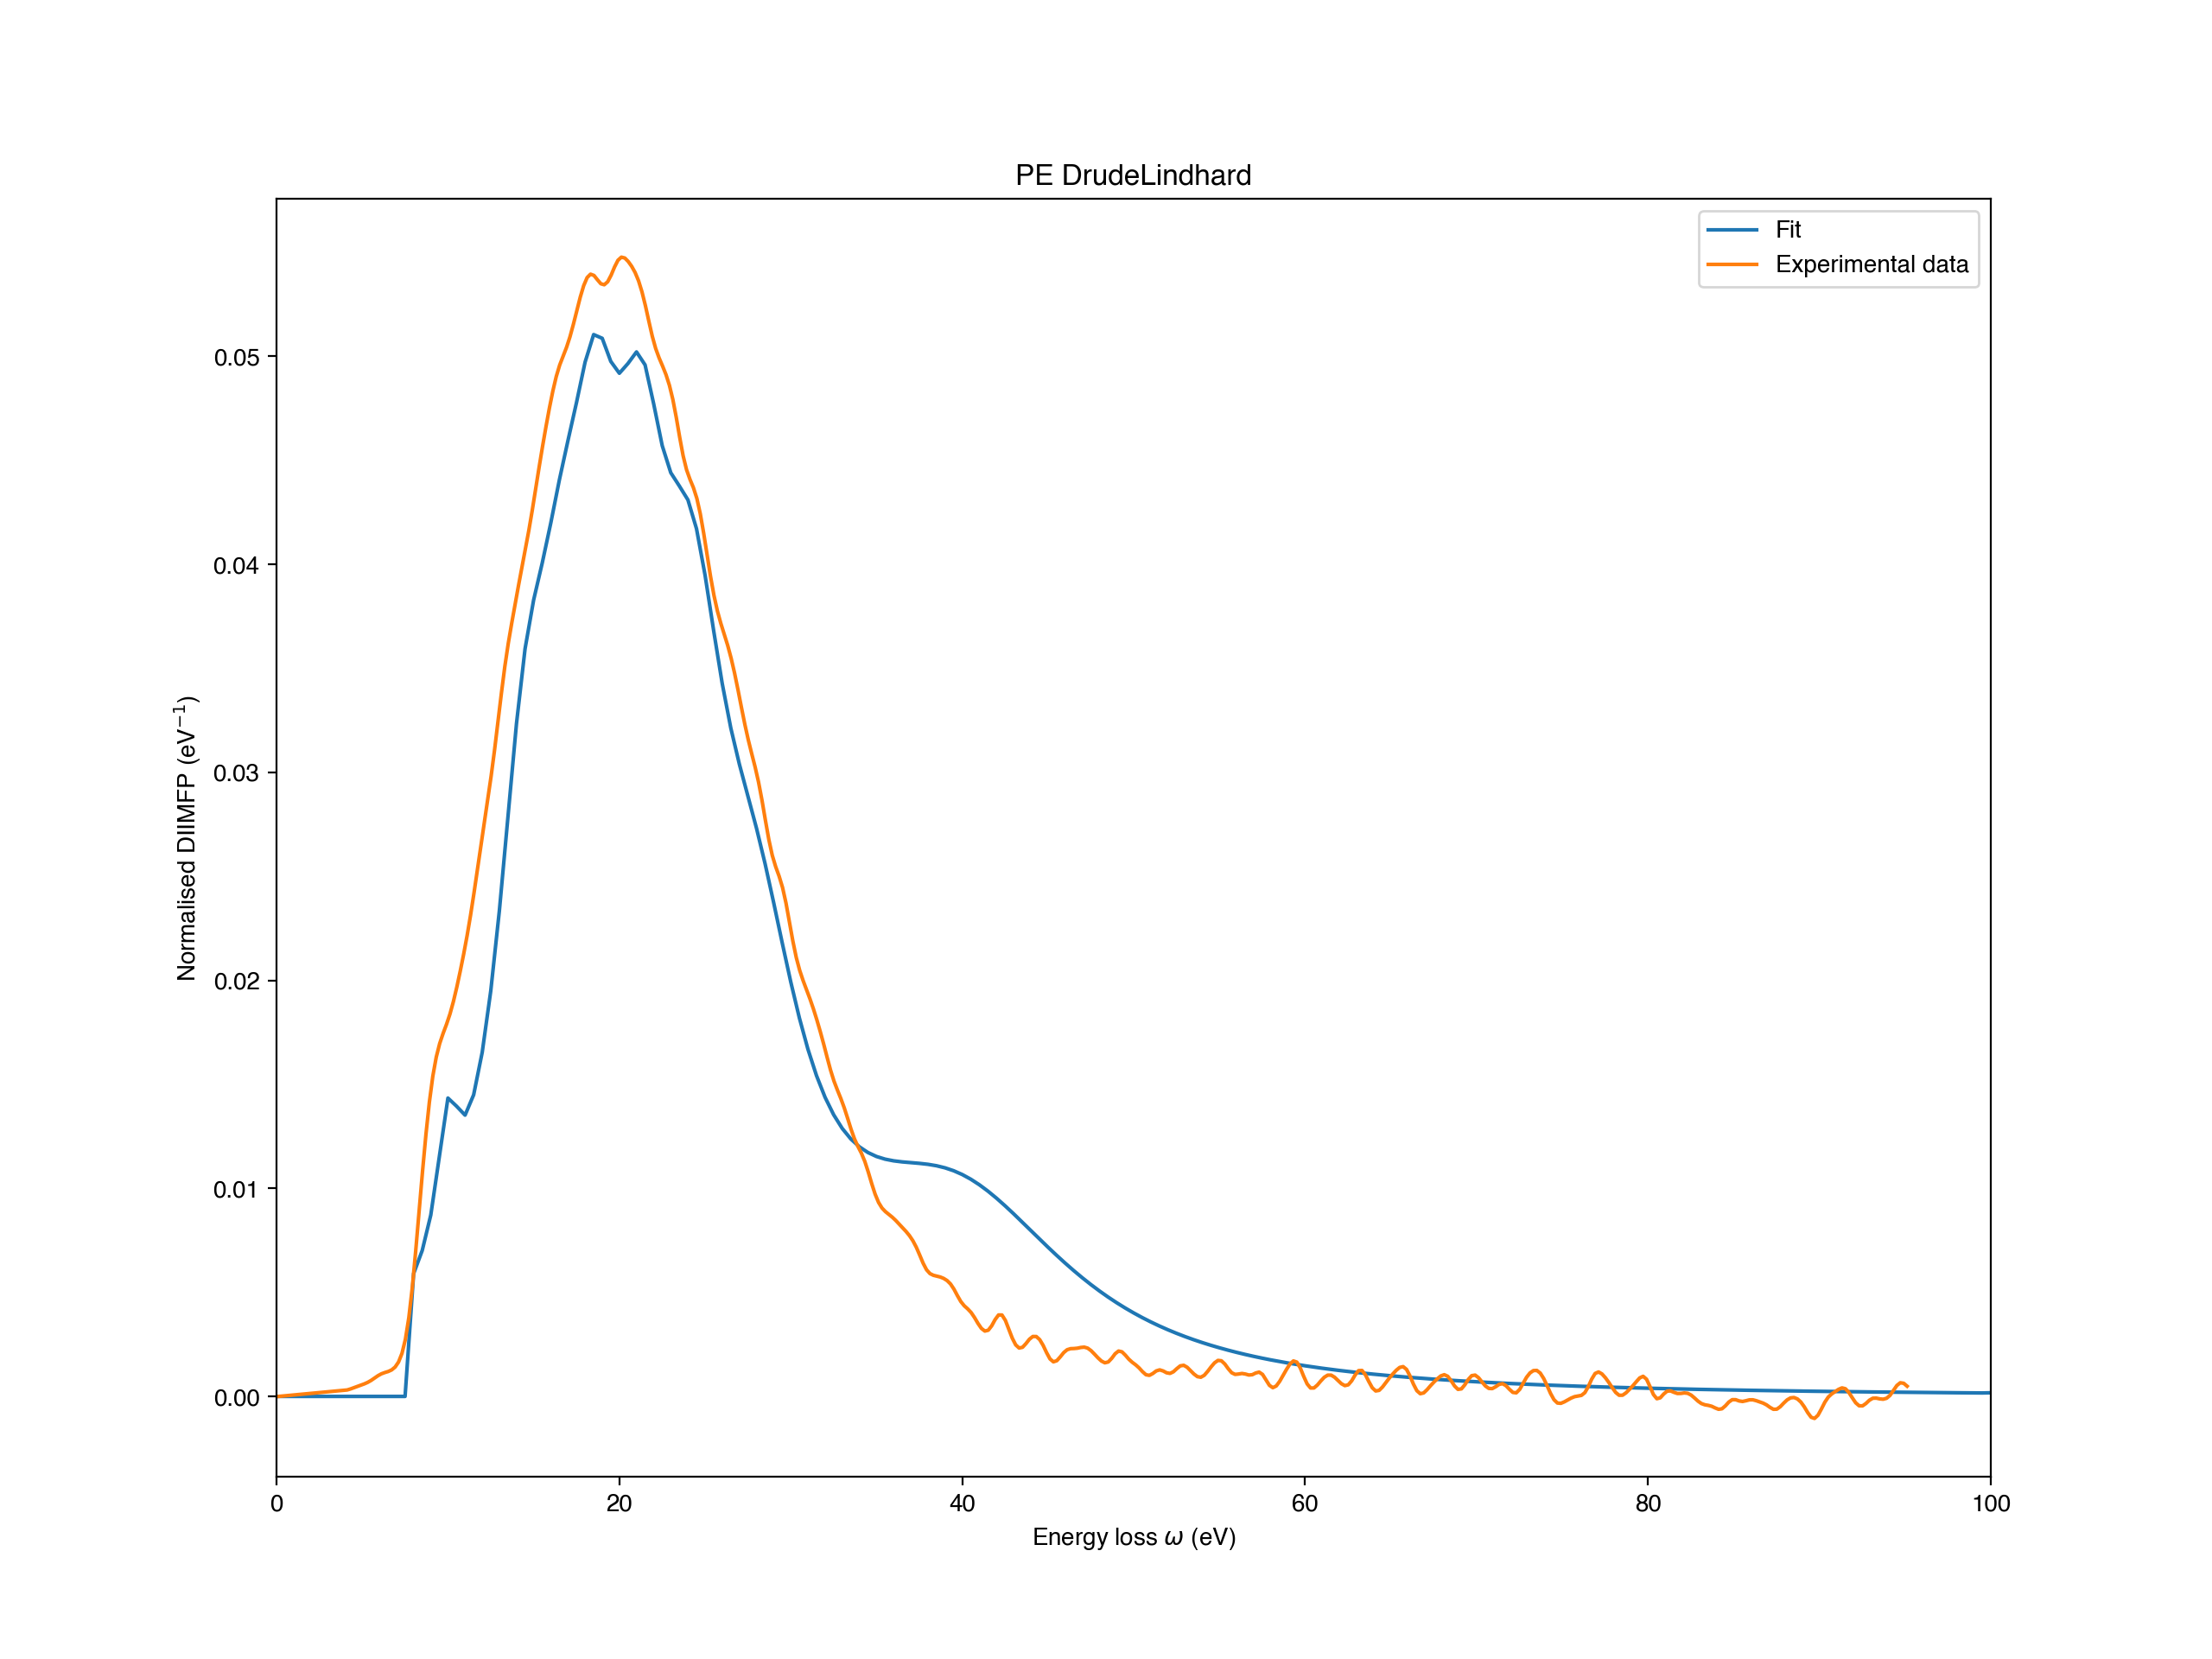

In [156]:
fd = pd.read_csv('../diimfp/pe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pe_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 500, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


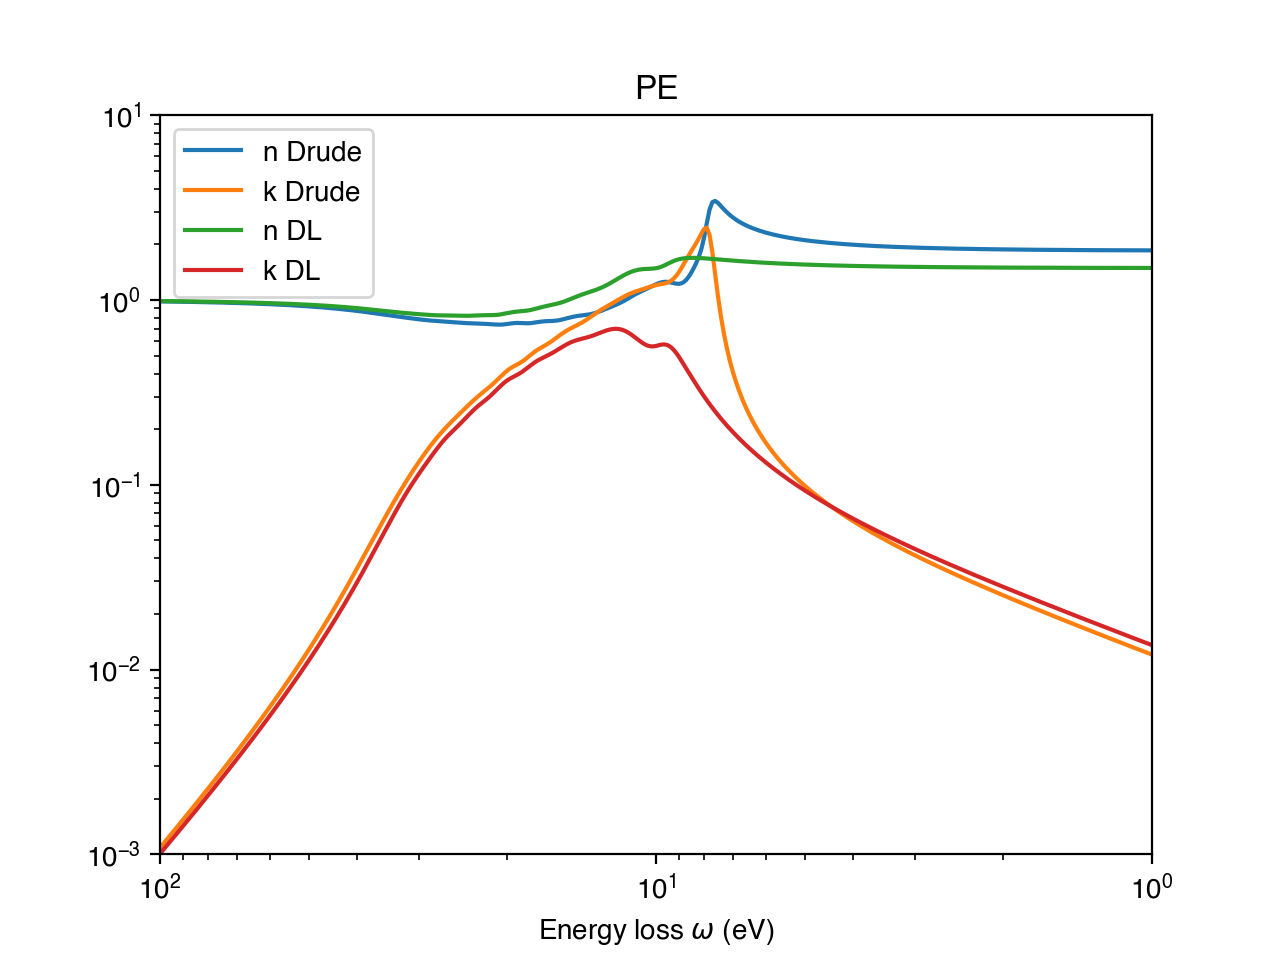

In [42]:
pe_drude.calculateOpticalConstants()

plt.figure()
plt.plot(pe_drude.eloss, pe_drude.refractive_index, label='n Drude')
plt.plot(pe_drude.eloss, pe_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{pe_drude.name}')

pe_dl.calculateOpticalConstants_()
plt.plot(pe_dl.eloss, pe_dl.refractive_index, label='n DL')
plt.plot(pe_dl.eloss, pe_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

pe_drude.writeOpticalData()

**PMMA**

In [13]:
# A = [11.9637, 25.1598, 22.138 , 26.6971, 27.7229, 29.5537, 27.6149, 23.4497, 39.2408, 28.3709, 28.4939, 22.4436, 16.7607, 19.9005, 41.9562]
# gamma = [2.1, 2.2, 2.1, 2.6, 3.1, 4.0, 5.1, 6.1, 9.3, 11.6, 15.8, 16.6, 21.2, 22.3, 41.6]
# omega = [9.3, 10.5, 11.9, 13.2, 14.6, 16.5, 18.7, 21.2, 24.2, 28.5, 32.0, 36.3, 44.6, 48.4 ,62.0]

A = [12.021, 25.461, 21.533, 26.585, 27.265, 29.353, 27.747, 23.351, 39.589, 29.038, 28.329, 22.075, 16.851, 20.602, 41.813]
gamma = [2.071, 2.167, 1.958, 2.525, 3.146, 4.094, 5.151, 6.156, 9.578, 12.06, 16.408, 16.991, 21.931, 22.4, 66.802]
omega = [9.292, 10.525, 11.88, 13.22, 14.653, 16.472, 18.69, 21.208, 24.197, 28.462, 31.982, 36.196, 45.123, 49.162, 62.138]

M = (5 * 12.01 + 2 * 15.999 + 8 * 1.01) / (5 + 2 + 8) # Molar weight
rho = 1.18 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [5,2,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pmma_drude = opt.Material('PMMA', oscillators, composition, eloss, q, xraypath)
pmma_drude.Eg = 6.7
pmma_drude.width_of_the_valence_band = 10
pmma_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
pmma_drude.static_refractive_index = 1.4813 # 1.49
pmma_drude.electron_density = 0.284
pmma_drude.Z = 3.6
pmma_drude.use_henke_for_ne = False
pmma_drude.use_KK_constraint = True
pmma_drude.use_KK_relation = False

fsum = pmma_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pmma_drude.Z))

kksum = pmma_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.4694820034222675
Z = 3.6
KKSum = 0.9852582951429509


<IPython.core.display.Javascript object>


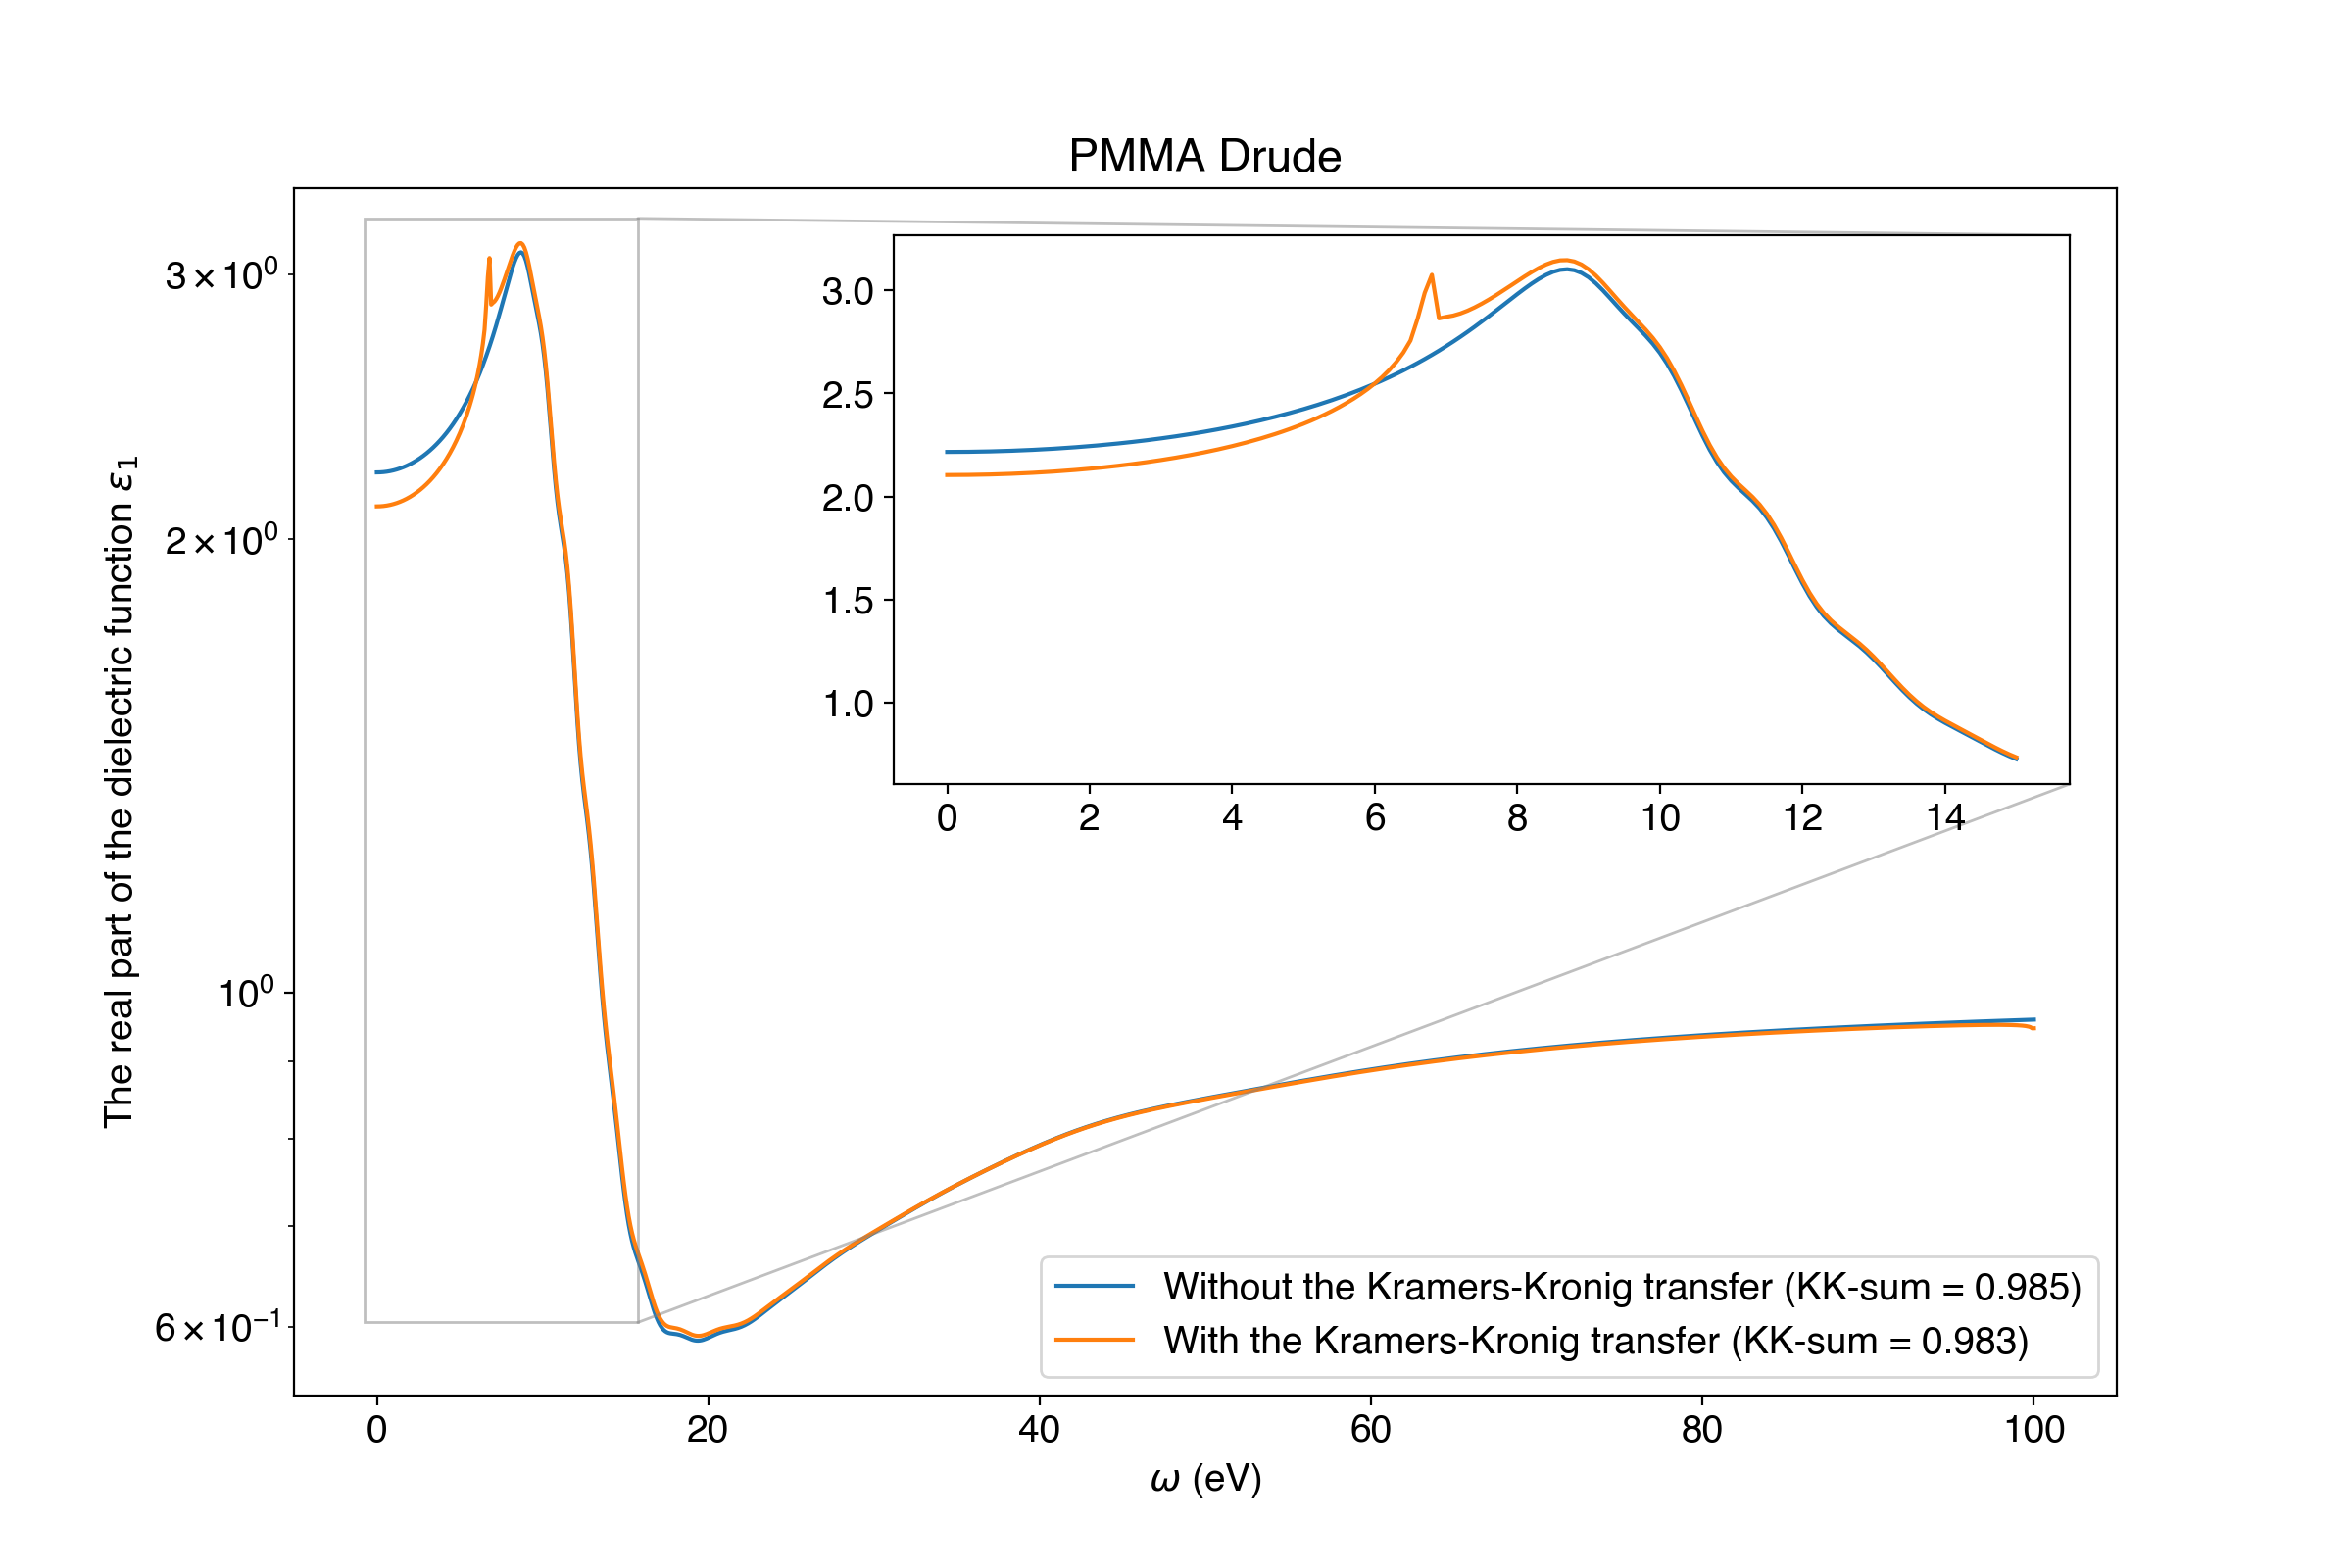

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 3.4694820034222675
KKSum = 0.9852582951429509

Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
Using the KK-transfer
With the Kramers-Kronig transfer after the zeroing procedure:
Using the KK-transfer
FSum = 3.4661303304995896
KKSum = 0.9825152659673511


In [14]:
fig, ax = plt.subplots(figsize=[12,8])

osc = pmma_drude
x_limit = 15

osc.use_kk_relation = False
osc.calculateDielectricFunction()
x_zoom_no_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_no_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the Kramers-Kronig transfer (KK-sum = {round(kk_sum_no_kk, 3)})')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'With the Kramers-Kronig transfer (KK-sum = {round(kk_sum_kk, 3)})')

print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk)
axes.plot(x_zoom_kk, y_zoom_kk)
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}.png', dpi=600)

Start optimisation
FSum = 3.4781279602385724
Z = 3.6
KKSum = 0.9862994856638017
A = [11.74, 25.829, 21.543, 26.716, 27.547, 29.623, 27.894, 23.39, 39.771, 29.094, 28.369, 22.134, 16.789, 20.63, 40.535]
gamma = [2.077, 2.143, 1.972, 2.533, 3.126, 4.06, 5.143, 6.187, 9.495, 12.021, 16.356, 16.908, 21.994, 22.365, 63.828]
omega = [9.279, 10.512, 11.871, 13.19, 14.629, 16.471, 18.729, 21.231, 24.233, 28.622, 32.018, 36.599, 45.089, 50.381, 61.125]
osc.A = [11.74 25.829 21.543 26.716 27.547 29.623 27.894 23.39 39.771 29.094 28.369 22.134 16.789 20.63 40.535];
osc.G = [2.077 2.143 1.972 2.533 3.126 4.06 5.143 6.187 9.495 12.021 16.356 16.908 21.994 22.365 63.828];
osc.Om = [9.279 10.512 11.871 13.19 14.629 16.471 18.729 21.231 24.233 28.622 32.018 36.599 45.089 50.381 61.125];


<IPython.core.display.Javascript object>


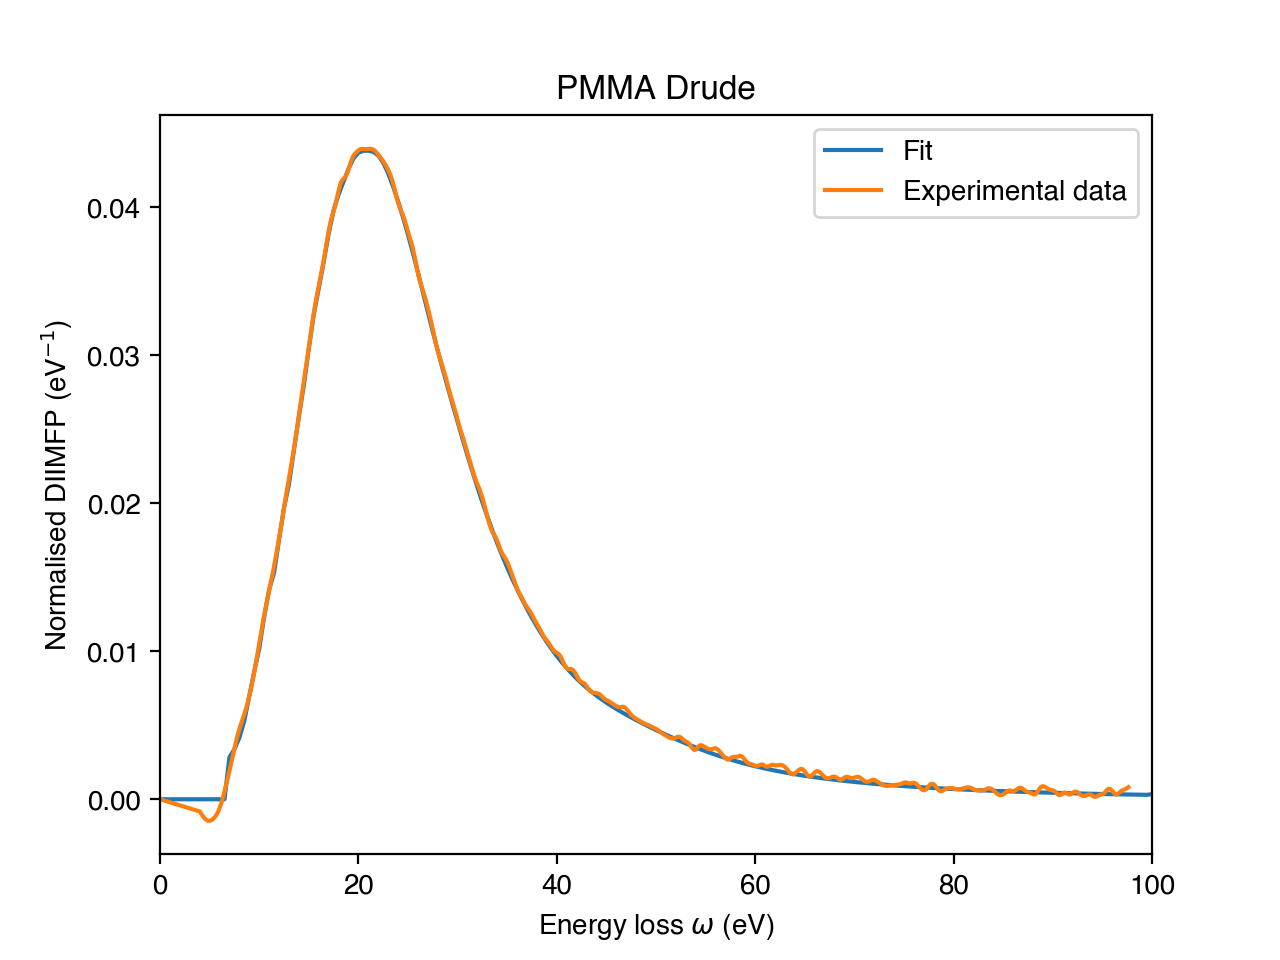

In [78]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pmma_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 10000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [91]:
# A =  [0.0499, 0.0249, 0.0333, 0.0705, 0.0798, 0.0789, 0.0761, 0.0583, 0.0163, 0.0556]
# gamma =  [3.1866, 2.2187, 2.6918, 4.4238, 5.4260, 7.4259, 11.3708, 3.5890, 100, 25.1106]
# omega = [16.0247, 12.1569, 14.1559, 20.4000, 23.1250, 26.5685, 31.2690 18.1200, 58.5387, 40.5198]

# A = [0.033, 0.064, 0.07, 0.078, 0.068, 0.093, 0.066, 0.035, 0.032, 0.026]
# gamma = [3.28, 3.91, 3.88, 4.3, 4.62, 6.42, 7.78, 9.28, 16.86, 31.86]
# omega = [12.02, 14.91, 17.36, 19.79, 22.34, 25.34, 29.37, 34.14, 40.95, 53.47]

A = [0.094, 0.042, 0.042, 0.029, 0.037, 0.032, 0.034, 0.037, 0.033, 0.055, 0.047, 0.023, 0.017, 0.008, 0.013]
gamma = [5.855, 4.091, 7.176, 5.072, 9.022, 5.08, 7.14, 5.477, 7.132, 14.109, 12.628, 47.225, 23.749, 55.838, 59.807]
omega = [14.972, 17.561, 20.342, 19.438, 27.982, 20.724, 25.678, 22.859, 23.902, 28.639, 33.216, 42.247, 43.785, 46.215, 53.172]

M = (5 * 12.01 + 2 * 15.999 + 8 * 1.01) / (5 + 2 + 8) # Molar weight
rho = 1.18 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [5,2,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pmma_dl = opt.Material('PMMA', oscillators, composition, eloss, q, xraypath)
pmma_dl.Eg = 6.7
pmma_dl.width_of_the_valence_band = 10
pmma_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
pmma_dl.static_refractive_index = 1.4813
pmma_dl.electron_density = 0.284
pmma_dl.Z = 3.6
pmma_dl.use_henke_for_ne = False
pmma_dl.use_KK_constraint = True
pmma_dl.use_KK_relation = False

fsum = pmma_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pmma_dl.Z))

kksum = pmma_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.3574686710094865
Z = 3.6
KKSum = 0.9565865436214613


Start optimisation
FSum = 3.3722478668509797
Z = 3.6
KKSum = 0.9591707696111127
A = [0.094, 0.042, 0.042, 0.029, 0.037, 0.032, 0.034, 0.037, 0.033, 0.055, 0.047, 0.023, 0.017, 0.008, 0.013]
gamma = [5.855, 4.091, 7.176, 5.072, 9.022, 5.08, 7.14, 5.477, 7.132, 14.109, 12.628, 47.225, 23.749, 55.838, 59.807]
omega = [14.972, 17.561, 20.342, 19.438, 27.982, 20.724, 25.678, 22.859, 23.902, 28.639, 33.216, 42.247, 43.785, 46.215, 53.172]
osc.A = [0.094 0.042 0.042 0.029 0.037 0.032 0.034 0.037 0.033 0.055 0.047 0.023 0.017 0.008 0.013];
osc.G = [5.855 4.091 7.176 5.072 9.022 5.08 7.14 5.477 7.132 14.109 12.628 47.225 23.749 55.838 59.807];
osc.Om = [14.972 17.561 20.342 19.438 27.982 20.724 25.678 22.859 23.902 28.639 33.216 42.247 43.785 46.215 53.172];


<IPython.core.display.Javascript object>


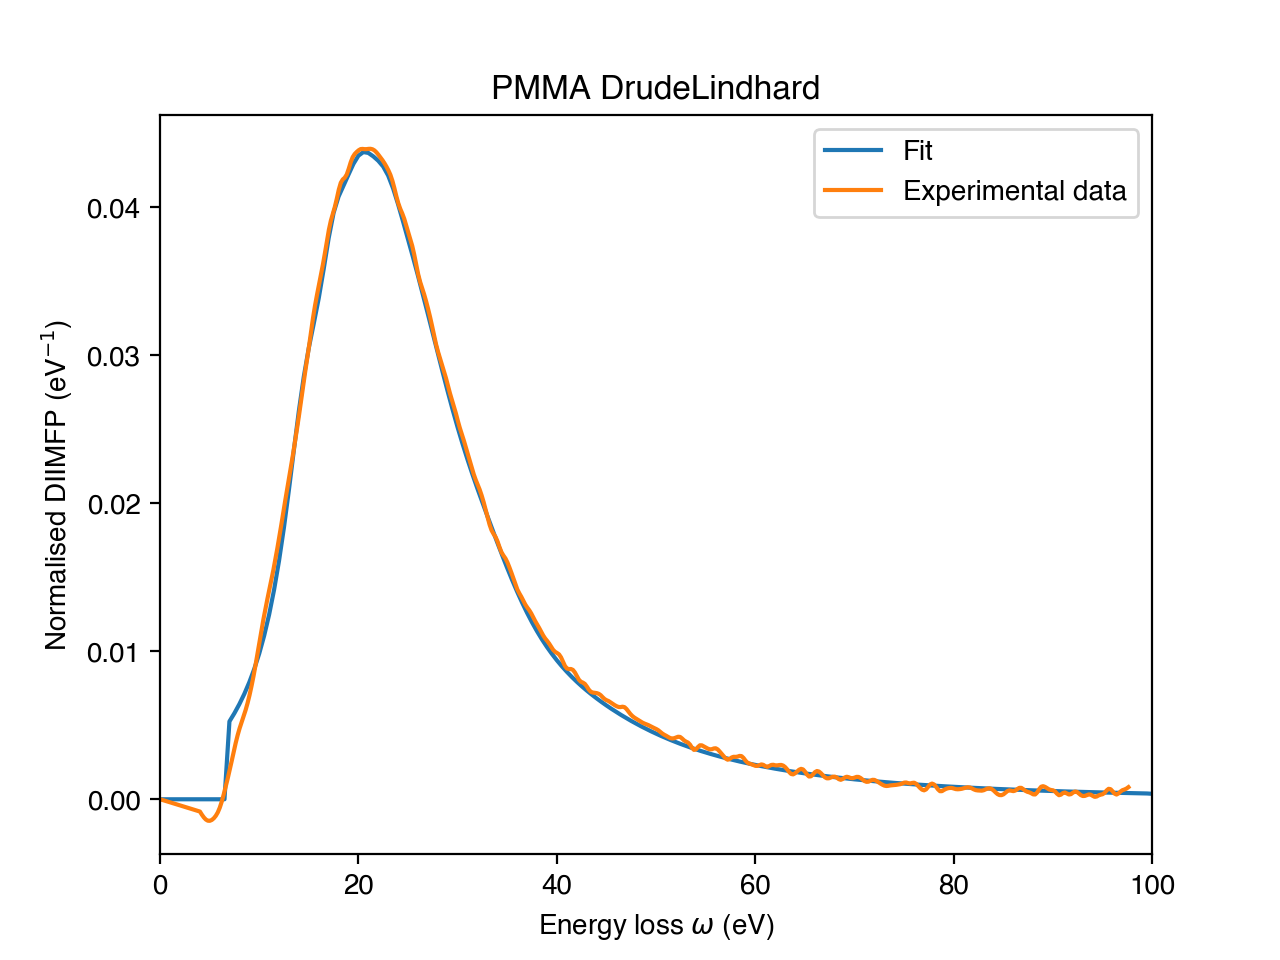

In [92]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(pmma_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


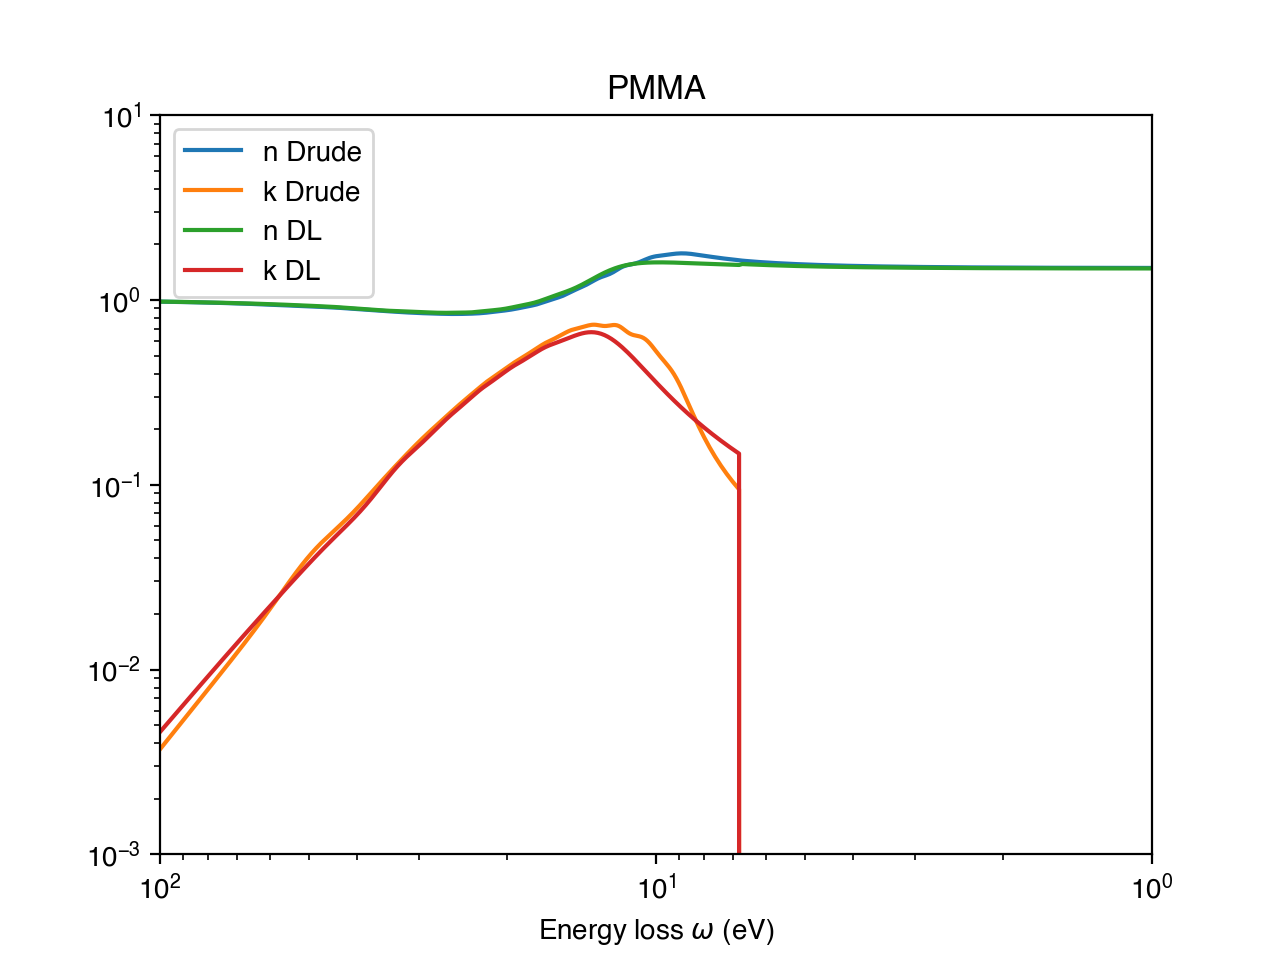

In [93]:
pmma_drude.calculateOpticalConstants()

plt.figure()
plt.plot(pmma_drude.eloss, pmma_drude.refractive_index, label='n Drude')
plt.plot(pmma_drude.eloss, pmma_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{pmma_drude.name}')

pmma_dl.calculateOpticalConstants_()
plt.plot(pmma_dl.eloss, pmma_dl.refractive_index, label='n DL')
plt.plot(pmma_dl.eloss, pmma_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

pmma_drude.writeOpticalData()

**PS**

In [6]:
# A = [61.94, 6.89,32.36,34.78,31.78,40.3,36.12,27.7,22.66,18.23,12.48,9.55]
# gamma = [0.5,0.5,5.2,2.7,3,3.8,4.5,5.2,5.4,5.3,4.8,4.7]
# omega = [5.7,8.9,9.6,9.8,11.8,14.2,17.1,20.3,23.6,27.1,30.6,34.4]

# with zeroing no kk
# A = [47.417, 5.353, 13.258, 25.616, 34.017, 31.045, 45.014, 36.093, 31.099, 25.239, 17.96, 13.877, 7.705]
# gamma = [0.452, 1.974, 1.411, 4.621, 2.929, 3.203, 4.24, 4.83, 5.895, 6.141, 5.574, 5.383, 4.852]
# omega = [5.7, 9.901, 9.071, 10.443, 9.91, 11.86, 14.219, 17.055, 20.356, 23.882, 27.544, 31.432, 35.45]

# with zeroing with kk
A = [46.954, 4.784, 14.282, 24.284, 34.724, 31.074, 47.631, 34.487, 31.323, 25.561, 18.04, 13.161, 7.388]
gamma = [0.431, 2.038, 1.165, 4.724, 3.056, 3.332, 4.586, 4.996, 6.149, 6.413, 5.796, 5.446, 4.808]
omega = [5.7, 10.711, 9.067, 10.523, 9.873, 11.893, 14.268, 17.062, 20.327, 23.873, 27.565, 31.413, 35.339]

M = (8 * 12.01 + 8 * 1.01) / (8 + 8) # Molar weight
rho = 1.05 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [8,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ps_drude = opt.Material('PS', oscillators, composition, eloss, q, xraypath)
ps_drude.Eg = 5.7
ps_drude.width_of_the_valence_band = 10
ps_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
ps_drude.static_refractive_index = 1.5892 # 1.5537 # 1.5717
ps_drude.electron_density = 0.242
ps_drude.Z = 3.5
ps_drude.use_henke_for_ne = False
ps_drude.use_KK_constraint = False
ps_drude.use_KK_relation = True

fsum = ps_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ps_drude.Z))

kksum = ps_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.4681399954406373
Z = 3.5
KKSum = 1.1301239584358767


<IPython.core.display.Javascript object>


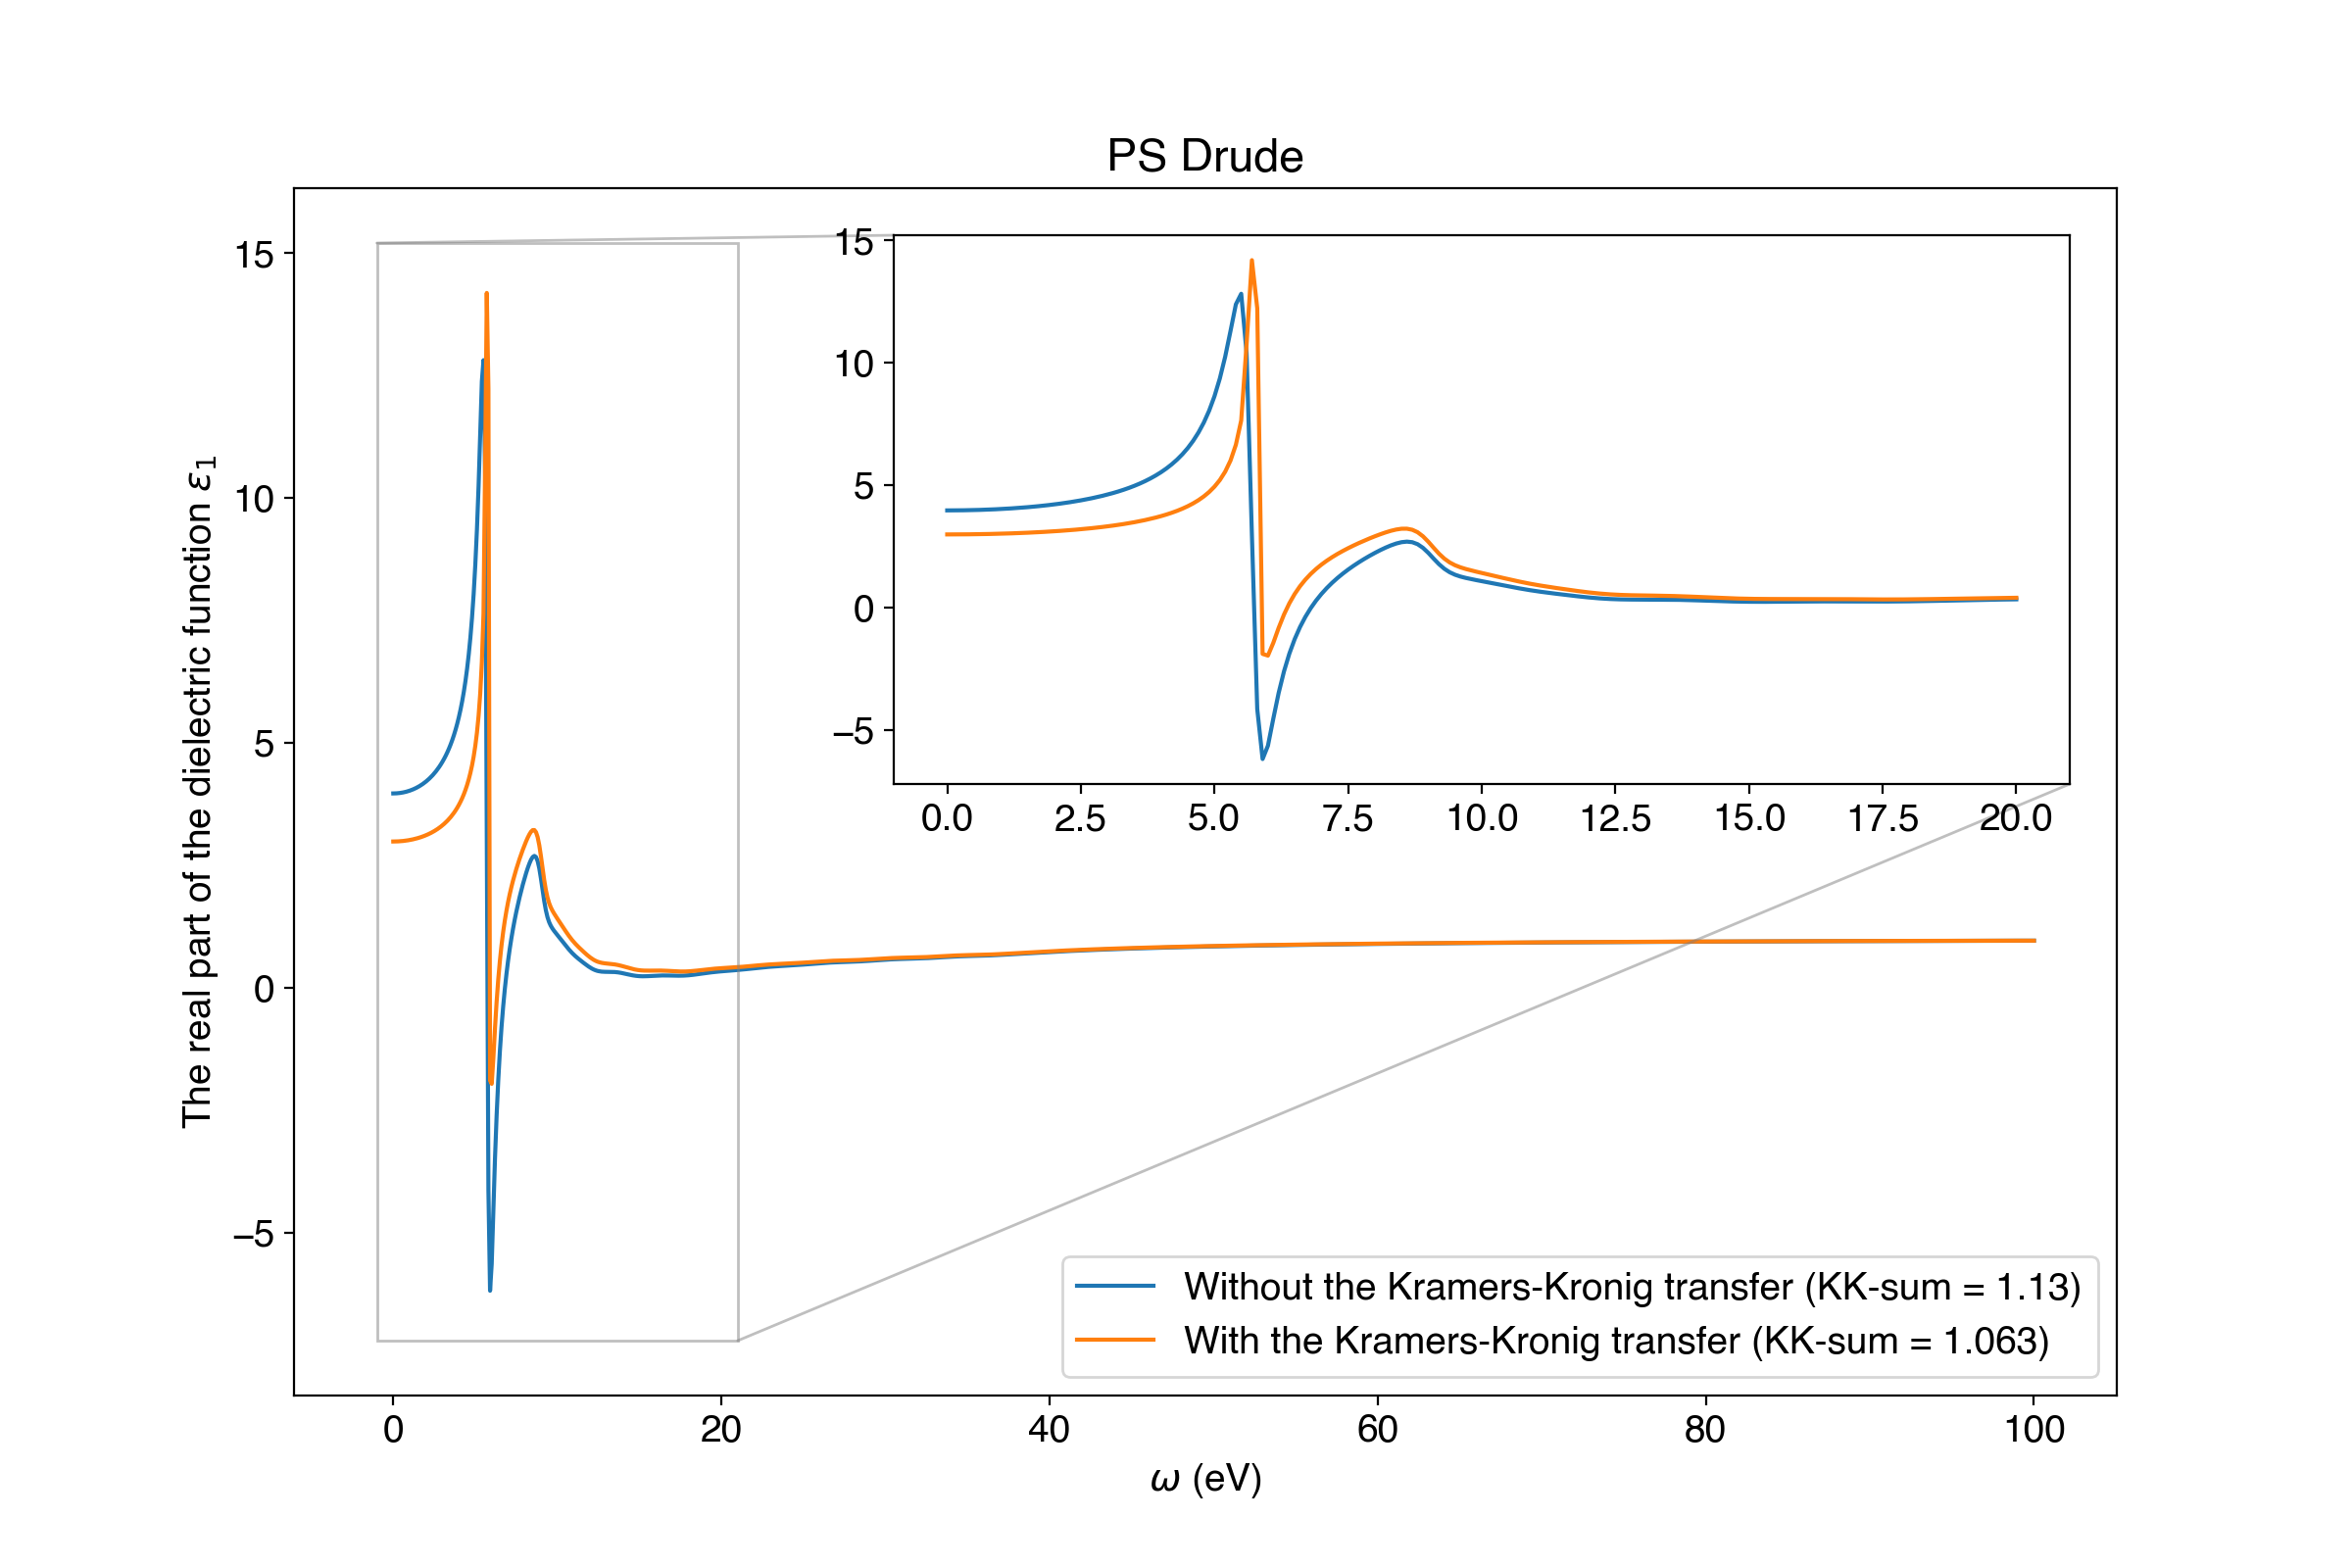

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 3.4681399954406373
KKSum = 1.1301239584358767

With the Kramers-Kronig transfer after the zeroing procedure:
FSum = 3.2923550151350924
KKSum = 1.0633121706272912


In [8]:
fig, ax = plt.subplots(figsize=[12,8])

osc = ps_drude
x_limit = 20

osc.use_kk_relation = False
osc.calculateDielectricFunction()
x_zoom_no_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_no_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the Kramers-Kronig transfer (KK-sum = {round(kk_sum_no_kk, 3)})')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'With the Kramers-Kronig transfer (KK-sum = {round(kk_sum_kk, 3)})')

print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc='lower right')
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
# plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk)
axes.plot(x_zoom_kk, y_zoom_kk)
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}.png', dpi=600)

In [9]:
fd = pd.read_csv('../diimfp/ps_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ps_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 10000, xtol_rel = 1e-20)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

Start optimisation


KeyboardInterrupt: 

In [137]:
A =  [0.0595, 0.0109, 0.0118, 0.0439, 0.1157, 0.0859, 0.0760, 0.0191, 0.0904, 0.0500, 0.0285, 0.005]
gamma =  [0.8766, 1.3500, 2.1377, 3.5174, 4.8311, 4.8859, 4.7143, 4.5001, 4.6727, 4.5861, 4.4314, 4.0]
omega = [6.9127, 9.7587, 10.8557, 12.7739, 18.9939, 15.7646, 24.1189, 33.3917, 21.5138, 27.1145, 29.9836, 37.0]

# A = [0.068, 0.011, 0.012, 0.04, 0.118, 0.09, 0.074, 0.017, 0.085, 0.048, 0.027]
# gamma = [0.844, 1.281, 2.305, 3.088, 4.932, 5.407, 4.33, 4.241, 4.442, 4.159, 4.194]
# omega = [6.869, 9.772, 10.865, 12.859, 18.906, 15.984, 24.107, 33.035, 21.516, 27.042, 29.909]

M = (8 * 12.01 + 8 * 1.01) / (8 + 8) # Molar weight
rho = 1.05 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [8,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ps_dl = opt.Material('PS', oscillators, composition, eloss, q, xraypath)
ps_dl.Eg = 5.7
ps_dl.width_of_the_valence_band = 10
ps_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
ps_dl.static_refractive_index = 1.5717
ps_dl.electron_density = 0.242
ps_dl.Z = 3.5
ps_dl.use_henke_for_ne = False
ps_dl.use_KK_constraint = False
ps_dl.use_KK_relation = False

fsum = ps_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ps_dl.Z))

kksum = ps_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 2.866445705546018
Z = 3.5
KKSum = 0.9673905227409831


Start optimisation
FSum = 2.8092611340719644
Z = 3.5
KKSum = 0.9656420159917066
A = [0.068, 0.011, 0.012, 0.04, 0.119, 0.091, 0.076, 0.017, 0.086, 0.048, 0.027]
gamma = [0.824, 1.211, 2.219, 3.144, 4.924, 5.243, 4.409, 4.223, 4.366, 4.194, 4.157]
omega = [6.864, 9.777, 10.958, 12.883, 18.968, 15.986, 24.283, 33.882, 21.6, 27.284, 30.362]
osc.A = [0.068 0.011 0.012 0.04 0.119 0.091 0.076 0.017 0.086 0.048 0.027];
osc.G = [0.824 1.211 2.219 3.144 4.924 5.243 4.409 4.223 4.366 4.194 4.157];
osc.Om = [6.864 9.777 10.958 12.883 18.968 15.986 24.283 33.882 21.6 27.284 30.362];


<IPython.core.display.Javascript object>


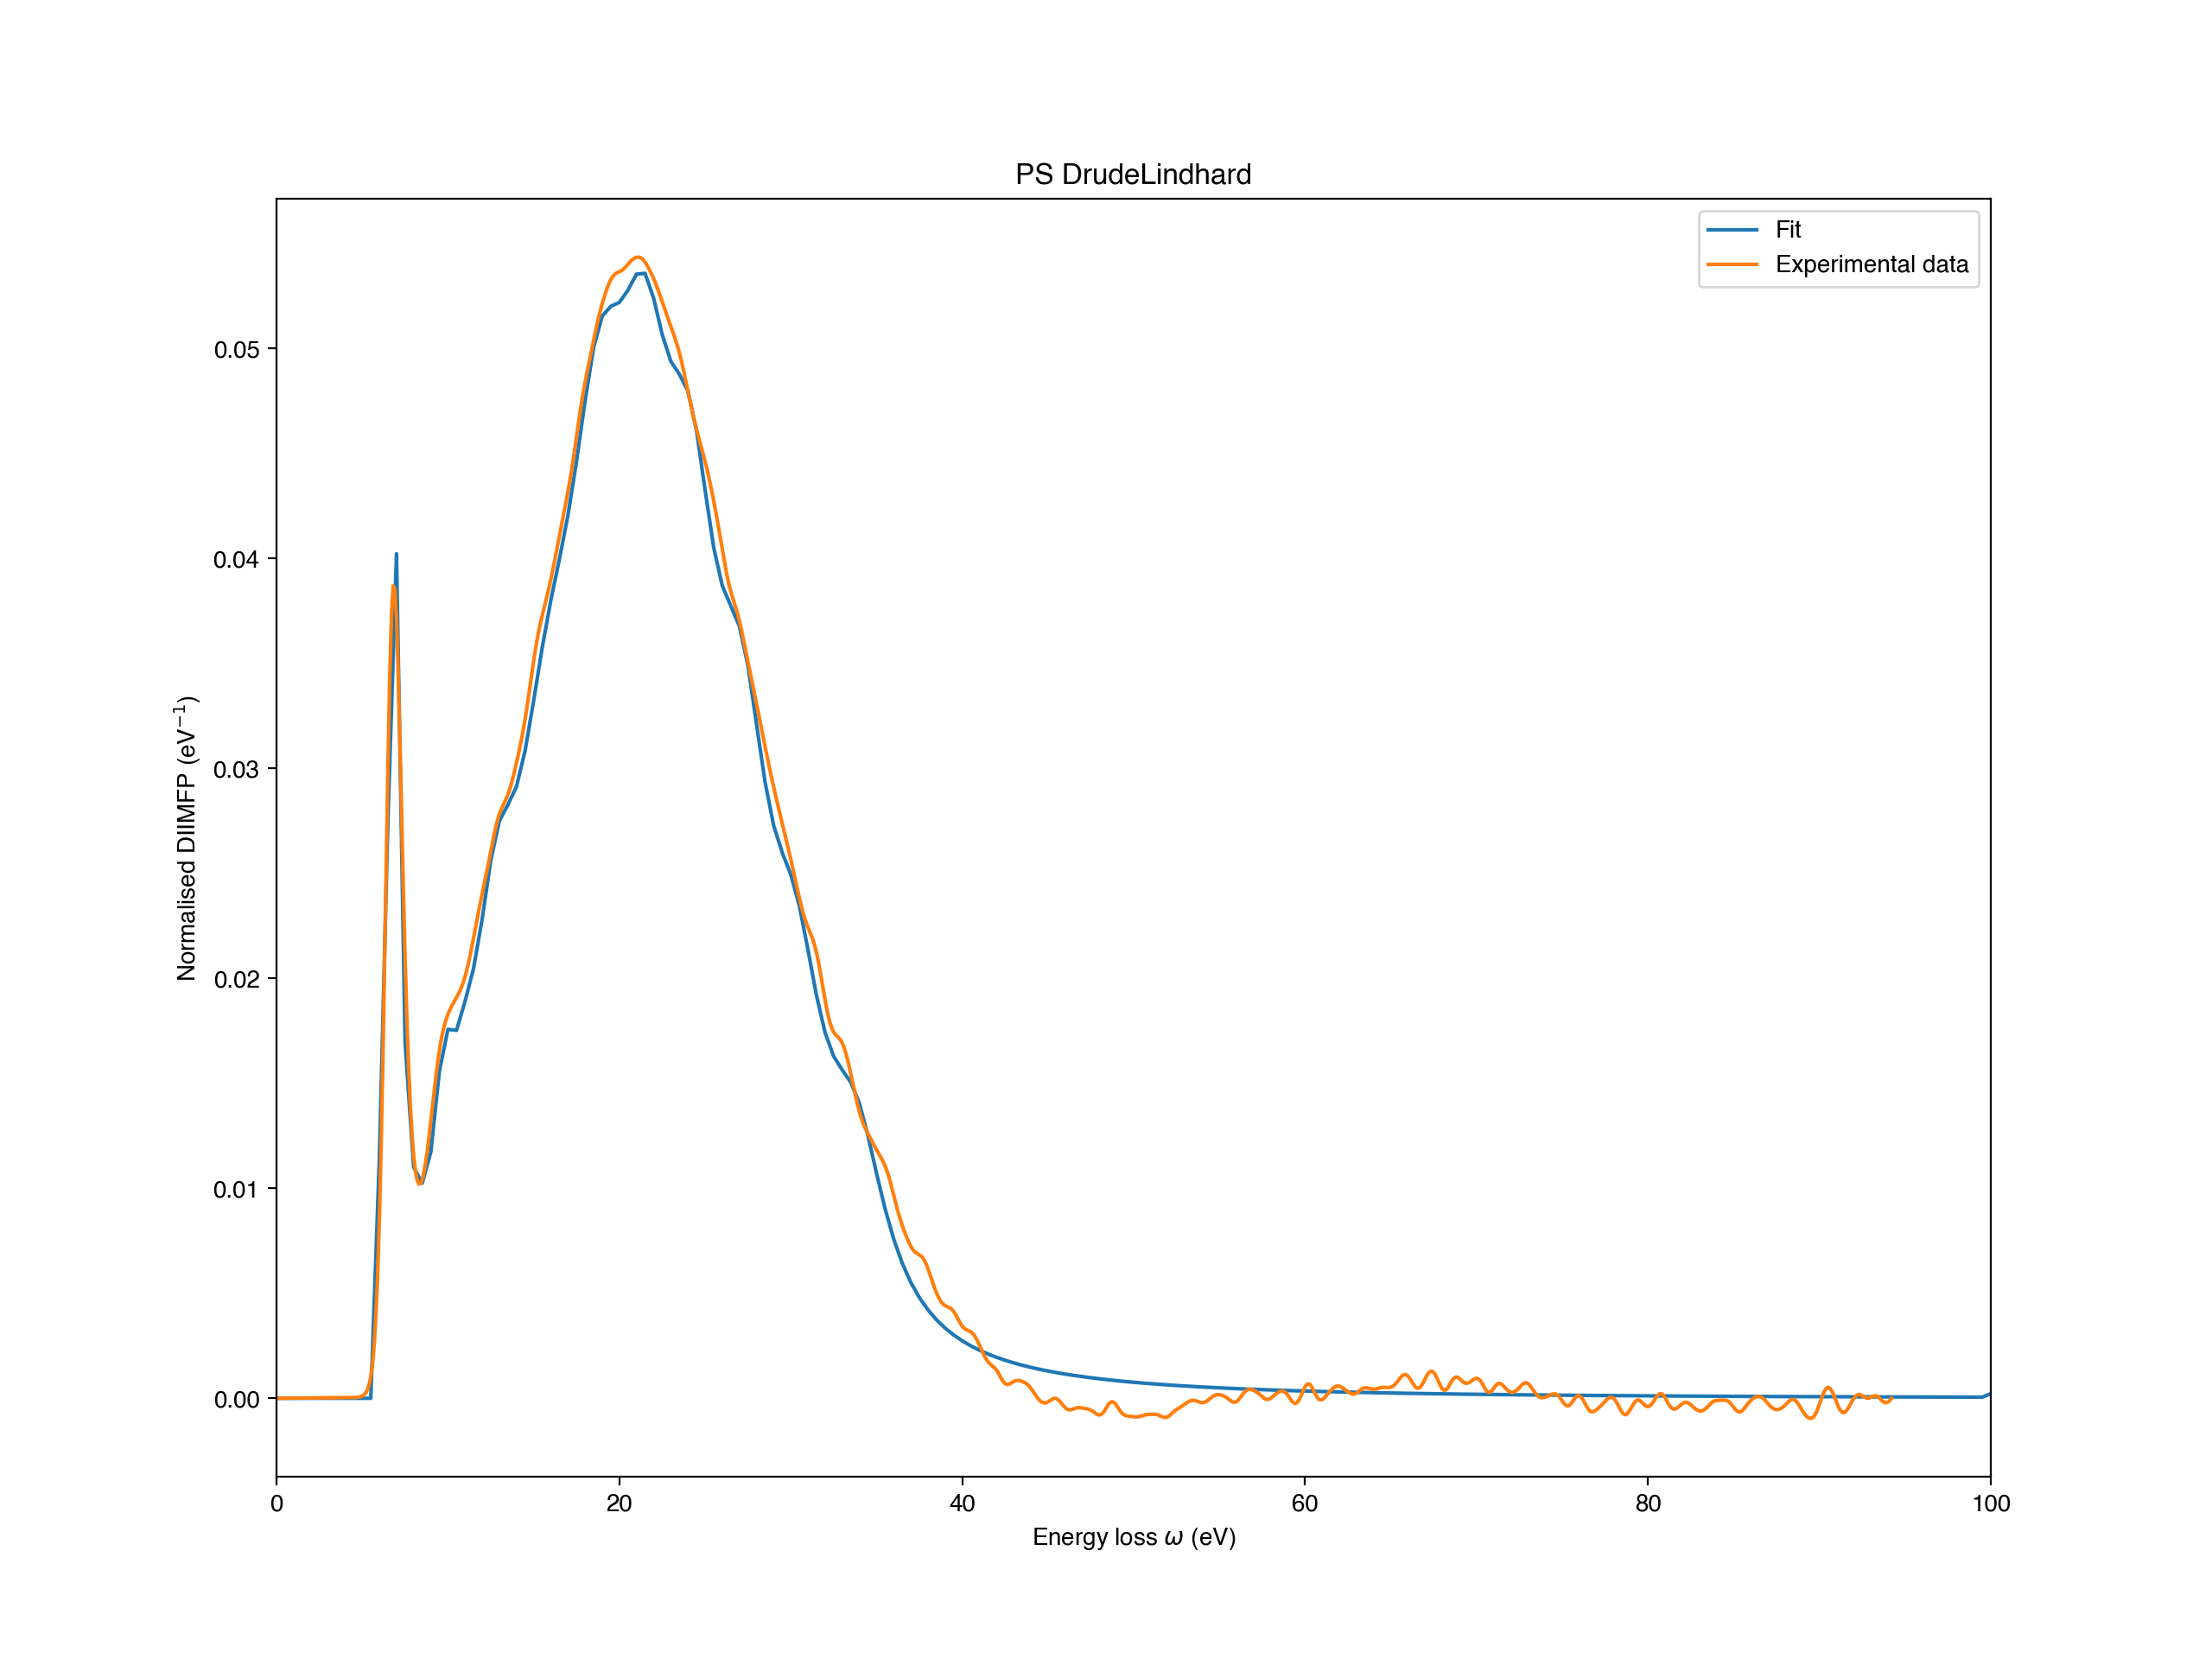

In [128]:
fd = pd.read_csv('../diimfp/ps_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ps_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


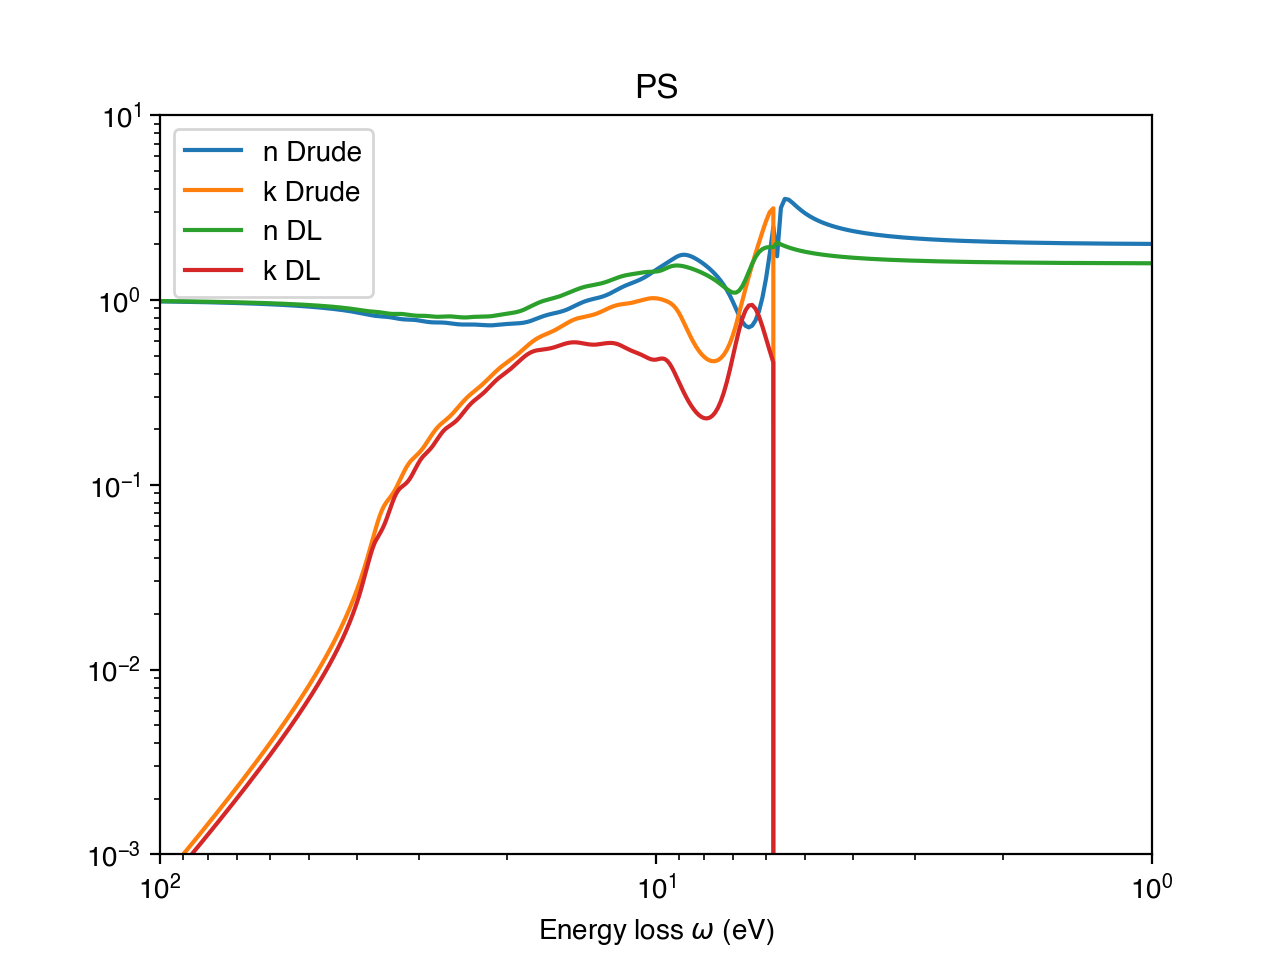

In [138]:
ps_drude.calculateOpticalConstants()

plt.figure()
plt.plot(ps_drude.eloss, ps_drude.refractive_index, label='n Drude')
plt.plot(ps_drude.eloss, ps_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{ps_drude.name}')

ps_dl.calculateOpticalConstants_()
plt.plot(ps_dl.eloss, ps_dl.refractive_index, label='n DL')
plt.plot(ps_dl.eloss, ps_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

ps_drude.writeOpticalData()

**PTFE**

In [69]:
# A = [0.93,3.87,39.19,15.06,38.65,92.64,105,185]
# gamma = [0.4,1.04,3.27,4.6,5.28,11.81,21.96,41.3]
# omega = [7.94,12.38,15.57,19.54,20.42,26.11,36.96,52.95]

A = [1.317, 7.787, 62.25, 17.646, 37.006, 106.325, 108.572, 307.175]
gamma = [0.359, 0.982, 3.212, 3.356, 4.339, 11.277, 21.518, 48.386]
omega = [7.954, 12.245, 15.22, 20.582, 19.151, 25.308, 35.722, 52.066]

M = (2 * 12.01 + 4 * 18.998) / (2 + 4) # Molar weight
rho = 2.17 # g/cm3

oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_drude = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_drude.Eg = 7.2
ptfe_drude.width_of_the_valence_band = 5.5
ptfe_drude.atomic_density = rho * opt.N_Avogadro / M *1e-24
ptfe_drude.static_refractive_index = 1.39
ptfe_drude.electron_density = 0.47
ptfe_drude.Z = 8
ptfe_drude.use_henke_for_ne = False
ptfe_drude.use_KK_constraint = True
ptfe_drude.use_KK_relation = False

fsum = ptfe_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ptfe_drude.Z))

kksum = ptfe_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 7.839975659621193
Z = 8
KKSum = 0.9613507771760946


<IPython.core.display.Javascript object>


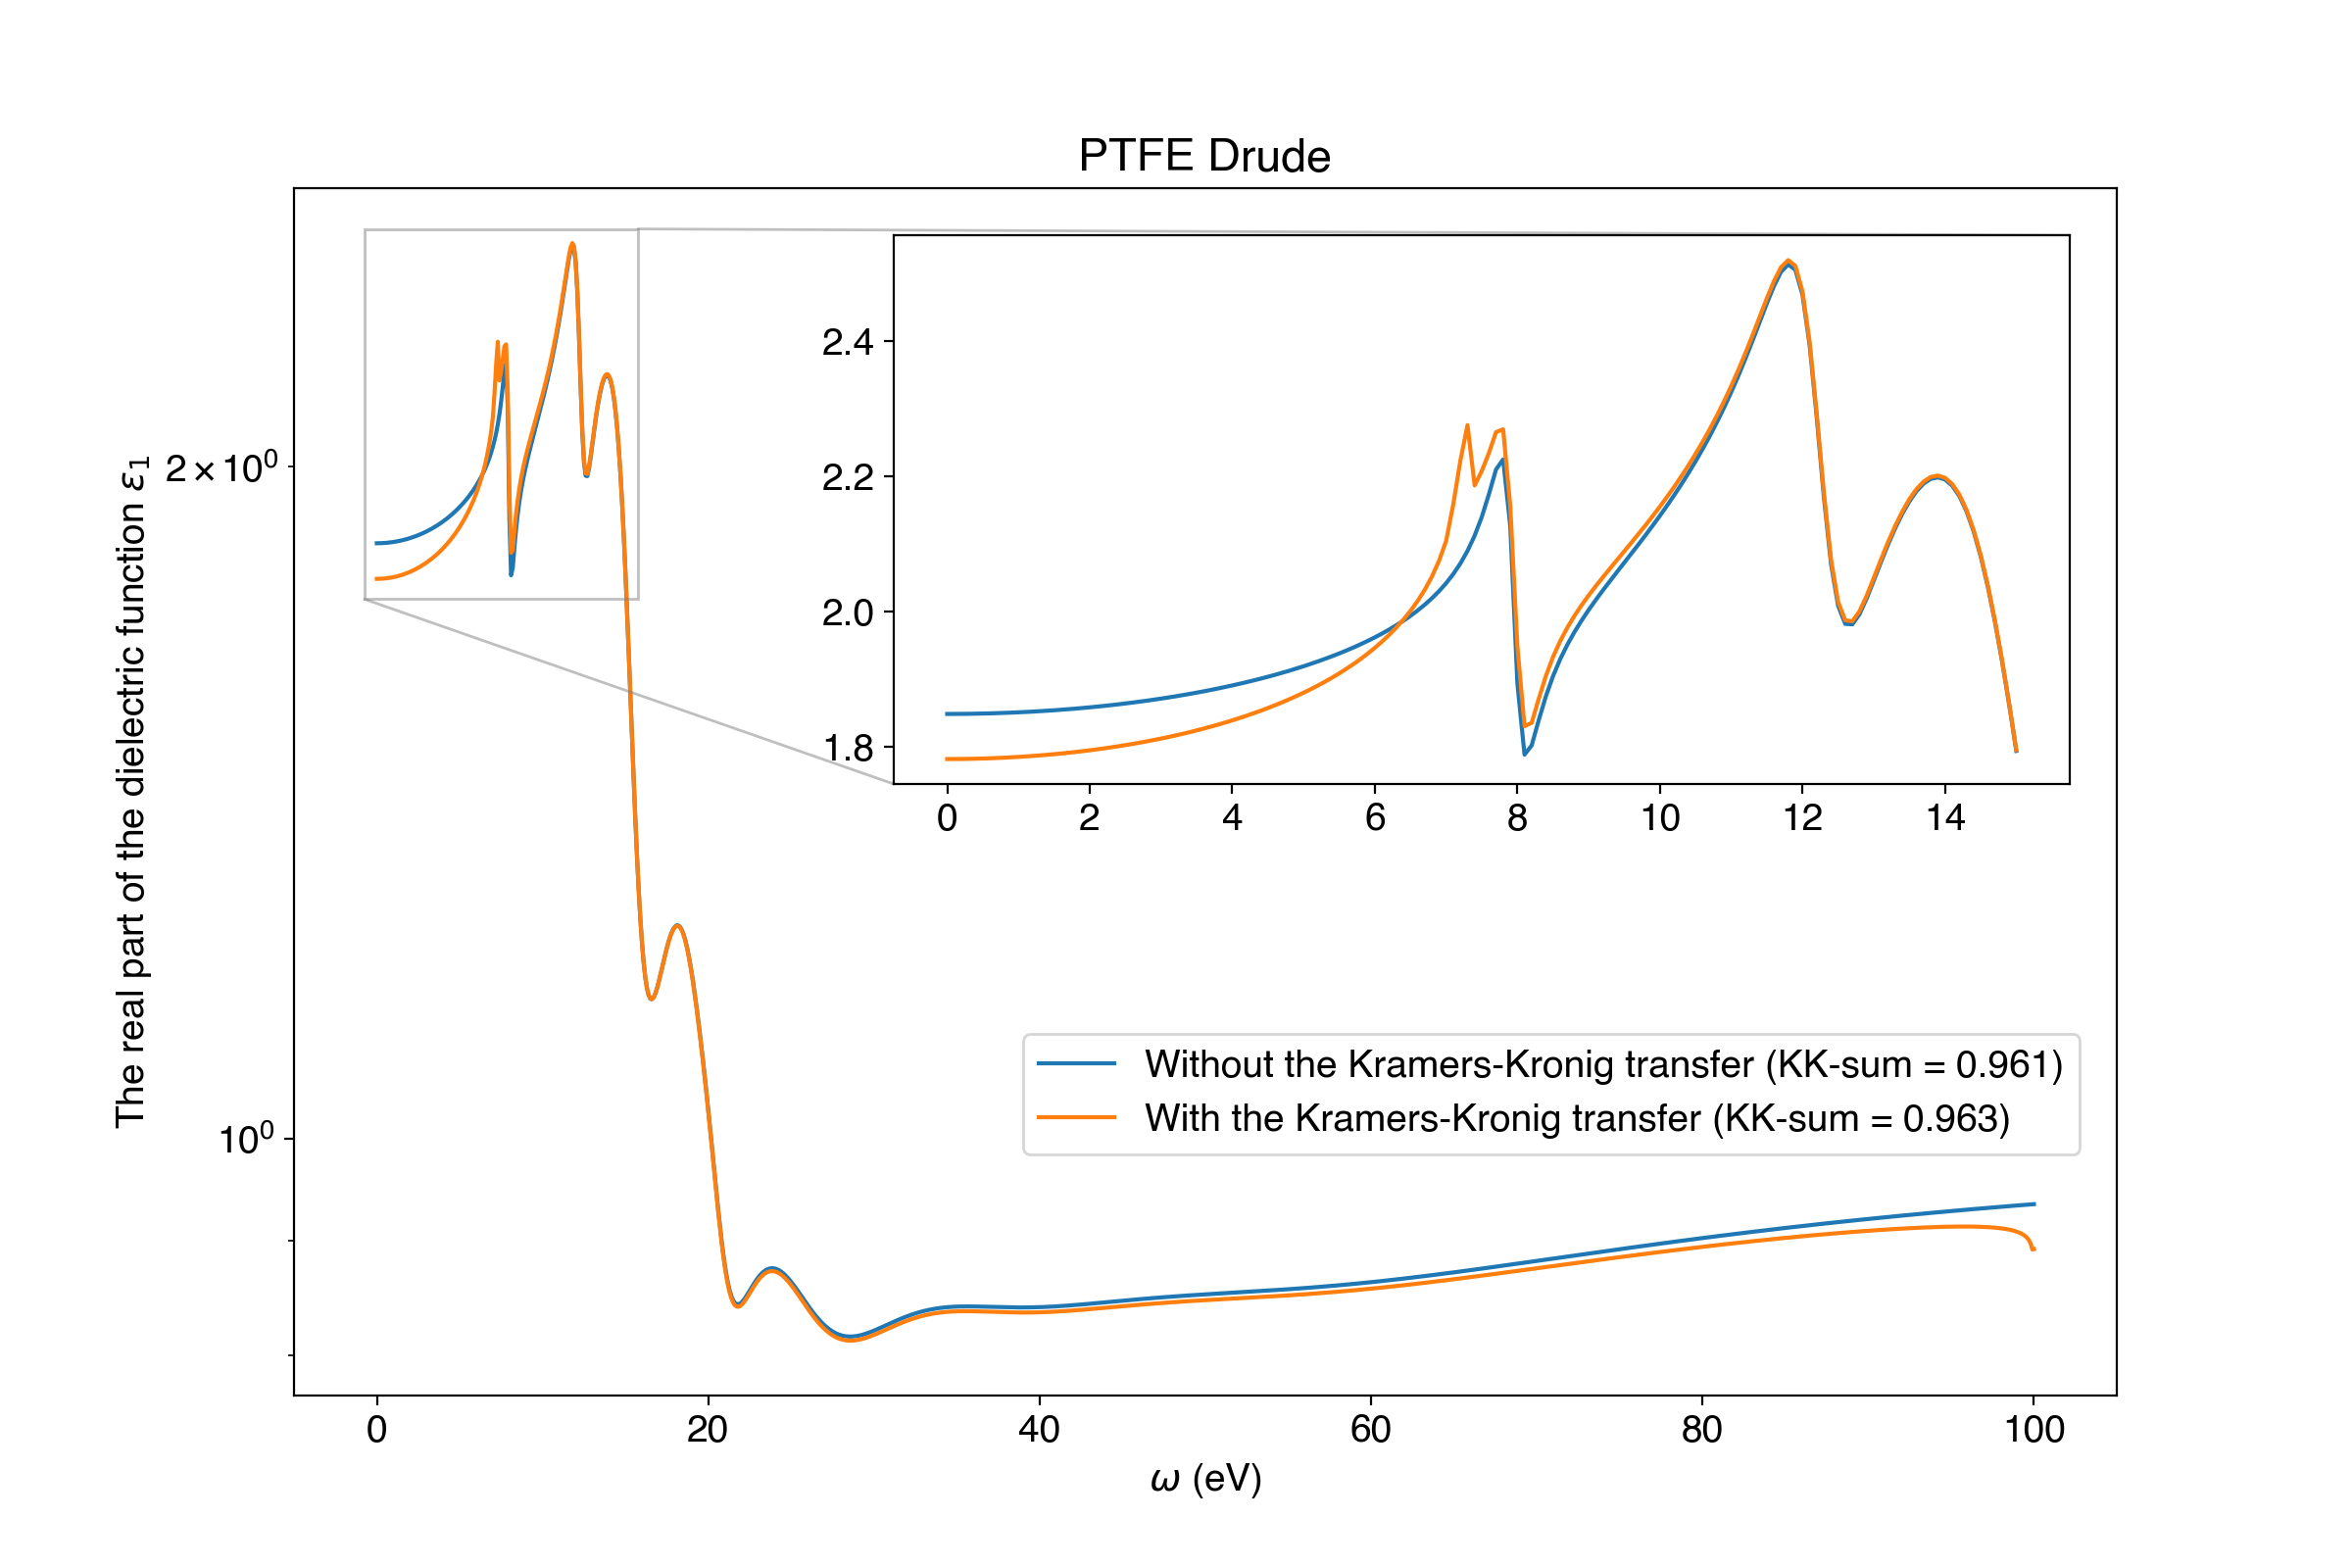

Without the Kramers-Kronig transfer after the zeroing procedure:
FSum = 7.839975659621193
KKSum = 0.9613507771760946

With the Kramers-Kronig transfer after the zeroing procedure:
FSum = 7.892089513619174
KKSum = 0.963237795683521


In [77]:
fig, ax = plt.subplots(figsize=[12,8])

osc = ptfe_drude
x_limit = 15

osc.use_kk_relation = False
osc.calculateDielectricFunction()
x_zoom_no_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_no_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_no_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'Without the Kramers-Kronig transfer (KK-sum = {round(kk_sum_no_kk, 3)})')

print('Without the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_no_kk}')
print()

osc.use_kk_relation = True
osc.calculateDielectricFunction()
x_zoom_kk = osc.eloss[osc.eloss <= x_limit]
y_zoom_kk = osc.epsilon.real[osc.eloss <= x_limit]
kk_sum_kk = osc.evaluateKKsum()
plt.plot(osc.eloss, osc.epsilon.real, label=f'With the Kramers-Kronig transfer (KK-sum = {round(kk_sum_kk, 3)})')

print('With the Kramers-Kronig transfer after the zeroing procedure:')
print(f'FSum = {osc.evaluateFsum()}')
print(f'KKSum = {kk_sum_kk}')

plt.legend(loc=[0.4, 0.2])
plt.title(f'{osc.name} {osc.oscillators.model}')
plt.ylabel('The real part of the dielectric function $\epsilon_1$')
plt.xlabel('$\omega$ (eV)')
plt.yscale('log')

axes = plt.axes([0.38, .5, 0.5, 0.35])
axes.plot(x_zoom_no_kk, y_zoom_no_kk)
axes.plot(x_zoom_kk, y_zoom_kk)
# axes.set_yscale('log')
ax.indicate_inset_zoom(axes)

plt.show()
plt.savefig(f'zeroing_{osc.name}.png', dpi=600)

Start optimisation
FSum = 7.825712515601945
Z = 8
KKSum = 0.9595309899136705
A = [1.358, 7.776, 61.083, 17.523, 35.78, 110.875, 110.118, 303.565]
gamma = [0.357, 1.014, 3.273, 3.433, 4.476, 11.785, 22.234, 48.944]
omega = [7.94, 12.254, 15.24, 20.504, 19.202, 25.298, 35.992, 52.413]
osc.A = [1.358 7.776 61.083 17.523 35.78 110.875 110.118 303.565];
osc.G = [0.357 1.014 3.273 3.433 4.476 11.785 22.234 48.944];
osc.Om = [7.94 12.254 15.24 20.504 19.202 25.298 35.992 52.413];


<IPython.core.display.Javascript object>


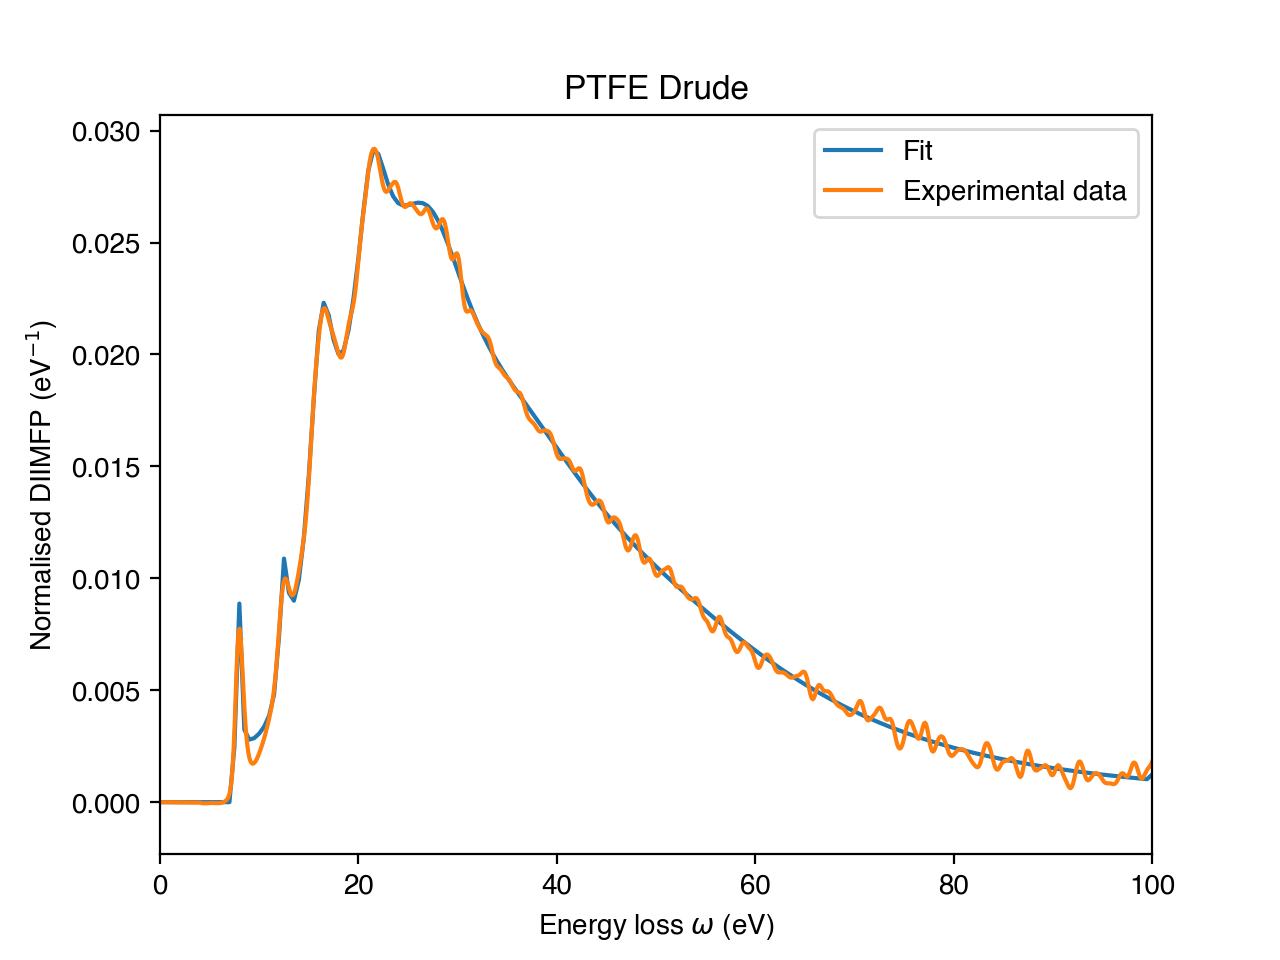

In [131]:
fd = pd.read_csv('../diimfp/ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ptfe_drude, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 5000, xtol_rel = 1e-17)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [132]:
# A = [0.006, 0.007, 0.038, 0.02, 0.061, 0.047, 0.029, 0.016, 0.057, 0.04, 0.06, 0.062]
# gamma = [0.49, 1.12, 2.82, 3.47, 4.2, 4.99, 4.41, 3.75, 9.12, 12.15, 24.65, 60.22]
# omega = [8.01, 12.63, 16.21, 18.01, 21.26, 24.26, 27.08, 29.39, 33.15, 39.96, 49.89, 65.47]

A = [0.007, 0.007, 0.037, 0.023, 0.068, 0.054, 0.03, 0.017, 0.062, 0.044, 0.067, 0.067]
gamma = [0.455, 1.138, 2.738, 3.54, 4.31, 4.953, 4.511, 3.971, 9.328, 12.19, 22.566, 54.93]
omega = [8.008, 12.597, 16.162, 17.488, 21.079, 24.123, 27.08, 29.226, 32.732, 38.964, 49.304, 59.297]

M = (2 * 12.01 + 4 * 18.998) / (2 + 4) # Molar weight
rho = 2.17 # g/cm3

oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_dl = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_dl.Eg = 7.2
ptfe_dl.width_of_the_valence_band = 5.5
ptfe_dl.atomic_density = rho * opt.N_Avogadro / M *1e-24
ptfe_dl.static_refractive_index = 1.39
ptfe_dl.electron_density = 0.47
ptfe_dl.Z = 8
ptfe_dl.use_henke_for_ne = False
ptfe_dl.use_KK_constraint = True
ptfe_dl.use_KK_relation = False

fsum = ptfe_dl.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(ptfe_dl.Z))

kksum = ptfe_dl.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 7.870771703430149
Z = 8
KKSum = 0.9792830244500191


In [135]:
ptfe_dl.atomic_density

0.07839924549054111

Start optimisation
FSum = 7.871756906369915
Z = 8
KKSum = 0.9788068706960513
A = [0.007, 0.007, 0.038, 0.023, 0.069, 0.053, 0.03, 0.016, 0.06, 0.04, 0.067, 0.072]
gamma = [0.454, 1.107, 2.657, 3.496, 4.297, 4.935, 4.353, 3.822, 8.949, 11.791, 22.972, 54.264]
omega = [8.03, 12.736, 16.136, 17.672, 21.135, 24.2, 27.169, 29.342, 32.873, 39.173, 49.449, 57.953]
osc.A = [0.007 0.007 0.038 0.023 0.069 0.053 0.03 0.016 0.06 0.04 0.067 0.072];
osc.G = [0.454 1.107 2.657 3.496 4.297 4.935 4.353 3.822 8.949 11.791 22.972 54.264];
osc.Om = [8.03 12.736 16.136 17.672 21.135 24.2 27.169 29.342 32.873 39.173 49.449 57.953];


<IPython.core.display.Javascript object>


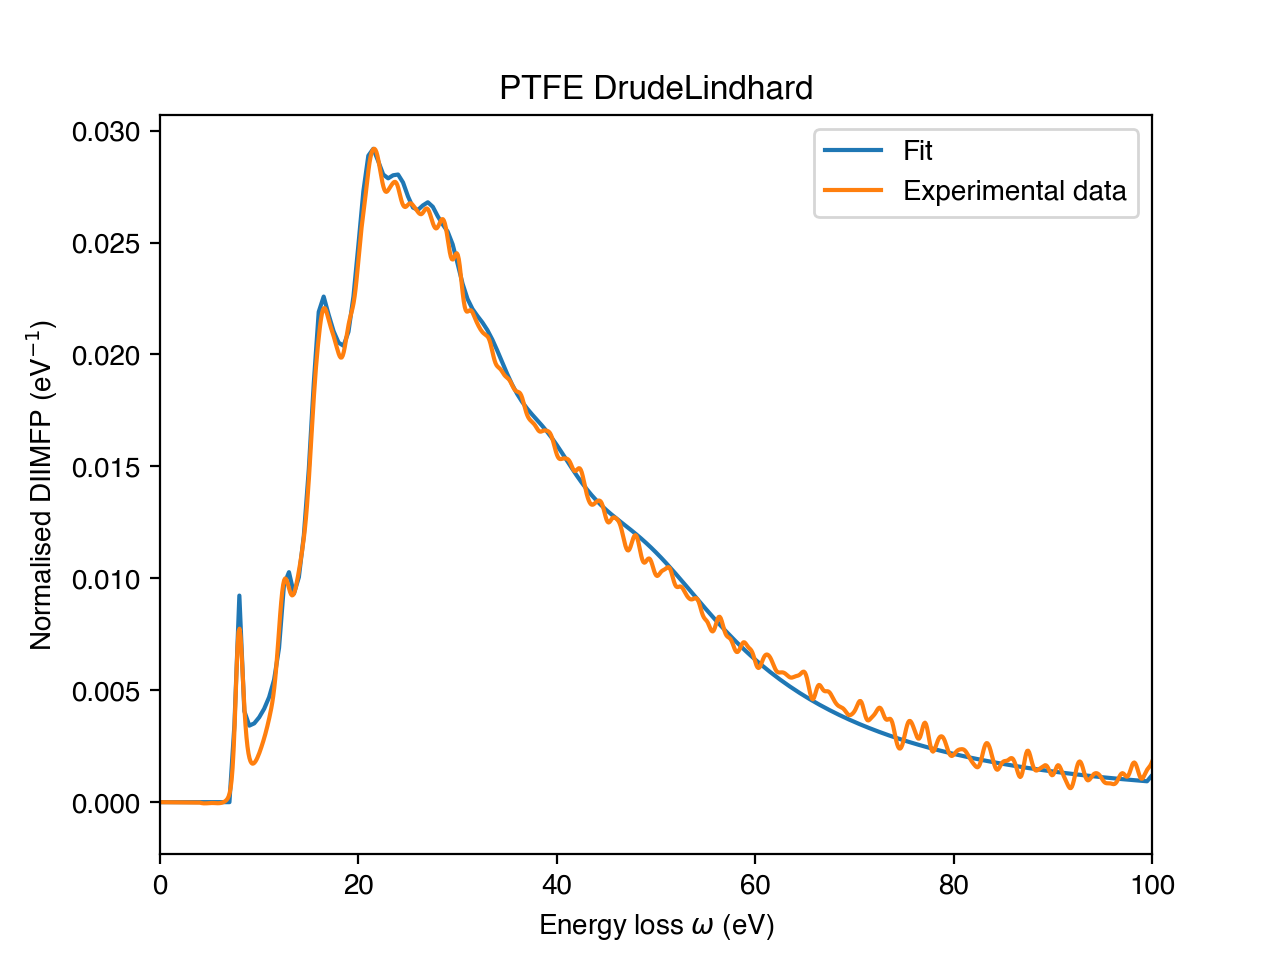

In [133]:
fd = pd.read_csv('../diimfp/ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

opt_ = opt.OptFit(ptfe_dl, x_exp, y_exp, 1600)
result = opt_.runOptimisation('ndiimfp', maxeval = 1000, xtol_rel = 1e-12)
oscOptimised = opt_.vec2Struct(result)

fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

print(f'A = [{", ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}]')
print(f'gamma = [{", ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}]')
print(f'omega = [{", ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}]')

print(f'osc.A = [{" ".join([str(i) for i in oscOptimised.oscillators.A.round(3).tolist()])}];')
print(f'osc.G = [{" ".join([str(i) for i in oscOptimised.oscillators.gamma.round(3).tolist()])}];')
print(f'osc.Om = [{" ".join([str(i) for i in oscOptimised.oscillators.omega.round(3).tolist()])}];')

oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

<IPython.core.display.Javascript object>


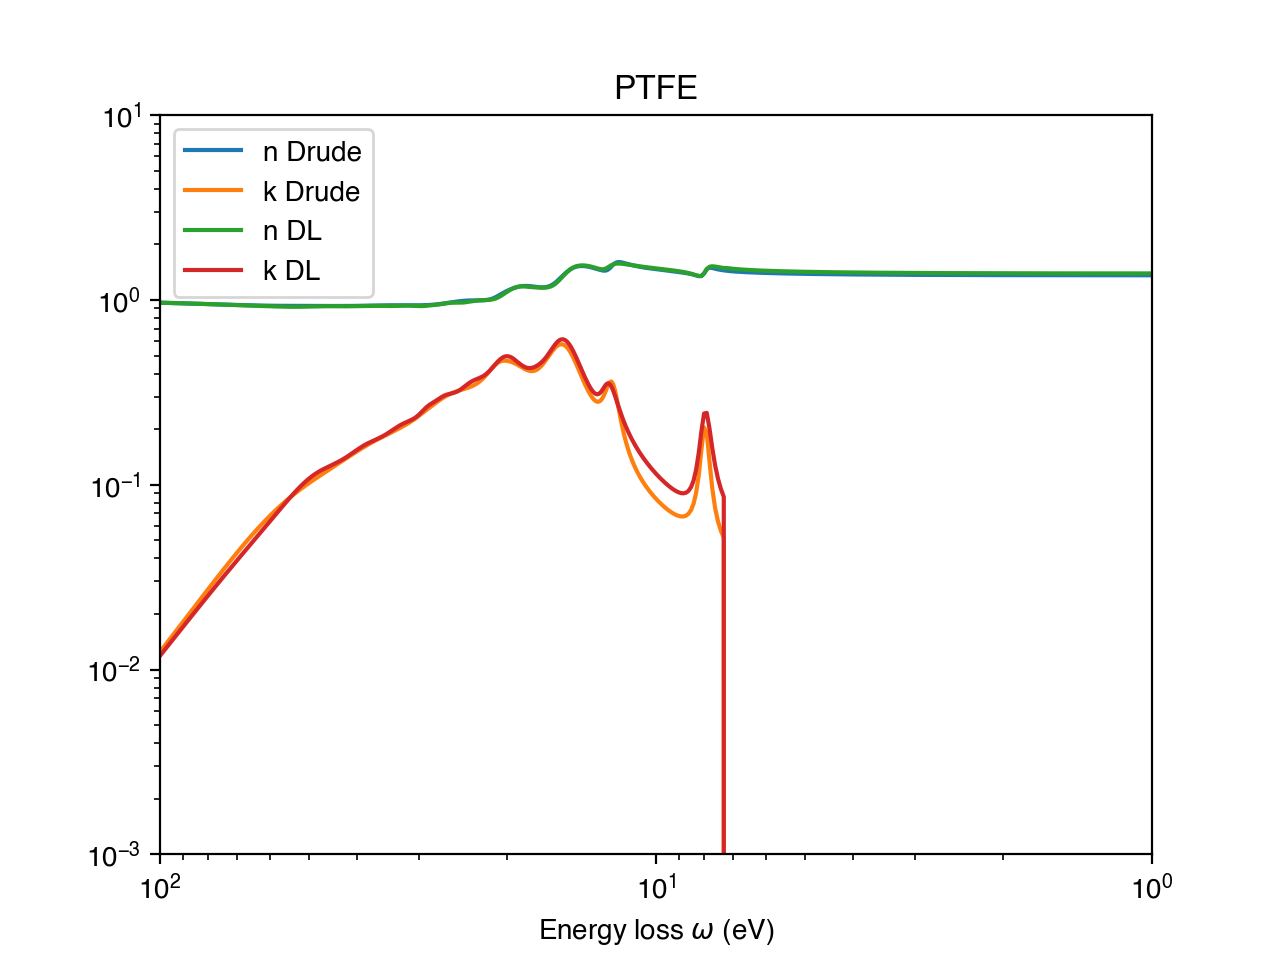

In [136]:
ptfe_drude.calculateOpticalConstants()

plt.figure()
plt.plot(ptfe_drude.eloss, ptfe_drude.refractive_index, label='n Drude')
plt.plot(ptfe_drude.eloss, ptfe_drude.extinction_coefficient, label='k Drude')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.title(f'{ptfe_drude.name}')

ptfe_dl.calculateOpticalConstants_()
plt.plot(ptfe_dl.eloss, ptfe_dl.refractive_index, label='n DL')
plt.plot(ptfe_dl.eloss, ptfe_dl.extinction_coefficient, label='k DL')

plt.legend()
plt.show()

ptfe_drude.writeOpticalData()

**Au**

In [14]:
A = [0.01, 0.02, 0.07, 0.1, 0.07,0.007, 0.16, 0.15,0.13,0.08,0.02,0.09,0.16,0.02,0.003,0.005,0.008]
omega = [2.62,3.34,6.31,10.58,17.08,25.75,25.39,33.65,39.17,45.72,52.12,14.57,64.21,96.19,278.92,210.69,470.93]
gamma = [0.29,0.81,3.05,5.62,5.04,2.05,8.04,8.56,10.86,10.79,11.13,5.39,29.85,34.51,38.38,62.79,376.54]
oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 1)
composition = opt.Composition('au', 1)
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

au_dl = opt.Material('Au', oscillators, composition, eloss, q, xraypath)
au_dl.Ef = 9
au_dl.atomic_density = 0.059

<IPython.core.display.Javascript object>


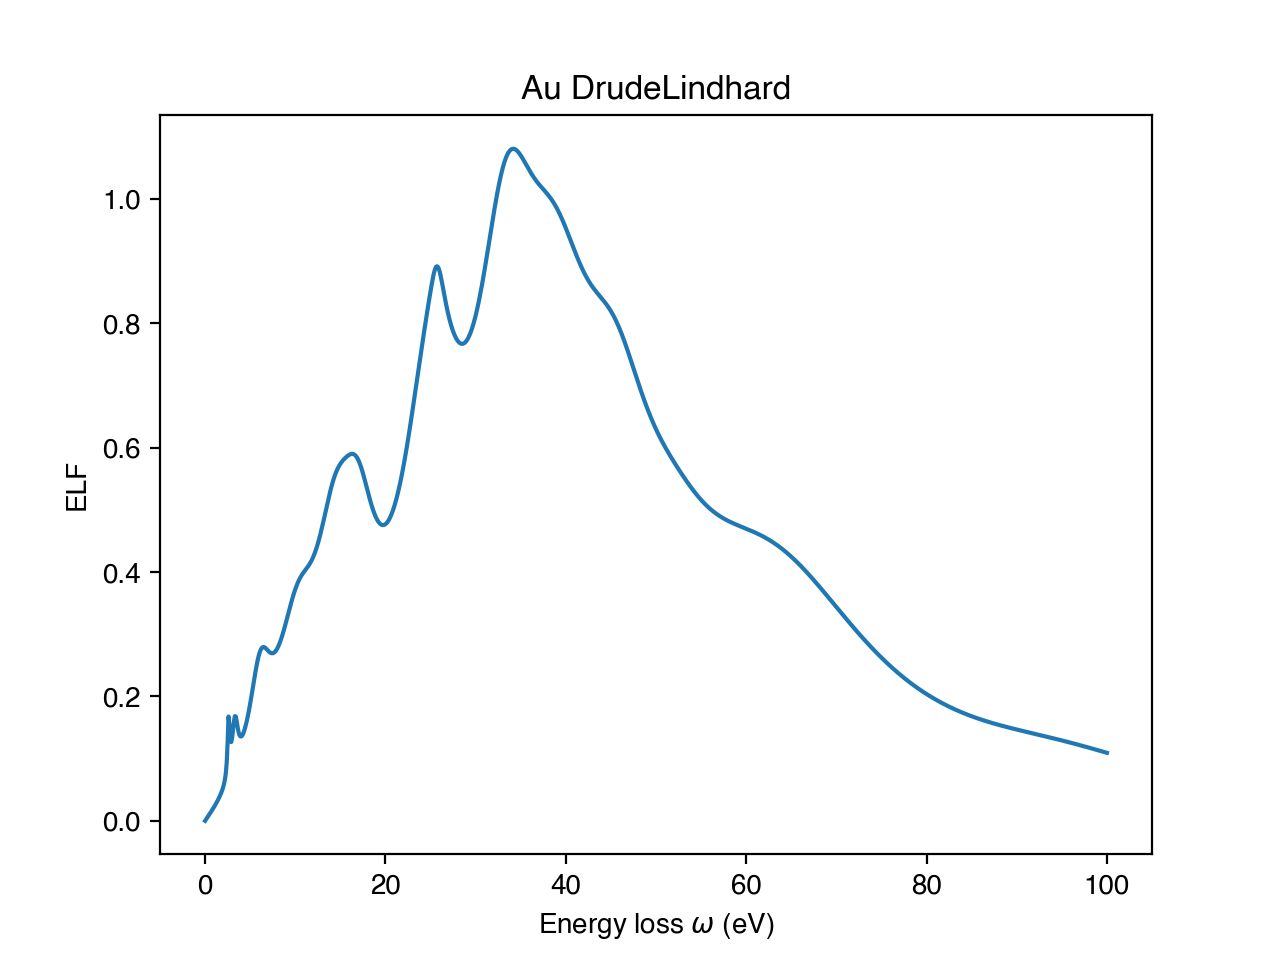

In [16]:
au_dl.plotELF()

<IPython.core.display.Javascript object>


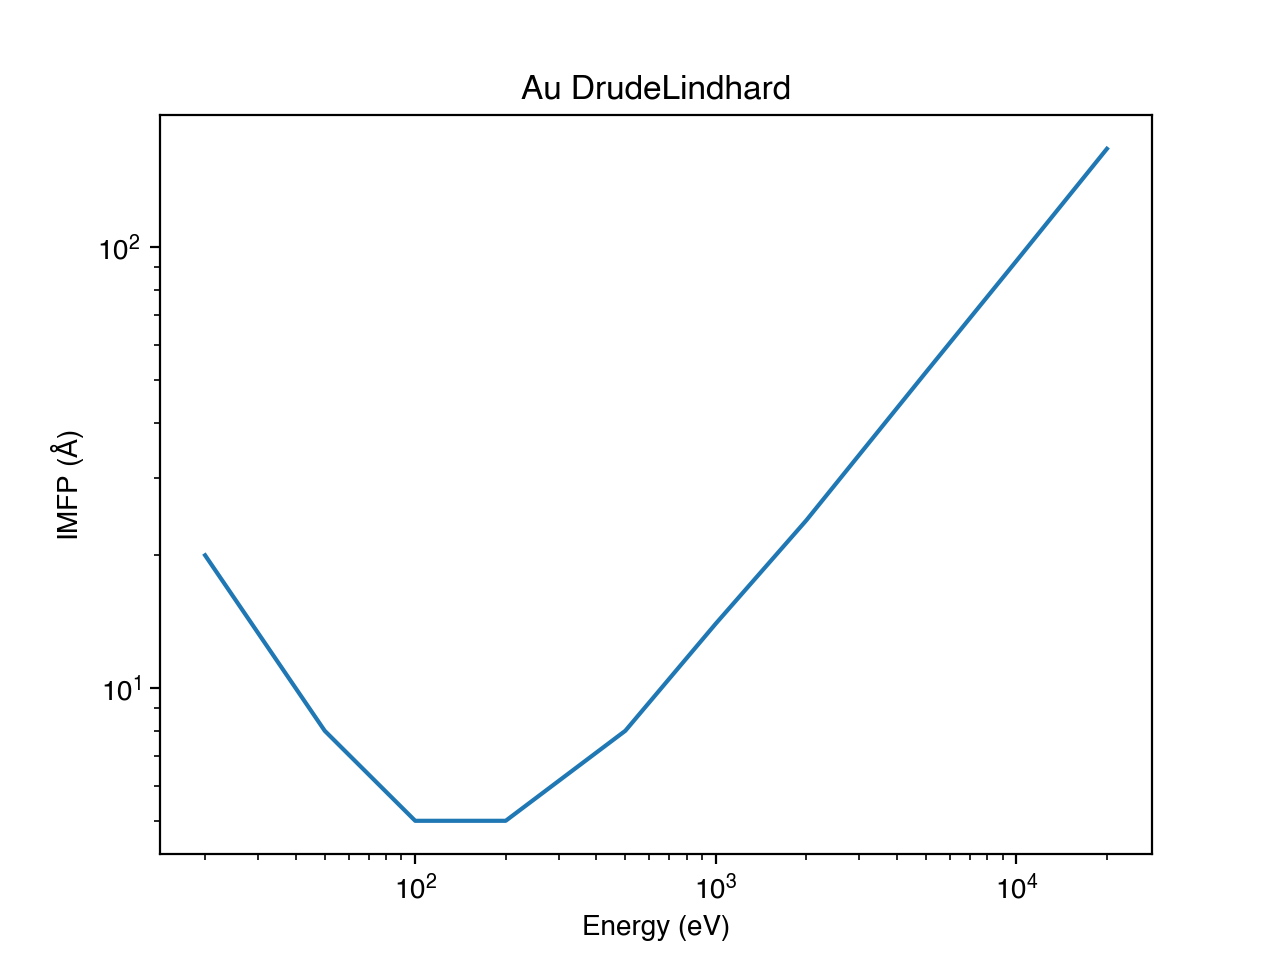

In [15]:
E0 = np.array([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]) # eV
au_dl.plotIMFP(E0)

<IPython.core.display.Javascript object>


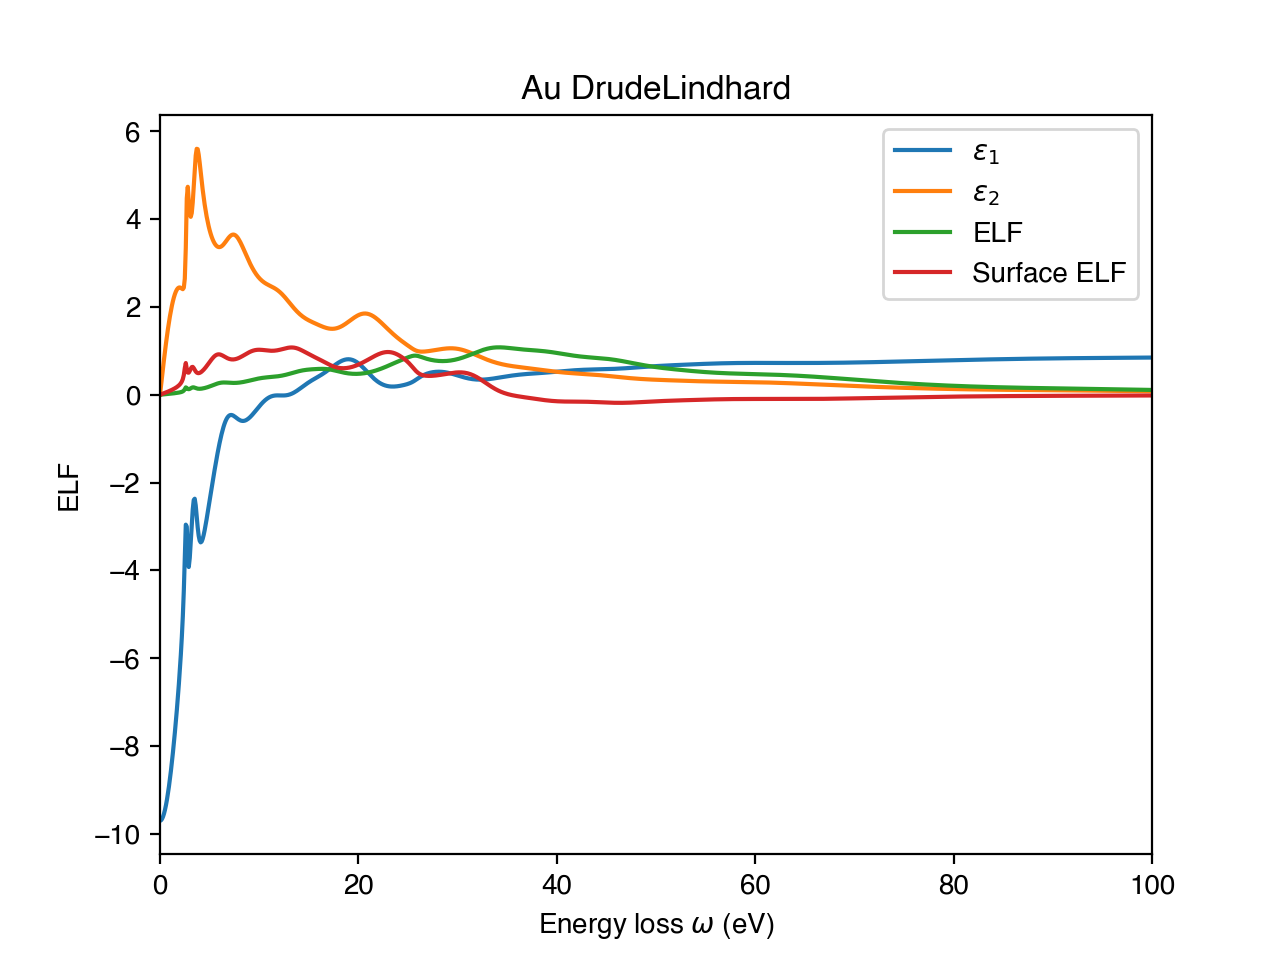

In [17]:
au_dl.calculateELF()
au_dl.calculateSurfaceELF()

plt.figure()
plt.plot(au_dl.eloss,au_dl.epsilon.real,label='$\epsilon_1$')
plt.plot(au_dl.eloss,au_dl.epsilon.imag,label='$\epsilon_2$')
plt.plot(au_dl.eloss,au_dl.ELF,label='ELF')
plt.plot(au_dl.eloss,au_dl.surfaceELF,label='Surface ELF')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{au_dl.name} {au_dl.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


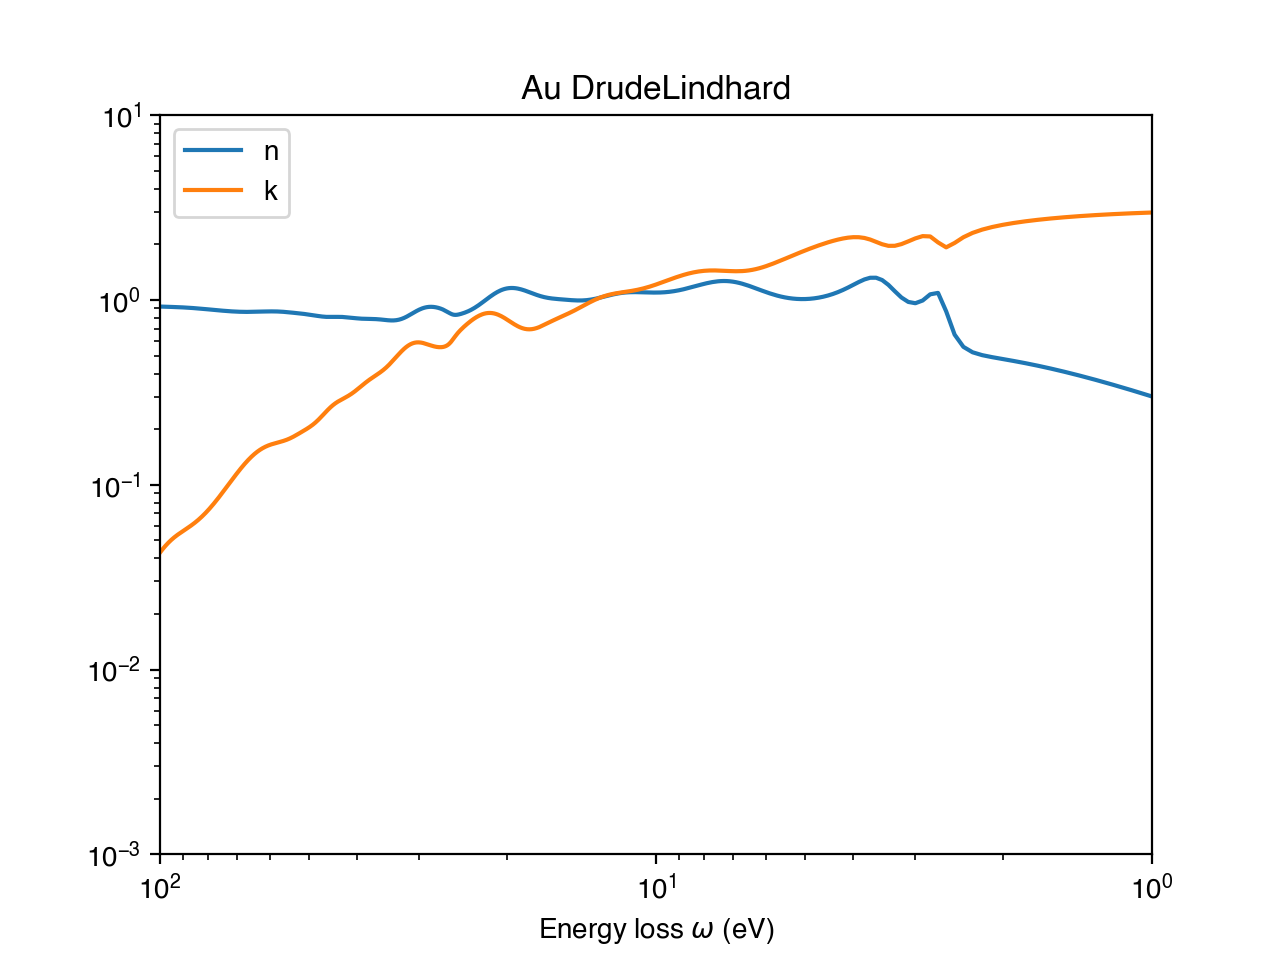

In [18]:
au_dl.calculateOpticalConstants()

plt.figure()
plt.plot(au_dl.eloss,au_dl.refractive_index,label='n')
plt.plot(au_dl.eloss,au_dl.extinction_coefficient,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{au_dl.name} {au_dl.oscillators.model}')
plt.show()